In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer , WordNetLemmatizer
ps = PorterStemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StopWordRemoverFactory()
stopwords2 = factory.get_stop_words()
stemmer = StemmerFactory().create_stemmer()

In [2]:
train = pd.read_csv("train.csv")
train.head()

review_id  \
0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1  7d8cb2e465c5602e51c1ba8710e8ff16   
2  1f4447c73e5e1aac462d05b0ecbd5a55   
3  b9aefbfb0debbfff43f8b268c82b43c0   
4  e2afef18bd695fae43d4d53b8c547bd4   

                                         review_text  category  
0  Penginapannya rapi, bersih, suasana tenang, pe...         1  
1  wifi tidak sampai kamar, tidak tersedia heater...         0  
2  Lantai kamar mandi kotor, bau, dan seperti sdh...         0  
3  Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0  
4                                         bocor lagi         0

In [3]:
train1 = pd.read_csv("train+.csv")
train1.rename(columns = {'Language':'langdetect',"Bahasa":"stop-stem sastrawi"}, inplace = True)
train1.head()

Unnamed: 0                         review_id  \
0           0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1           1  7d8cb2e465c5602e51c1ba8710e8ff16   
2           2  1f4447c73e5e1aac462d05b0ecbd5a55   
3           3  b9aefbfb0debbfff43f8b268c82b43c0   
4           4  e2afef18bd695fae43d4d53b8c547bd4   

                                         review_text  category langdetect  \
0  Penginapannya rapi, bersih, suasana tenang, pe...         1         id   
1  wifi tidak sampai kamar, tidak tersedia heater...         0         id   
2  Lantai kamar mandi kotor, bau, dan seperti sdh...         0         id   
3  Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0         id   
4                                         bocor lagi         0         id   

  stop-stem sastrawi  
0                 id  
1                 id  
2                 id  
3                 id  
4                 id

In [4]:
test = pd.read_csv("test.csv")
test.head()

review_id  \
0  7302180ac7160f04a405d8aa7bd6beb8   
1  3184c670e170f565c7522eb76a320ba1   
2  e33abf6bb5d5a9a77c339043b1725dc8   
3  061d388950340070a6ac03fabc9027b0   
4  e62d87c348674b6c06856964f3ab16b8   

                                         review_text  
0  Kasur rusak, punggung saya sakit, kasurnya ga ...  
1                                              gerah  
2  tempat ridur atas bawah.. ac nya pararel, tdk ...  
3   ac kurang dingin, tidak ada snack sperti di foto  
4  Lumayan untuk guest house dengan standart harg...

In [5]:
from google_trans_new import google_translator  
detector = google_translator()  
from langdetect import detect

In [ ]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X

def stopward_stem(X):
    # stopward process
    stopwords2 = factory.get_stop_words()
    X=' '.join([i for i in X.split() if i not in stopwords2])
    # stemming process
    X = stemmer.stem(X)
    return X

def detect_bahasa(X):
    if list(set(X))==[' ']:
        return "Unknown"
    if pd.isnull(X):
        return "Unknown"
    token=token_satu_kata(X)
    X=token
    X=stopward_stem(X)
    if X==token:
        return 'en'
    else:
        return 'id'

count=0
bahasa=[]
for i in range(train.shape[0]):
  if detect_bahasa(train["review_text"][i])=="Unknown":
    bahasa.append("Unknown")
  else:
    if detect_bahasa(train["review_text"][i])=='en':
      count +=1
      bahasa.append('en')
    else:
      bahasa.append('id')
  print(i,end=' ')
print(count)
train["Bahasa"]=bahasa 

In [10]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X
def stopward_stem_en(X):
    stop_words = set(stopwords.words('english'))
    #Stopword Removal
    X=' '.join([i for i in X.split() if i not in stop_words])
    #Stemming of data
    X=' '.join([ps.stem(i) for i in X.split()])
    return X
def detect_language_en(X):
    if list(set(X))==[' ']:
        return "Unknown"
    if pd.isnull(X):
        return "Unknown"
    token=token_satu_kata(X)
    X=token
    X=stopward_stem_en(X)
    if X==token:
        return 'id'
    else:
        return 'en'
count=0
language=[]
for i in range(train.shape[0]):
    if detect_language_en(train["review_text"][i])=="Unknown":
        language.append("Unknown")
    else:
        if detect_language_en(train["review_text"][i])=='en':
            count +=1
            language.append('en')
        else:
            language.append('id')
print(count)
train1["stop-stem english"]=language 

8654


In [ ]:
count=0
language=[]
for i in range(test.shape[0]):
    if detect_language_en(train["review_text"][i])=="Unknown":
        language.append("Unknown")
    else:
        if detect_language_en(train["review_text"][i])=='en':
            count +=1
            language.append('en')
        else:
            language.append('id')
print(count)
train1["stop-stem english"]=language 

In [11]:
train1

Unnamed: 0                         review_id  \
0               0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1               1  7d8cb2e465c5602e51c1ba8710e8ff16   
2               2  1f4447c73e5e1aac462d05b0ecbd5a55   
3               3  b9aefbfb0debbfff43f8b268c82b43c0   
4               4  e2afef18bd695fae43d4d53b8c547bd4   
...           ...                               ...   
14851       14851  5ed96732e4f1e1e69dfb8669cf507587   
14852       14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853       14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854       14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855       14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category langdetect  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1         id   
1      wifi tidak sampai kamar, tidak tersedia heater...         0         id   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0         id   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0         id   
4                                             bocor lagi         0         id   
...                                                  ...       ...        ...   
14851                           kotor dan tidak ada wifi         0         id   
14852                                 Kamar tidak bersih         0         id   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0         id   
14854                    Wifinya sangat kurang memadai..         0         id   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0         id   

      stop-stem sastrawi stop-stem english  
0                     id                id  
1                     id                en  
2                     id                en  
3                     id                id  
4                     id                id  
...                  ...               ...  
14851                 id                id  
14852                 id                id  
14853                 id                en  
14854                 id                id  
14855                 id                en  

[14856 rows x 7 columns]

In [ ]:
def token_satu_kata(X):
  X = re.sub('[^\w]',' ',X)
  X = re.sub('\s+',' ',X)
  X = re.sub('^b\s+','',X)
  X = re.sub('(\s)+$','',X)
  X = X.lower()
  return X

def stopward_stem(X):
  from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
  factory = StopWordRemoverFactory()
  stopwords = factory.get_stop_words()
  X=' '.join([i for i in X.split() if i not in stopwords])
  # import StemmerFactory class
  from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  # stemming process
  X = stemmer.stem(X)
  return X

def detect_bahasa(X):
  if list(set(X))==[' ']:
    return "Unknown"
  if pd.isnull(X):
    return "Unknown"
  token=token_satu_kata(X)
  X=token
  X=stopward_stem(X)
  if X==token:
    return 'en'
  else:
    return 'id'

count=0
bahasa=[]
for i in range(train.shape[0]):
  if detect_bahasa(train["review_text"][i])=="Unknown":
    bahasa.append("Unknown")
  else:
    if detect_bahasa(train["review_text"][i])=='en':
      count +=1
      bahasa.append('en')
    else:
      bahasa.append('id')
  print(i,end=' ')
print(count)
train["Bahasa"]=bahasa 

In [12]:
hasil=[]
for i in range(train1.shape[0]):
    a=train1["langdetect"][i]
    b=train1["stop-stem sastrawi"][i]
    c=train1["stop-stem english"][i]
    arr=[a,b,c]
    if arr.count('en')>arr.count('id'):
        hasil.append('en')
    elif arr.count('en')<arr.count('id'):
        hasil.append('id')
    else:
        hasil.append('Unknown')
train1["hasil_deteksi_bahasa"]=hasil

In [13]:
train1

Unnamed: 0                         review_id  \
0               0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1               1  7d8cb2e465c5602e51c1ba8710e8ff16   
2               2  1f4447c73e5e1aac462d05b0ecbd5a55   
3               3  b9aefbfb0debbfff43f8b268c82b43c0   
4               4  e2afef18bd695fae43d4d53b8c547bd4   
...           ...                               ...   
14851       14851  5ed96732e4f1e1e69dfb8669cf507587   
14852       14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853       14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854       14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855       14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category langdetect  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1         id   
1      wifi tidak sampai kamar, tidak tersedia heater...         0         id   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0         id   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0         id   
4                                             bocor lagi         0         id   
...                                                  ...       ...        ...   
14851                           kotor dan tidak ada wifi         0         id   
14852                                 Kamar tidak bersih         0         id   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0         id   
14854                    Wifinya sangat kurang memadai..         0         id   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0         id   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  
0                     id                id                   id  
1                     id                en                   id  
2                     id                en                   id  
3                     id                id                   id  
4                     id                id                   id  
...                  ...               ...                  ...  
14851                 id                id                   id  
14852                 id                id                   id  
14853                 id                en                   id  
14854                 id                id                   id  
14855                 id                en                   id  

[14856 rows x 8 columns]

In [14]:
caps=[]
jumlah_caps=[]
capslock=[]
for i in range(train1.shape[0]):
    jumlah=0
    X = train1["review_text"][i]
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    if X.isupper():
        capslock.append(1)
        caps.append(0)
    else:
        capslock.append(0)
        bool_caps=[item.isupper() for item in list(X.split())]
        if any(bool_caps):
            jumlah=len([i for i in bool_caps if i==True])
            caps.append(1)
        else:
            caps.append(0)
    jumlah_caps.append(jumlah)
train1["caps"]=caps
train1["jumlah_caps"]=jumlah_caps
train1["capslock"]=capslock

In [15]:
pakai_tanda_seru=[]
jumlah_tanda_seru=[]
for i in range(train1.shape[0]):
    jumlah=0
    X=train1["review_text"][i]
    if "!" in X:
        pakai_tanda_seru.append(1)
        jumlah=X.count('!')
    else:
        pakai_tanda_seru.append(0)
    jumlah_tanda_seru.append(jumlah)
train1["pakai_tanda_seru"]=pakai_tanda_seru
train1["jumlah_tanda_seru"]=jumlah_tanda_seru

In [16]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X
def stopward_stem_en(X):
    stop_words = list(set(stopwords.words('english')))
    #Stopword Removal
    X=' '.join([i for i in X.split() if i not in stop_words])
    #Stemming of data
    X=' '.join([ps.stem(i) for i in X.split()])
    return X
def stopward_stem_sastrawi(X):
    # stopward process
    stopwords2 = factory.get_stop_words()
    X=' '.join([i for i in X.split() if i not in stopwords2])
    # stemming process
    X = stemmer.stem(X)
    return X
def processing(X):
    X=token_satu_kata(X)
    X=stopward_stem_en(X)
    print(X)
    X=stopward_stem_sastrawi(X)
    return X
stop_stem_id=[]
stop_stem_en=[]
stop_stem_ganda=[]
for i in range(train1.shape[0]):
    X=token_satu_kata(train1["review_text"][i])
    stop_stem_id.append(stopward_stem_sastrawi(X))
    stop_stem_en.append(stopward_stem_en(X))
    stop_stem_ganda.append(processing(train1["review_text"][i]))
train1["stop_stem_id"]=stop_stem_id
train1["stop_stem_en"]=stop_stem_en
train1["stop_stem_ganda"]=stop_stem_ganda

penginapannya rapi bersih suasana tenang pelayannya ramah dan banyak membantu lokasi cukup dekat ke beberapa obyek wisata kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini
wifi tidak sampai kamar tidak tersedia heater untuk kopi teh atau dispens dan tidak tersedia kursi di depan kamar untuk merokok hingga haru duduk di lantai
lantai kamar mandi kotor bau dan seperti sdh jdi sarang nyamuk dikamar mandinya pesan superior doubl yg dikasih twin mungkin karena murah saya maklumin tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg
wc jorok kasur tidak dibersihkan handuk tidak diganti
bocor lagi
kebersihan pelayanan kerapihan
saya hampir tidak bisa tidur krn bantal sangat bau apek
pelayanannya sangat baik kmr yang bersih menu makanannya juga enak sayang wifinya kutang bagu
kamar banyak kecoa tlg lebih diperhatikan kebersihannya
kamar mandi banjir
lebih menjaga kebersihan khususnya tempat tidur untuk kenyamanan tamu bebial bial kami betiga beranak tilamnya hibak

nginap 2 hari tapi kamarnya nggak dbersihkan nggak ada air minum jg pa dihari 2
sangat kecewa dengan tv yg buram percuma ada tv cuma pajangan tidak bisa di toton bikin sakit mat airi temapat lain bagu
pelayananya kurang kebersihan kmr mandi kurang bersih seprei kurang bagu tdk sesuai dgn hrga
kamar bersih rapi snack dan air miner lumayan ac dingin normal remot tv tidak bisa pintu kamar dari bagian luar kaya beka dicongkel padah waktu menginap 1 bulan yang lalu kondisi pintu bagu mohon agar ditingkatkan keamanan dan kenyamanan serta kebersihan di dalam kamar
handuk gak ada dikasih sih tapi minta dulu keset gak ada colokan charger gak berfungsi yg lain nya wajarlah dengan harga budget
kamarnya bau
tidak menyenangkan saat dtg handuk blm ada handuk dtg menjelang magrib itupun stlh diminta tidak mau menginap disini lagi
clean romm new build
kmar kotor dan sempit
mati lampu dr pln lama perpindahan ke getset wifi gak stabil tingkatkan pelayanan nya terima kasih
tidak ada ac tidak sesuai spesi

koq gak ada lagi fasilita airi di kamar seperti snack dll
gak ada sarapan
tidak bisa tidur bunyi air didpn kamar 101 sangat2 menganggu toiletnya juga bau
bangunan tua sdh perlu renov overal oklah
pelayanan nya kurang bagu sarapan pagi tidak dapat lampu mati teru lagi paraahh
kamar kotor banget nget 1 10 itu nilainya 2 shower sdh berkarat tdk ada waterheat ac gada remot pa ditanya gatau kmna remotnya tv cabl channelnya dikit bgd ga lengkap cuma belasan dan itu ada yg doubl mau earli cekkin suru bayar tapi pa nanya k live chat airi katanya gabayar pa ditunjukin live chat baru boleh masuk sama penjaganya
ac kurang dingin n chanel tv gak sesuai buku menu
mengecewakan receptionist tidak ramah dind kotor kamar mandi kotor tidak ada air pana padah dikatakan ada bantal sprei bau apek lembab sekali lampu hanya 1 saklar sere menggunakan airi room tapi yang ini sangat mengecewakan
tisu nya gak pernah ada deposit terlalu besar 300rb
kok semakin lama kamar yang diberikan untuk airi semakin sempit s

resepsioni tidak ramah marah2 ac kamar bermasalah tidak bisa kontrol suhu melalui remot kamar kotor ada sampah di ata pintu kamar mandi yang sudah lama tidak dibersihkan tidak ada air pana tirai kamar mandi kotor berjamur handuk tipi kusam tidak layak pakai tidak merekomendasikan hotel ini
pelayanan ramah tapi sayang bagian kamar mandi kurang wastafel goyang krannya wastafelnya jg haru diganti karena handlenya rusak
ditingkatkan lagi kualita kamar kebersihan public area terimakasih
toiletnya bau tp mayan lah buat numpang tidur
banyak nyamuk uang deposit lebih mahal dibandingkan harga kamarnya ktp juga di tahan selama stay sangat tidak rekomen utk menginap di sini
aroma dari lobbi hotelnya sangat aneh saya paham hotelnya berkonsep chines tapi mohon maaf aromanya sedikit tidak biasa dan menyengat hidung saya kira banyak pengharum ruangan lain yang lebih umum dan harum
agak kumuh
pelayanan ramah tempat nyaman mantap lah
kamarnya nyaman pelayanannya baik tp masalah wifi saja yg sinyalnha s

ga ada air pana
air pana nya gak ada di kamar 108 log wifi sulit
kamar hotel tidak terawat kecil ac rusak pelayanan resepsioni tidak sigap tanggap keamanan kurang baik ada seorang ibu2 yang mondar mandir di lorong kamar tapi dy bukan tamu dari tidak jela ngpn tengah malam berisik parah sangat tidak nyaman untuk tinggal di sini saya book 2 malam dan pagi hari di hari 1 saya sudah checkout bad
hotel yang unik bagu far untuk di jakarta murah recommend buat backpack cuma tidak recommend yang naik mobil buat parkir mobilnya tidak ada resepsionisnya malah menyuruh tanyak satpam satpamnya juga tidak ada akhirnya mobil saya taru di depan pagi pagi di bangunkan minta tolong di geser
gedung dan kamar tidak terawat
air shower jalannya kecil kamar banyak nyamuk
nyamp sana jam 11 03 di recept gk ada orang dipanggil2 dan ditunggu2 gk ada yg jawab datang begitu coba cari dilantai 2 gk ada di lantai 3 baru ketemu mbak2nya nungguin si mbaknya nelpon dulu tr turun ke lantai 1 tr naik lagi dan bilang ken

dapatnya yg twinb
kamar berisik dan kamar mandi kotor
tempat tidak sesuai dgn foto dan berisik sangat
ngak ada snack sarapan pagi cm samp jam 8
pelayanan buruk ngga niat terima tamu
sangat bersih dan nyaman cocok banget
heater tidak berfungsi tidak ada gantungan baju tempat tidur perlu diperbaiki ada papan kayu yang hampir lepa tidak ada tissu toilet kolam renang baik kamar cukup bersih
kamar kurang bersih tidak ada tissu air pana tidak stabil handuk kaki kotor seperti tidak diganti tidak ada amen yg disediakan hotel yg menghibur adanya kotak snack amen dr airi
bau pengap sarapan gak jela beda dengan airi room depan bumi minang sabgat menegcewakan
kebersihan kurang tvnya burem spreini kotor banyak nyamuk kalo buat smntra sih okeelah smg fasilitasnya lebih di tingkatkn ya
salah book tgl
bagu dan memuaskan thank
pelayanan kurang ramah tidak seperti di hotel airi yg pernah saya singgahi shower air pana tidak dapat berfungsi handuk dan seprai juga kurang bersih
dpet kmar yg kurang menarik 

gambar tdk sesuai dgn pisiknya air hangat tdk ada wifi tdk ada sampo tdk ada kebersihan lingkungannya kamar tdk layak perlu pembenahan kecewa berat
kamar mandi kotor airnya hitam waktu pertama kali di buka
tv nya banyak semut nya
buruk lah mati listrik ps mo check
lift nya sangat tidak terawat kamar mandi kotor kamar pertama tidak ada jendela dan toilet masih ada beka air kenc dan kelihatan toilet masih baru dipakai beberapa jam yang lalu saya dipindah ke kamar yang kedua dan ternyata jendela tidak dapat ditutup dari dalam saya pindah ke kamar ketiga dan ada banyak beka rambut di ata sprei
tidak ada wifi dengan alasan masih diperbaiki
diruangan ada sawang tv ga berpungsi
bagu sesuai budget wifi ok pelayanan ramah pokoknya rekomend lah pertahankan
banyak rambut di kasur
air dan toilet mampet
kamar bersih dan lumayan lua dkt dgn kampu itn dan unibraw
ac kamar bermasalah
pintu lemari pintu kamar kloset perlu diperbaiki kran air kecil air pana gak stabil dan servic ny gak bagu
worth dengan

kamar tdk sesuai dgn foto parkiranya ribet resepsionisnya kurang ramah bahkan tdk peduli wifinya ga bisa tdk ada air hangat kamar mandi kurang bersih suasana hotel agak seram jadul gtu soalnya seisi kamar masih jadul tv masih tabung dan beberapa saluran gambarnya ga jela ac masih jadul tp msh bisa dipak kok hehe masih dingin
pelayanan gak di anter ke kamar acuh dan setelah di cek kamar nya juga banyak bolong2 kamar mandi pintu nya ganggang nya lepa tidak rekomendet lah harga segtu
bersih bagu dan pelayanan bagu tempatnya deket banget ke kuta jalan 5 menit udah kuta cuma air buat mandi kecil dan ada bunyi pompa air yang lumayan kenceng lainnya pua banget
kurangnya termin listrik petuga di lobbi haru siap
pesan superior dobl sudah ada bukti print dikasihnya tetep superior twin kecewa ga bakal nginep disini lagi ata pelayanannya
waktu datang bagian resevasi tidak ada ditempat saya sempat menunggu sekitar 15menit wifi tidak bisa connect tv tidak ada gambar semua channel
need place sleep go

enak lumayan murah lah buat tidur doang mah
kamar di basement ga ada jaringan dan wifi
kamar mandi kurang bersih
wifi connect nya hr perbaiki kebetulan kamar mandi yg saya tempati agak buntu sehingga banjir telpon nya juga mati saat saya tempati
shower airnya tidak stabil dan handuk nya terlslu kecil
pelayanan sangat baik bersih dan nyaman
kamar bersih tapi ac kurang dingin sempat terjadi konslet aru listrik dan penanganan kurang cepat
butuh banyak perbaikan
sempat mati lampu dan sayangnya penanganannya sangat lama lebih dr sejam tolong diperbaiki
taaiiii
kualitasnya krg bagu dan tmpt susah
bangunan baru tapi kamar masih berbau cat kebersihan kurang tidak ada tempat sampah di dalam kamar tdk ada lobi resepsioni
sarapannya tidak enak
kamar nyaman lokasi sangat strategi tepat jantung jakarta biasanya kamar ini tidak mengecewakan saya sudah 3 kali menginap di sini tapi kali ini benar2 diluar ekspektasi handuk tidak diganti bed sheet tidak diganti airi pouch tidak diberi jadi tidak ada sik

buat yang budgetnya super mepet boleh lah pake hotel ini jika terpaksa seprei seperti tidak pernah diganti sangat bau keringat dan beka pemakaian oranglain ruangan kotor kamarmandi lembab dan kotor berkarat ac lembab selimut juga bau wajar untuk sebuah penginapan murah tapi untuk dijadikan airi sangat mengecewakan
ac nya ribut saluran tv nya kurang jela
kamarnya lumayan cuma view nya kurang soalnya langsung genteng rumah orang sedikit kecewa baru kali ini nginep pake airi gaa dikasih camilan gratisnya tempat tidurnya enak bikin betah tidur tapi sayang kamar mandinya kya gaa terawat bau dan licin dan gaa ada air hangatnya
kamar bagu rapi tp aks jalannya ckup sulit jln mnuju hotel ckup parah sperti jln yg berlubang sempit utk mobil tempatnya jg sulit ditemukan saya jg mendapat kmar yg atapnya bocor cukup parah krna kbetulan pa hujan tr pintu kmar mandi tdk bisa ditutup kolam renang tdk diisi air sky garden tdk dirawat makanan enak overal saya ckup kecewa
sedikit mengecewakan kamar kecil 

tempat tidur gatal dak di ganti kurang bersih
1 ngunci pintu susah keset 2 wifi gk connect 3 splash toilet loss jd mesti buka tutup tabung airnya 4 air pana gk nyala 5 air shower mandi kecil
biasanya saya hanya menginap 1
terburuk kamar dan barang barang nya masih baru tapi bau nya bikin ga tahan yg pale mengecewakan disini adalah wifi nya wifi nya sangat buruk waktu saya tanyakan ttg wifi karna saya butuh wifi untuk pemesanan gojek onlin yg jaga malah tidak tau menahu dan seolah tidak mau membantu sangat tdk di rekomendasikan
wastafel bocor mohon diperbaiki resepsioni kurang ramah overal sesuai dengan harga
difoto bagu tapi ternyata masih ad perbaikan jadi lingkungannya berantakan banget toilet klosetnya kotor banget ac bocor dan ribut banyak nyamuk untung bawa lotion anti nyamuk
utk kamar sudah nyaman tp kebersihan seprei dan bantal perlu diperhatikan lagi lalu air pana berfungsi hanya sebentar selebihnya cukup baik
pelayanannya cukup memuaskan bersih tempatnya
saya kecewa karena roo

tempatnya bersih rapi cuma penerangan dikamar redup tapi secara keseluruhan sudah bagu
bad experi dituduh nyuri handuk tanpa bukti apa pun gak ramah sama sekali
lokasi sangat strategi namun fasilita hotel kurang misalnya seperti keran air tidak berfungsi dengan baik lantai berminyak dan wifi lemot
good place idr200k price
kmar mandi kotor
semua tidak nyaman
banyak yang haru ditingkatkan
kamar bau wc
murah tapi airnya nyalanya kecil bnget jadi susah mandi gak cocok buat keluarga pesan doubl bed dikasi twin yg satukan bedcov bnyak bercak
ac nya tidak dingin saya lumayan kegerahan selebihnya semua bagu
air pana nya seret om sama air pana nya terlalu pana
wifi bad room clean
lokasi susah dijangkau roda4 room sempit layanan perlu di tingkatkan saran
kurang memuaskan karena ada berapa kamar kamar mandi nya tdk bagu
mushola nya sangat tidak terawat
ranjangnya pakai kayu ga aman
kurang memuaskan tidak ada fasilita airi atau menandakan kamar airi dan tdk sesuai pesanan yg kami bayarkan
tidak ad

perlengkapan mandi kurang kmr yg minta tdk sesuai pesanan
susah mencari alamatnya
sabun tidak tersedia air miner tidak tersedia dan pelayannya kurang memuaskan
tidak ada genset saat mati lampu
kursi nya hancur
parkiran mobil lua makanannya lumayan enak makasih banget 3 anak saya juga boleh breakfast free
tempatnya kotor interior tua saluran air tersumbat creepi ambienc dan pelayanan kurang baik definit come back
sprei kurang bersih
air shower mandi dan washtafel asin bed cover kurang bersih kamar bau rokok lantai lengket seperti tidak dibersihkan
fasilita tidak sesuai dengan standart yang telah ditentukan airi contohnya tv tidak flat full screen
pegawainya kurang ramah
gk nyaman
kamarnya panaaa
kamar dan kamar mandi kurang bersih
sudah waktunya perbarui kamarnya
kamar krg kedap suara berisik dr luar sgt kedengeran ddlm sarapannnya snack 2biji
pengalaman terburuk mengunakan airi smpe kehabisan kamar tolong sistem airi diperbaiki
penjaganya ramah tempatnya okey cuma kurang tissu aja apa 

jelek bgt kamarnya sempit dan kotor
ac tidak berfungsi dan kasurnya kera
saya pesan airi malioboro sosrowijayan gak tau gmn yg keluar airi malioboro hotel indah jogonegaran saya check di malioboro sosrowijayan setelah nginep semalam pihak hotel memberitahu bahwa saya belum bayar ke airi akhirnya saya tunjukan bukti transfer saya komplain ke airi pusat minta solusi tapi tdk ada solusi hanya minta maaf
kamarnya tidak nyaman kamar mandi nggak bisa di tutup kurang bersih
kebersihannya kurang resept gak ramah saat ajak bicara malah asik dengar musik tv dalam kamar chanelnya bermasalah saat konfirmasi dengan receptionist jawabannya itu bukan tuga saya posisi parkir besar lokasi dengan alfamart mohon perbaiki yang kurangnya thank
hotel dalam tahap renovasi sehingga banyak debu wifi tdk sampai ke kamar
menu makanan kurang enak
tempatnya bagu nyaman pelayan juga ramah boleh di coba deh
waktu melakukan check menunggu 1 2 jam pdhal saya sudah lelah mau istirahat ditambah utk snack dr airi td ters

shower tidak berfungsi tv terlalu kecil
pelayanan dan fasilita kamar sangat baik dengan harga budget
saya menginap disana di kamar 110 omg waktu hujan dera kamarnya bocor akhirnya saya pindah ke kamar 105 yah overal cukup baik untuk yg sekedar menginap namun harapannya kualita manajemen nya dibuat sekela manajemen hotel budget internasion seperti pop hotel fave atau amari agar custom lebih pua
sangat mengecewakan room tidak sesuai dengan difoto room bau pengap dan di basement
lampu kamar redup sower mati seprai kotor
cs nya pagi gk ada shuttl yg dijanjikan jg gk ada padah udh nunggu udh hubungi jg respon
dpet kamar yg kurang baik bau di blakang serem
lokasi strategi tapi tempat tidur sempit dan kurang nyaman handuk nya ada yg lubang
ac berisik dan tempat tidur kera sekali
kamar lumayan lua nyaman dekat dengan lokasi wisata kota menu makannya kurang variatif
dapat kamar yang bau lembab mungkin karena ada langit2 kamarnya yang lapuk oleh bocoran hujan tidak ada tissu setelah diminta baru

kurang bersih kamarnya resepsioni kurang ramah
akan lebih baik klo disediakan sandal hotel administrasi kurang baik sy komplain ke cs hotel knp kamar airi bs diisi oleh konsumen lain dan kami terpaksa hr pindah ke kamar lain pihak hotel beralasan krn kuota dr airi dikurangi kurang masuk akal alasannya
bathtubenya macet acnya rusak pa ditelpon bilang mau dateng taunya ga dateng teru telponnya mati samp haru disamperin ke resepsioni teru resepsioni yg lelakinya juga ga responsif kecewa banget deh ngga lagi lagi
tv di taruh di ata lemari terlalu tinggi jadi ga bisa di tonton dan pintu kamar mandi tajam samp saya terkena pintu kamar mandi tergor air kamar mandi sangat kecil tidak seperti airi lainya terimakasih
kamar mandi kecil dan mungkin jarang dibersihkan jd tiba tiba ada kecoa dll internet mati hidup mulu ruang kamar lah yang pasti berisik karena dpt kamar yg pale depan dan anak kosannya berisik aja gtuh dapurnya ya sih ya kalo buat custom yg hanya butuh tempat tidur malem yg murah si

pelayanan ok fasilita big dikamar tidak ada keset flapon kaya rembesan air gitu udh lumutan agak bau apek ac kurang dingin pembuangan air kamar mandi agak mampet gak rekomend lah pokok ya
kamar mandi kurang bersih tapi pelayanan dan konsep saya suka
lantai ketinggian tdk ada lift wc ny krg bagu
pintu kamar mandi rusak lampu kamar kurang terang spreinya kurang bersih ketika datang diberikan info breakfast jam 07 00 tidak ada info buffet atau gak jam 07 20 saya turun makanannya belum ada ternyata baru akan dimasakin menunya hanya nasi goreng dan teh tidak ada varian lainnya bahkan kopi pun gak ada
murah bersih ramah recommend
tempatnya nyaman dan bersih cs nya juga sangat ramah dan bersahabat
air nya asin kyg air laut sy heran ko bs asin padah di depan penginapan tersebut ada masjid sy wudhu air nya tawar bg saran sy admin air room surfay lg deh soalnya sy mandi lengket2x dibadan kayak abi mandi di laut sy tanya petuga nya dia jawab iya memang begitu airnya paraaah
untuk harga segitu fas

engga dikasih snack
great hotel valu seeker transit
bantal airynya kotor sprai tempat tidurnya kotor masih ada beka kune kuningnya jadinya gatal badan ngak bisa tidur nomor kamarnya 203
selimut dan sarung bantalnya aromanya lurang sedap
spreinya kotor ada bercak darah nya dan air showernya kecil banget
kamar bersih lua kamar mandi juga bersih parkir mobil mudah dekat lokasi keramaian
kamar mandi tidak dibersihkan
prose check lambat garansi masuk jam 2 wita saya datang jam 3 jam 4 saya baru bisa masuk kamar alasannya ada tamu late check masuk kamar ac ruangan tidak dingin dan sangat berisik linen kasur sangat lusuh dan banyak noda hitam sepertinya terkena make didalam kamar mandi saya mendapati ada handuk tamu sebelumnya yang lupa diambil
dapet diskon 50 lumayan kamar lua hanya ac tidak dingin gak ada keset kaki sofa berdebu gak di bersihin pesan kamar airi room di kasih kamar biasa gak dpt snack grati pouch airi room
shower mandi tidak berfungsi
servic good room also electr went hour f

sy pelanggan setya airi hmpir 1 mnggu x sy mnginap tpi baru klo ini sy stay di airi ini sy menemukan beka makanan sisa yg sudh busuk di minibar miner water cumn ada 1 snack tidak ada bath towel 1 shower gak ada air pana nya dan 1 lagi ac tdk dingin itu ac apa cumn buat pajangan intinya saya sgt kcewa pdhl hrg 400 rb keat
servi kurang sarapan haru diminta
kebersihan cukup kamar lumayan nyaman tapi air panasnya sulit diatur nih kadang keluar terlalu pana tapi kalau diputar sedikit langsung terlalu dingin
hotel nyaman bersih dan pelayan yang ramah
staff nya kurang ramah yang bagian bawah tolong diganti orangnya karena pelayanan buruk utk fasilita yg lain bagu dan oke
sebelumnya nginap disini dapatnya yg balkon koq sekarang ga ya
ac tidak dingin dan kasur sangat kera
tidak mendapatkan snack keran air rusak kamar mandi agak kotor
lokasi strategi hanya krn dipinggir jalan raya jd samp mlm msh terdengar berisik lampu kamar kurang terang
dapat kamar dengan channel tv kabel dan wifi bermasalah


saya kecewa dlm hal fasilita yang diberikan dlm hal handuk yang tidak diganti per hari udh sabun dan samphoo juga tidak dapat per harinya kamar mandi wastafel tidak layak
gak ada wastafel di wc buat cuci tangan aja susah haru pakek shower shower juga buat air panasnya kadang gak nyala udah gitu toilet duduknya mampet bayangin sendiri gimana pa buang air udah gitu ac nya berisikkk keliatan interior di dalem kamar udah tua banget lampu kamar gak terang itu yang saya alami di kamar 214 airi iba myr ruslan
kamar mandinya tdk bersih dan ruang kamarnya banyak nyamuk dan kamar mandinya kotor
kamar nyaman namun tidak mendapatkan salah satu dari 7 standar
tempat yang nyaman buat istirahat cocok buat travel backpack
air pana tidak bekerja pintu kamar mandi tidak rapat
gak ada tempat sampah di dalem
kurang bersih banyak kecoa
byk larangan
suasana nyaman buat nyari ketenangan lingkungan asri bersih room servicenya aja kurang tv masih jadul ala kaki didalam kamar kotor bednya bukan doubel bed tp tw

kenapa haru ditempatkan di lantai 3
tempatnya kurang sinar matahari pengap sekali
handuknya bau
fasilita kamar jela dituli area merokok setelah check dan ambil deposit ternyata deposit tidak bisa diambil karena merokok dalam harusnya bicarakan dari awal check dong kalau gitu untuk kamar sangat baik tapi sangat disayangkan saya kecewa
kamarnya bersih tp agak serem ya
banyak sekali kekurangan seperti fasilita di kamar banyak yg rusak perlu di perbaiki lg dan parkiran yg tdk kusu tamu hotel dan pake tarif parkir juga seberti kaya di mall di hitung perjam mohon di bedekan
selama jadi pengguna custumm airi roo baru kali ini saya merasa beda maaf bukan maksud menjelekan tapi kalau blm selesai dan blm rapi supaya jgn ambil tamu dulu kamar berisik sabun mandi odol tdak ada channel tv sama sekali tdk baik tidak ada senyuman dari penerima tamu tidak ada sofa saya harap penyedia airi room agar memperbaiki
tempat sih oke hanya saja bau rokok yg merokok dr bawah bisa masuk ke dalam ruangan kmr ata 

baaddd
pelayanan ramah tapi kamar sdh tua jd kurang nyaman air pana ga berfungsi sedikit terobati krn ada tv kabel wifi
kamar kurang bersih handuk cuma 1
lumayan lah bagu tempatnya rapih tapi air di kamar mandi jadi tergenang sepertinya lobang saluran air kamar mandi agak tersumbat
sesuai lah sama harga tapi yg bjat jadi tidak nyaman adalah bau dari saluran air toiletnya memenuhi seisi kamar
kamarnya sangat kecil jauh dari tempat wisata
resepsioni nya kurang ramah
sempat terjadi masalah air pada closet tidak menyala
hotelnya dipakai acara nikahan sehingga mengganggu tamu yang akan beristirahat tidak mendapat snack standar airyroom wc bau dan air pana untuk mandi tidak berfungsi tv yang dipakai masih jeni tabung mohon diperbaiki
ac nya panassss wc nya bau kamar nya sih ok lua dan view nya bagu tapi kecewa karena gerahhh
sangat mengecewakan saya check malam tdk di persilahkan masuk ke kamar oleh resepsioni hotel karena uang deposit kurang pihak hotel tdk memberikan keringanan malah menga

recomend dikenakan biaya ata penambahan org namun tidak ada penambahan bantal handuk sabun dll air minum malah tadinya dikenakan pemotongan deposit 100rb karna ada noda sebesar semut di sprei yg saya yakin noda tsb sudah ada sejak saya masuk karena noda sangat kere tdk makan kasur baju bersih tp untungnya tdk jd dipotong
ac nya ga begitu dingin depan nya ribut agak kotor jg lantainya kamer mandi lampunya remang2
air asin channel tv hancur gambarnya admit berantem
gajela sangat keterlaluan tidak ada updat alamat saya 2 jam kelil tidak menemukan alamat dan akhirnya menginap di hotel lain tanpa ada pertanggung jawaban dr pihak airi room kapok
sarapan kurang bervariasi sprei agak kotor
bangunan sudah tua seram kamar mandi kotor
kamar yg saya pakai lantainya kotor dan bersebu seperti tdk pernah disapu
bersih aman nyaman pertahankan
kecewa pesan singl bed dikasih twin bed terpaksa upgrad eh bayar lagi kapok
ga ada bagian resepsioni air kamar mandi terlalu hemat haru kena charg loundri karena

berkali2 nginep dsni sekur kurang ajar ga ad ramah ny skali
telepon mati wifi mati pintu kamar mandi tidal bisa dikunci
pa nginep pa ada acara di lobi berisik bgt samp ke kamar suara nya samp tengah malem hr nya acara sprti itu di ballroom atau apa ya jangan di depan lobi
jgn pernah nginep disini bikin gatel banyak kutu kasur nya
ac ga dingin airnya juga ga anget lampunya redup ada kulka kecil tp rusak dan kotor bantal airi nya kotor tp kamarnya besar dan wifi kenceng
bersih dan nyaman sesuai dengan harga yang ditawarkan hanya papan nama lokasi kurang terang sehingga sempat kesulitan menemukan lokasi
pelayanan dan fasilita tidak seband dengan harga yang dibayar
disini tidak dapat perlengkapan mandi dan snack dari airi bahkan air minum kecewa
far sih baik cuman dikamar mandi ada kecoa ada kaki seribu kan serem teru gak ada tuh tulisan make room jadi pa kluar balik kamar ttep aja kotor kurang ramah jg pegawainya terimakasih airi
gagang pintu kamar mandinya gak ada jd gak bisa ditutup dan

hotel budget yang nyaman kamar bersih lokasi strategi sekali mudah dijangkau dengan mobil banyak minimarket dan tempat makan di sekitar ya setiap hari kamar dibersihkan sesuai dengan permintaan mereka akan mengganti handuk yang baru setiap hari snack air miner dan juga alat mandi staff nya ramah ramah
sangat mengecewakan tempatnya seperti ko kosan di terima ibu2 pakai daster minta tambahan uang untuk anak saya yang masih kecil hampir senilai biaya kamar ga bisa di nego akhirnya ga jadi nginap dan ga bisa di retur uangnya
ga ada air
kamar lua tapi ada cace dan kamar mandi gelap
gada kaca ga sesuai gambar tv cuman bisa 2 chanel aja
prose checkin lama pdhal sdh jam15 30 diband airi lain yg pernah sy kunjungi hanya disini yg tdk ada atribut airi sperti bantal toilet kit disini jg tdk disdiakan snack dlm box sperti kmar airi yg prnah sy psan sbelumnya layar tv tidak jernih
pesanan kamarnya ga sesuai jam sarapannya kesiangan
sangat kecewa tidak ada makanan tidak ada selimut ac nya tidak ding

harga beli langsung di tempat lebih murah cukup kecewa dengan kondisi kamar yg gak lengkap lampu mati gak ada gantungan baju kamar mandi
kamar sempit ga ada air panasnya ac kurang kerasa nginap 2hari anduknya ga diganti
tidak sesuai pic
kamar benar2 tidak layak ditempati saya pesan 2 hari cuma saya tempati 1 hari karena benar2 tidak nyaman kasurnya berisik lampu kamar mandi mati ada kecoa dikamar tempat sampah didepan kamar tidak dibersihkan kecewaaa
nice comfi uniqu place
tidak sesuai gambarnya spreinya agak kotor dan tidak ada air hangatnya
ac tidak dingin
pelayanan kurang bagu terlalu cuek ke cutom
kmr mndi kurang bersih gk sesuai kayak dipoto kamar hotel nya
pelayanan tidak ramah sangat jutek cara berkomunikasi tidak baik
kecewa karna pelayanan nya buruk mulai dari secur staff hotel dan receptionistnya ga ada yang ramah sama sekali pesan makanan juga lama banget mesti di telpon dulu beberapa kali mohon sekali di tingkatkan lagi dalam bidang pelayanannya
kamar kotor ga ada keset dan

pengap ga ada jendela air kamar mandi jg kecil jd mandinya ga pua
gambar dengan real berbeda far pelayanan baik hanya saja gambar dengan real berbeda
ruangan pengap tidak ada sirkulasi udara tdk ada pemandangan keluar dari kamar hotel tetapi pelayanannya sangat ramah sih apalagi mbak custom servic nya ramah bgtt
privaci saya terganggu
kamar mandinya agak bau dan pelayananx kurang ramah
biasanya selalu dapet sabun n snack tp kok harri ini engga
tempatnya aga kedalam
overal lumayan nyaman tapi sayang gak dapat sarapan padah sdh bilang receptionist dan katanya bisa di antar ke kamar
pelayanannya kurang baik
mba2 nya jude
air kamar mandi berbau tidak sedap lokasi tidak dekat dengan mini market dan restoran
kebersihan kamar kurang dijaga dgn baik pengaturan kamar juga terlalu sesak
recommend memuaskan dengan harga yang relatif hemat apalagi di depan ada masjid besar
tempat tidur kotor kamar bau ami
kamar sempit dan airnya tidak bagu mungkin memang air di sekitar atau daerah situ yang kurang

sarapan makannya gak beba
pelayanan ramah tempat bersih dan juga aman untuk kendaraan
sangat menyes uang dposit 200k tdk dikembalikan krn alasan noda pdhal pihak rseption mengakui ada noda lama di selimut saya yg gabisa ilang ac kamar pana fla closet macet tera bnyk kotoran kuce gak rekomend bgt buat kalian msh bnyk tempat yg layak dan harga lebih terjangkau
kamarnya tolong lebih diperhatikan biar kulkasnya samp gabau gitu amat
b saja suasana nya anyep kasur kera lingkungan bise 5 10
kamar tidak bersih banyak kecoa dan kasur n ya buruk
lokasi hotel strategi di kota denpasar dekat dengan pusat perbelanjaan mall restoran dan hiburan kamar kurang bersih linen dan handuk kotor toilet bocor sudah info namun tidak diperbaiki staf hotel kurang ramah restoran dihotel ini tutup sarapan sederhana diantar kekamar
baru datang saya langsung check krn kamar tidak nyaman kotor banyak pasir rumah serangga berisik krn air toilet mengucur teru pulsa listrik blm diisi harusnya dicek dulu sblm tamu datang

pokok klo mau brmlm di airi saran sy jgn di sini cari airi yg lain aja wifi dan air mati karyawannya sgt tdk ramah
ga sesuai ekspektasi ekpektasi aku ketinggian ternyata biasa aja huhuhu dengan rate segitu sih agak kemahalan ya tapi enak sih cukup nyaman dan bersih
kecewa dengan hotel ini karena wifi bermasalah staff uda di panggil tapi ga bs menyelesaikan masalah dan di dpn kamar ada telpon yang sangat mengganggu tidur karena selalu berder teru
seprei nga diganti handuknya kucel
saya menginap tidak full satu hari krna beberapa hal 1 bantal yg disediakan tidak layak kera wrna bantal coklat ukuran kecil 2 ac perlu di cek lg krn bunyinya kera didlm ruangan dan suhu sdh 18 tidak terasa dinginnya 3 cat tembok di kmr mandi perlu diperbaiki lg krna byk yg mengelupa 4 air pana lama keluarnya kira selbh br kluar
harga terjangkau dan memuaskan
room jorok
ruangan dan fasilita lumayan hanya saja yang pale mengganggu adalah banyak sekali nyamuknya membuat tidur tidak nyenyak
bise dan juga ac g ber

lantai 20 tdk ad water heater
ruangan berkecoak hotel mengerikan
kamar mandi kotor bgt kamar bau kecoa ada kecoanya shower air pana tidak ada tisu toiletpun tak ada semprotan toiletnya nyamp licin berlumut kecewa
receptionist tidak ramah sama sekali handuk tidak ada air minum tidak ada amen tidak ada parah banget pokoknya
kamarnya di bersihin lagi masa saya masuk kamar baunya ga enak bngtz dan banyak binatang di kamar mandi seharusnya setiap ada orng mau pakai kamar kamarnya di semprot dlu mz pake pengharum ac di nyalakan tata kembali kebersihan dan kenyamanan nya ya
hotelnya tua dan toiletnya kurang bersih tapi staff nya ramah sekali saat itu book utk 2 hr tp akhirnya sy book lg tpt lain
receptioni bad servic kamar oke
awal masuk hotel pesan di airi superior doubl dapatnya twin tanpa ada penjelasan di resepsioni baru tau saat sudah di kamar tanpa ada permintaan maaf awalnya baru kita marah2 sekian lama minta maaf 1 2 hati nyalain ac kamar pana yg ada bikin kringetan untungnya saat gan

kamarnya kotor airnya sere mati dan siaran tv tidak ada alasan satelitnya disambar petir
handuk cuma 1 padah yg nginep 3 selimut g ada pelayan kurang ramah
tidak sesuai dengan standar yang ditentukan
seprai kurang betsih air pana ada sarapan dingin tv masih tabung kamar gelap kurang nyaman terkesan hotel kurang baik
airi yg join dengan box hotel untuk hotel budget kebersihan sangat baik ac air pana tv wifi nya lancar hanya saja yg minu dari hotel ini adalah receptionist wanita nya yg sama sekali tidak ramah ketika tamu datang ke meja receptionist tidak ada sapa dan senyum menerima tamu dengan wajah jutek mungkin saya rasa ini bukan receptionist melainkan pembantu hotel yang kebetulan sedang di suruh jaga meja receptionist
kayak losmen
tempat nyaman konsep ruangannya bagu tetepi sayangnya tidak ada tempat sampah water heater mati selimut tipi receptionist tidak stand di depan
krn jauh ternyata dan aku gajadi bobo disana
penginapan menarik dan lucu ruang gerak tidak terlalu lua akan teta

gangnya sempit bgt coy hahha
ac kurang dingin handuk tidak disiapkan tisu tidak disediakan minim colokan listrik
ac ga dingin
pelayanan buruk kondisi tidak sesuai gambar sangat butuh mainten baik untuk kualita maupun pelayanan cheer
air kamar mandi mati kondisi tempat tidur rusak kamar bau tak sedap
tidak sesuai ekspektasi kamar sempit kotor almari baju tidak ada kamar mandi kotor air kecil air pana mati satpam ramah nb perlu perbaikan fasilita
airnya kecil ddan air panasnya gak nyala kebersihannya kurang
layanan bagu dan ramah dan kamar bersih
kamar kotor seprei tidak bersih kamar mandi sempit suasana berisik sekali dr malam smpai pagi dan tempatni susah ditemukan tidak sesuai dengan googl map
kamar bagu seperti biasa hanya saja tissu kosong harua minta dulu snack jumlahnya masing2 hanya satu untuk alat mandi tidak ada pouchnya tq
receptionist kurang ramah
lokasi terkesan horor airi seharusnya selektif menentukan rekanan
hari pertama ok hari kedua kurang baik pelayanan cemberut tdk da

air mati mati teru
ac nggak dingin
kamar ternyata smoke room
ac nya ga dingin di keterangan dpt sarapan tp ternyata ga dapet
bukan hotel tp rmh kost2 san dan tempatnya tidak sesuai di googl map krn masih masuk gang ak sampai tidak menginap krn kondisinnya tdk sesuai harapan dan jam 11 pintu pagar dan pintu rmh sdh di tutup itu penjelasan pegawainya
untuk harga yang segini expect much tapi dengan harga segini gw ngerasa pua banget sama pelayanannya kenyamanannya dan kebersihan salut banget sama hotel kecil ini yang setiap hari masih bersihin kamar setiap hari snack disediain yang baru di ata meja tambah senang juga karena lokasi benar benar strategi mau kemana mana gampg later octob back bali sure bakal nginep disini lagi thankyou much
sudah melakukan pembayaran beberapa hari sebelum cek tpi ketika mau cek malah bagian receptionistnya kebingungan ngecek mana kamar yg avail tidak tersedia layanan airi room sebagaimana mestinya di dalam kamar butuh dua kali ditelpon agar keperluan hotel p

pelayanan dan fasilita
keran mandi airnya gak ngalir keran wastafel airnya gak dera bed sangat kecil uk 90 cm masuk kamar di lantai 2 sinyal hilang total
seprei sepertinya tidak diganti ada sedikit pasir dan bulu kaki klo tidak salah susah menemukan hotel ini krn sign kecil saya haru bolak balik menanyakan ke penduduk lokal
nginap 2 hari tp peralatan mandi diksh 1x saja
kurang memuaskan wifinya
kamarnya sesuai foto cuma hotel sudah tua lemari berdebu dan agak rusak ac kamar pana sudah info ke oper tapi tetep pana sampai pagi banyak sekali nyamuknya kurang nyaman sih pertama kali pake airi agak kecewa
nyaman bersih tenang pelayanannya sangat baik
ga ada snack dan perlengkapan mandi nya
mohon kasur nya di bersihkan lagi
saat check di malam hari kamar belum disiapkan dan petuga bermala malasan melayani
kesannya ruangan sudah nyaman dan ac juga dingin dan yang haru diperbaiki khususnya kamar b31 kadang masih banyak kecoa yg muncul dari lubang air keluar pa pertama kali masuk wc duduknya ba

kamar lumayan bersih makanan lumayan enak cm kamar mandi kotor handuk sdh dekil dan bolong2
pelayanannya memuaskan tempat sesuai di gambar kamar wangi ac dingin dan kamar mandi luar biasa
overal bagu tingkatkan pelayanannya biar lebih sempurna
resepsioni nya pada sombong apa karna air harga murah jd mereka pd meremehkan
pelayanan nya kurang
kamar kotor banget slimut kotor gateel banyak rambut2 gajela kasur ga enak wiffi mati air sower mati tv renyep lemari rusak buat gantung baju ga ada brisik ac kurang dingin kamar bau sumpah ga enak banget
tempat horor banget kotor kamar mandi kotor air banyak cu alia kotor tembok mohon di cat ulang ahh pokoknya haru banyak yg diperbaiki sih dari kamar ke bersihan lantai ac toilet tempat tidur
gagang shower karatan karena rapuh terkena air pana asin patah dan minta ganti
lokasi tidak jela karena tidak ada plang airi room kamar sedikit pengap kamar mandi ok untuk harga segitu ac juga dingin kebersihan lumayan
bangunan baru sehingga catnya msh basah da

kena ca 100ribu cuman gara2 ada noda
ac tidak nyala jendela tidak bisa ditutup kamar tidak bersih masih ada sarang laba laba snack dr airi tidak ada
bau jamur dan apek kamar mandi kotor
kamar berbeda sekali dengan yg nampak di foto sempit jendela kecil banget tanpa kursi setelah komplain diganti oleh pihak hotel dengan kamar non airi yg tarif sama
sangat kecewa helm saya hilang dan tidak ada tanggung jawabnya sama sekali dari pihak airi saya jadi telat masuk kerja gara gara haru nyari helm baru dulu untuk pulang ke bekasi mohon ditindak tega
aneh masa penyediaan sabun shampo pasta gigi kena ca
wi fi nya juga gak konek
makanan basi kamar ada kecoa ac gak dingin sangat menyes beda dengan dewarna satunya jauh beda lebih istimewa
snack yang jadi icon airi room ga ada di airi room yang ini dan juga sabun dan sampo merek airi pun tidak ada
kamar nya horor
bersih tempatnya bangunan baru cuma sayang dilantai 3 jd agak ngos2an kalo naik
tempat tidur nya ga ada yg twin
hanya wifi yg memuaskan yg

bad room bad locat
kamar sesuai gmbr sbnrnya sgt bagu tp sayang kurang terawat termsk kolam renangnya kasur udh wktnya ganti rasa ambl utk bf base paket yg ad bukan buff tp lumayan lah bs dimakan
kamar ga sesuai foto
shower pa saya mau mandi tidak bisa menyala
berdebu sprei dan sarung bantal kotor dan bernoda tdk recomend bwt yg alergi trhdp debu hnya 1 anak yg boleh menginap jika bawa 2 anak kena biaya tambahan 80rb pdhal anak2 msh usia dibawah 5 tahun overal kamar kotor berdebu
kamar tdk sesuai gambar pintu kamar mandi rusak lantai sgt kotor dind penuh noda handuk tdk bersih putih kalau ada yang merokok di luar pasti bau nya masuk ke dalam kamar kamar tdk kedap apalgi karyawan sgt aktif di pagi hari tertawa2 memang untuk kamar harga sgini tdk bsa mendapatkan fasilita yang wah2 sekali tapi ini parah sekali
need effort find exact address
setelah menginap disana ternyata tempatnya bersih dan nyaman dekat dengan tempat kulin pelayanan check check pun cepat sekali pokok nya sangat recomen

bagu cuman ga ada selimutnya
kamarnya bau tidak enak acnya tidak dingin
menu breakfast terlalu banyak menu masakan peda jd yg punya anak kecil susah air pana waktu pagi tdk nyala wifi di kamar tdk bisa hanya bs digunakan saat dilobbi
sprei dan selimut kurang bersih
banyak anak nakal
kurang memuaskan ac tidak dingin tidak ada gantungan baju di lemari castok di kamar mandi patah semua
tidak dapat wifi grati
tolong di tuli deposit ny untung saya ada uang lebih coba klo ga ada masa mnta retur pembayaran saya
sedehana
nurun nih banyak kurangnya tisu sabun handuk kadang ga ada
kamar tidak di set airi
air pana tidak ada sarapan juga tidak ada
lokasi sangat bagu kebersihan juga bagu
tv kabel tidak jela saluran nya perlengkapan kamar kurang kebersihan kamar kurang
con 1 air mati baru keluar pagi jd ga bisa mandi dan cebok 2 sarang nyamuk 3 dipan bergoyang pro 1 ruangan lumayan gedh 2 deket kulin saran semoga bisa ditingkatkan lebih baik lagi
bersih dan pelayanan ramah tapi yg kurang adalah mush

first impress baru tiba staff fo tidak tau kalo kita book via airi room readi wait minut big deal saat kunci dikasi sama sekali tidak ada signatur airi room seperti biasa ga ada bantal airi ga ada snack ga ada toiletri yg menjadi ciri kha airi worst airi room experi check 1am
kamar mandi nya kotor banget mati lampu 2kali dan lumayan lamaa
ruangnya terkesan sempit airi hanya dapat kamar di lt 1 tidak ada jendela tidak ada hot shower ruko yg dijadikan hotel jadi agak bore aja dikamar teru tidak bs melihat situasi luar kamar pelayanannya baik wifi kencang air miner dr air galon isi sendiri hotelnya harusnya masuk ke eco bukan standard
kamar mandi sangat sempit keset kamar mandi tidak ada
cek susah sampai haru menghubungi pihak custom servic airi room terlebih dahulu supaya dibuka kan pintu kondisi lingkungan tdk nyaman tempat parkir tidak ada resepsioni tdk standby di tempat password wifi dirahasiakan
bersih nyaman dekat dengan pusat kota
kamar banyak debu kamar mandi baru masuk masi bau 

ac nya pana ranjangnya tidak sesuai dengan yg sy pesan sy pesan yg superior malah dikasih yg twin hanya diakalin twin jadi satu jadi kurang nyaman untuk tidur apalagi sy bawa anak kecil 2 orang
pelayanannya ramah dan saya diijinkan check lebih pagi sepertinya ada kutu dikasurnya sampai bangun beberapa kali karena tangan dan badan gatal2 dan bengkak air pada showernya kecil karena dekat dengan tempat hiburan sampai jm3 pagi masih berisik sebaiknya dipasang kedap suara di setiap kamar
pegawai yg di lobbi kurang ramah lebih ramah clean servicenya kasur bantal bau apek susah sinyal
air kolam renang kurang bersih handuknya coklat
tidakk di sediakan makan
pengalaman kali ini dgn airi sangat sangat mengecewakan dr pengalaman saya sebelumnya ac gk ad dingin2nya perlengkapan mandi dan sendal hotel klo gk dibilangin gk dikasih saluran air pun dikamar mandi mampet
sangat tidak sesuai dengan foto pelayanan fasilita serta kebersihan sangat buruk seperti hotel melati terutama kamar mandi
untuk keber

recommend airi user
awsom cool tidi place clean quit love much al tv refriger n ac work n good thank airi traveloka
tempatnya strategi harganya ekonomi tempat parkir mobil tidak repot keluar masuk lancar
tempatnya bersih staffnya ramah dan dekat dengan tempat jualan makanan
kamar pengab berbau rokok lift rusak hotel terlihat sudah usang bed dan handuk bersih resepsioni cukup baik
kamar kumuh pintu wc rusak
kamar hotwl dipilihkan yg jelek lembab banyak beka rokok air bau seprei gatel saat ditiduri dengan harga segitu mind cari hotel lain aih kapok deh
fasilita tiap kamar berbeda yg saya alami
kamarnya sih lua cuma pa nginep disana listriknya suka mati selain itu air kolamnya juga kotor banget
pelayanan staff kurang ramah
byk x nyamuk
bagu
menyenangkan lokasi agak sulit dijangkau tanpa waze
agak horor suasana nya
di relokasi ke hotel lain tanpa ada konfirmasi sebelumnya dan fasilita tidak sesuai standart airi
penginapan yang nyaman dan murah sesuai dengan foto
wetafel mampet tv sere berm

awalnya di kamar 101 kamar lua sih tapi lembab dan spooki akhirnya minta pindah ke kamar ata 205 eh ternyata ac nya kurang dingin tv antena biasa jd gambar pun gk jela air shower juga super kecil gk ada water heater kamar banyak semut jg hotel nya perlu di renovasi bgt
kamarnya kurang bersih banyak itunya kecoa makanannya kurang byk menu
minu jam keluar masuk penginapan dibatasi sampai jam 12 malam air kamar mandi kurang tekanan cek diingatkan berkali2 padah sedang berkemas2
kamarnya lua bersih acnya dingin ada snack air minum plu alat mandi tapi dapet handuknya lama jam 4 sore check handuknya dikasih 1 biji jam 10 malem air pana untuk showernya ga nyala padah di wastafel bisa
pelayanan sangat ramah tetapi untuk masalah harga sangat mahal semoga kedepannya harga nya akan tidak mahal
kamar sangat gelap super irit lampu kotor jorok terlihat menyeramkan dan usang colokan listrik untuk isi daya hp jauh sekali dan saya merasa di ganggu sesuatu cukup terakir saja di situ
keran airnya bocor g

fasilita nya lengkap tpi untuk channel tv nya cma dikit doang jd sangat membosankan kalau berada kamar ac nya juga kurang dingin dan suara berisik dari luar kedengaran ke dalam jd istirahatnya kurang nyaman
kecewa
bantalnya kotor sekali sudah lama sekali spertinya tidak diganti
hotelnya butuh lift tru masa waktu antar ke kmr bell boy ga bawain ta nya mana naik tangga ke lt 3 yg plg bingung kenapa hr ditaroh di lt 3 org seharusnya lt bawah msh ga penuh jg
bagu bersih ruangan cukup lua
ada bagian dindingnya yg ngelupas2
lantai sangat kotor banyak rambut pengunjung sebelumnya di kamar mandi dan dikamar kaya ngk di sapu sama sekali setiap jalan debu lantai nempel kaki semua kasur nyaman handuk juga wangi cuma minu di kebersihan sama pelayanan yg kurang ramah
jaraknya dari hotel ke beberapa tempat tidak jauh mungkin yang kurangnya jadwal check kalau bisa dimajuin jam 10 11 gitu
air nya agak berbau sama gk ada kotak cemilan cuma airi ny
tidak 24 jam dan air ditoilet terkadang mati
prtama mas

kamar kotor byk nyamuk ac ga dingin berisik refomend
tidak ada handuk kamar kurang sesuai dgn fotonya dind sdh klupas2 dan parkirannya kecil
shower air pana mati
showernya tak berfungsi dgn baik dan wc nya bau apek
wifi nya tidak bisa digunakan spreinya ada nodanya apa krna harga diskon jadi seadanya saja berharap dapet paket perlengkapan mandi seperti di gambar2 room airi tp tidak tersedia cuma dapet snack aja
murah dan nyaman tpi airnya mati teru sarapannya biasa aja sinyal juga susah
saya kecewa karena saat saya check dibilang kamar penuh tp saat saya mau pergi disebut ada kamar kosong karena ada yang baru keluar kejadian malam hari saya merasa dibuat haru bayar tunai tp saya sudah bayar lewat atm
kurang bersih gak ada air pana juga
resepsioni yg cuek
pelayanan yg lain cukup memuaskan cuman ac nya aja yg gak nyala
lampu temaram kamar bau banyak nyamuk shower tidak menyala
acnya kacau panaaaasss banget gabisa tidur silauuuu
lift macet tidak ada info kartu kamar cuman 1x
bagu dan deka

bantalnya kera tp untuk pelayannya lumayan sich
lift mati ac tidak dingin kamar lantai 3 dan kalo mau naik turun capek sekali
tempat bersih lokasi strategi banyak tempat makan di sekitar
penjagaan haru di perbaiki kamar bagu pelayanannya lumayan tapi penjagaan keamanan gak bagu sama sekali helm pengunjung bisaa hilang tapi gak ada rasa simpati sama sekali gak sekali 2kali nginap disini tapii setelah kejadian inii pikir lagi mau disana
sangat memuaskan setiap keluh kesah kita selalu mendapat solusi terlebih dengan kamar yang nyaman
dapet kamarnya dilantai 2 dan pale depan jendelanya langsung ke jalan tapi ga ada tirainya ga nyaman bangetx
menginap yang ketiga kali di tempat yang sama eh malah yg skrg ga dapet snack
harganya naik pelayanannya tidak ditingkatkan
lupa bersihkan
kamar bersih lua nyaman dan tenang cuman karena dapat kamar pale ujung sinyal wifi kurang jo secara keseluruhan fasilita yg didapatkan melebihi dari harga yg dibayar mantap
tidak ada snack tidak ada peralatan mandi 

parah bgt dtg stgh 11 mlm kmr blm readi nunggu sdh readi kunci rusak nunggu lg hampir 2jm tnyta diberi kamar yg sangat2 beda dg pesanan tdk layak ac pana kmr kotor bgt bed nya req doubl dksih singl kmr mndi kotor pintunya rusak jendela gada gorden prlgkpan kmr mandi tdk ada pelayanan sgt sgt kurang parrah
bersih nyaman pelayanan memuaskan
bagu nyamannnnn pelayanan ramah
kamar mantab kebersihan bagu ac dinginnnnn air pana lama bngt keluarnya wifi sangat buruk channel tv lumayan walau g banyak kemanan seep saran wifi nya aja parah pake bngt
hotelnya bersih dan nyaman meski haru putar putar naik ke roof top utk ke lobi lokasinya yg satu g
kamar remang remang kurang pencahayaan wifi tidak bisa digunakan karena alasannya abi pohon tumbang sprei agak kotor
fasilita kurang memadai pelayan nya juga kurang
hm
kamar mandi lua kondisi kamar baik bersih hanya tempat tidurnya kera dari kapuk tidak nyaman untuk tidur
tempatnya kurang bersih sprei bau selimut bau kecil
kunjungan ke sekian kali dpt la

biasa saja utk kamar dan lorong2 terlalu kecil dan lotengnya rendah
ga ada plang airi air asin kamar sempit samp ga ada space utk solat
baik ada beberapa catatan tembok terbuat dari kalsiboard suara dari kamar sebelah sangat mengganggu ada cat yg mengelupa karena lembab terkesan kurang bersih itu tukang bersih² kamar tidak menghormati tamu sih saya sedang berfoto di halaman area kolam hotel mondar mandir saat mengambil foto mengganggu dan fotonya jadi jelek gk ckp klomnya
kurang rekomen
pesanan kamar awalnya tidak sesuai seperti detail foto dan wifi tidak ada sama sekali pun baik di lobbi maupun dikamar
uang depositnya terlalu berlebihan 100rb saja cukup drpd sesuai dengan harga kamar kamar biasa saja tp depositnya sungguh lebay sekali
bagu hanya breakfastnya tidak ada banyak pilihan cuma nasgor
biasanya dapet gule ini ngk ada gule handuknya juga yg dikasih cuma 1 padah yg nginep 2 orang
karyawannya kurang cekatan apa2 haru minta dulu harusnya kaya handuk dan perlengkapan mandi readi s

ac kurang dingin banyak nyamuk
kamar tidak pernah dibersihkan
ketersediaan toiletri baik lokasi tidak terlihat tidak ada papan nama di luar wifi tdk dapat digunakan kamar kurang bersih channel tv tdk baik shg tdk dapat dilihat
banyak nyamukkkk
wifi nya susah connect
ac mati
clean hotel servic great
untuk kali ini peralatan sabun shampoo dan sikat gigi dari airi room tidak ada selain itu sandal juga cuma ada 1 berbeda dengan airi room sebelumnya selain itu saya memesan doubl room malah dapat kasur twin mohon diperhatikan ruangan dan pemesanannya kmbali
tempatnya asik ada dapurnya komplit
kamar mandi wastafel rusak
1 airi angso duo hotel wisata nama hotel berbeda dengan yang di iklankan jadi nama hotel seharusnya disertakan mungkin karena sistem francis ya hal ini bisa membuat orang jalannya tersesat bila tidak lakukan reservasi ulang phone 2 recept
kamar tidak seperti yang ada di foto kotor pintu seperti kamar kos2an
ruangan terlalu sempit utk yg keluarga anak istri
saya costum sangat d

wifinya gabisa digunain acnya juga kaya udh rusak
cat tembok dan closet
ini adalah 1x sy pakai airi kesan 1 memang beda pelayanan dengan hotel berbintang fine kaget surpris dan seneng bngt dpt box meal free pula kebersihan kerapihan kamar keren dexh apalagi kamar mandi bathup mantabbb we sayang ac kurang dingin tv mati hidup swndiri berulang2 bahkan respon receptionist buruk internet juelek pollll lumayan aja we
semua fasilitasnya suda oke cuma acnya kurang dingin suda di sete tp tetap aja pana
kamarnya kebetulan mungkin dpt yang jelek kali yaa krn emang ada bedebu gitu airnya juga jorok warnanya item buat pelayananya sih oke ramah semua cuma kamarnya aja ga kerawat banget dan di jamin susah tidur nyenyak disana
diaini enak sbanget pelayanannya bagu tempatnya bersih banget cuma kolam renang yang kotor
resepsioni yg jaga malam kurang ramah tidak ada sapaan bahkan senyum sewaktu menyambut tamu kamarnya bersih cuma ac kurang dingin siaran tv juga banyak semutnya pada bagian kamar mandi sa

tidak bagu kamar nya sempit wajib id di tahan ribet
kecewa nginap dsini tdk sesuai dgn yg ada di aplikasi receptioni tdk tanggap check yg harusnya jam 2 diundur smpe jam 4 lewat dgn alsn kamar belum dibersihkan setelah check mlh ksih kmr yg blm dibersihkan sm skali pindah kamar ga ada air pana ac ga dingin kamar bau apek krn g ada pengharum ruangan pokoknya menyes nginp dsini
pelayanan baik cuma kamar agak kotor di bed cover ada noda2 nya tidak ad keset kmr mandi
cukup baik waktu pertama masuk kamar kamarnya bau shower air pana tidak berfungai padah sudah panggil petuga
reseptionist kurang ramah
keadaan tidak sesuai di foto kotor dan tidak lengkap fasilita kamarnya mengecewakan
kamar bersih pelayanya ramah dket tempat makan
kebersihan kurang debu dan ada bulu rambut di tempat tidur
buat kamarnya bersih rapih pokoknya pua dengan kamarnya buat sarapannya mengecewakan cuma ada nasi kuah kari sama kerupuk lebih baik tidak usah ada sarapan daripada seperti tidak niat memberi sarapan buat re

airnya bauuuuuu got jadi kurang nyaman
ac tidak dingin kamar mandi sempit selimut tipi colokan rusak sarung kasur kotor
pelayanan kurang baik dan kurang ramah tempat tidak nyaman krn bkn kamar airi yg dipilihkan untuk saya tdk sesuai gambar yg terlihat bersih dan tidak ada fasilita tv kabel banyak kecoa dan semut di kamar mandi air kotor harga tidak sesuai dengan fasilita tk
saya tidak jadi datang ke tempat tujuan
wifi miner water
pelayanan kurang baik walau fasilita kamar cukup baik
agak ribet ga ada yang bantu saat tiba parkiran mobil ga ada
nyaman sih fasilita bagu tapi sayang kecoanya samp 5 ekor hehe lain kali di perhatikan lagi parrkirnya oke keamanan tinggi
kamarnya bau kamar mandinya jorok dind dan asb nya jamuran tv nya semut semua kamar juga berlubang pintu kamar rada susah di tutup
air kran atau wc nya bau
tempatnya strategi kamarnya sangat nyaman kamar dan kamar mandi bersih dan tidak bau pelayanan sangat ramah apabila ada kepentingan di bandung tentu akan menginap lagi
kam

kamarnya dikasih yg lembab jd byk yg berjamur dindingnya kasur jg jd agak basah lembab gt padah ambil 3 kamar dan 2 malam tp sarapan good
air miner tdk tersedia kamar order standar tapi yang ada twin ga disediakan lemari dissapoint
ga bangeeet pelayanannya sangat tidak ramah sehingga membuat tidak nyaman gakan menginap disini lagi
toiletnya kecil sempit kurang bersih kamarnya juga kecil
penerangan koridor dri lobbi menuju kamar sangat kurang dan lokasi hotel terlihat kumuh
seminggu nginap sana ac nya bocor tidak benarin kecewa banget nonton tv ke tunda berapa hari karna bocor ac takut konslet kamar tidak bersihkan setiap hari
saluran air pana tidak berjalan agak gaduh
jorok
siaran tv rusak dan hanya tersedia di ruangan utama dan kamar utama
bedcov pillow smell bed
kasurnya kurang nyaman
disapoint
kamarnya kamar mandi nya kotor sprei gatal
ga jadi nginep disana
mbak2 yang jaga awal nya ramah stay agak lama malah jutek kamar banyak serangga semacam kecoa kecil kecil ac ga dingin
good ter

kurng bersih handuk tidak tersedia bila nga di minta bila hujan tera depan kamar becek dan genangan air sarapan tidak tersedia di restorannya ha us pesen dulu bila begutu alangkah lebih baik restorannya di hilangkan saja pelayanan tim cukup baik
kotor dan bangunan sdh lama
bagu hanya kebetulan tv atau antenanya rusak sudah berusaha dibetulin tapi tetap belum bisa
kelengkapan airi kurang handuk kurang bersih dan kamar mandi tidak terdapat pewangi
khusu untuk yang menginap lama sebaiknya air minum alat mandi dan trrutama handuk di ganti tiap hari
tempat tidur dan selimut sprey perlu di bersihkan saya kecewa karena kaki dan tangan jadi gatal2 bentol2 setelah memakai selimut untung cuma satu malam definit go back

swing ac nya rusak dan saluran tv nya ga bisa dipindah
note owner manag
kerannya rusak kurang nyaman tempatnya
tempatnya nyaman bersih ruangannya sesuai dengan foto mungkin karena hotel ini terbilang masih baru jadi semua perlatannya masih bersih bagu pokoknya nyaman deh menginap

sy psn lewat aplikasi airi room telah mlakukan pmbayaran sy tlp pihak airi krna psanan sy book kmr di airi jalembar udh full dengan sangat terpaksa sy di pindahkan ke airi asemka toko tiga tujuh ini sangat jauh dari lokasi sy awal sy sangat kecewa krna cmn dikasi list ini kamarnya sangat kotor jorok sprei bau handuk bau toilet kotor
bau kotor
listrik mati tidur terganggu
bantal dan selimut logo airyrom tdk ada tidak seperti pada review ac nya kurang dingin tapi pelayananya ok
suasana kamar standard suram karena minim penerangan bau rokok sisa pengguna sebelumnya masih terasa bed kurang nyaman
letak hotel sangat strategi bersih harga terjangkau pelayanan memuaskan pokoknya tidak menyes terima kasih
air asin tv ga ada jaringannya ac kurang dingin
kamar gelap lift gelap nuansanya sedikit seram perlengkapan mandi airi sabun shampo tidak ada snack airi jg tidak ada pihak hotel memberi sabun yg dituangkan ke dalam gela tanpa shampo serta tidak ada sandal hotel
tidak ada snack kamar perlu pem

mohon maaf dpt 2 kamar ac nya tidak dingin dan agak bau
kamar mandi jorok tidak ada handuk tidak ada selimut
ac gak dingin lampu mati sarapan gak enak
handuk jadul ruang toilet dan kamar mandi sempit
ac tidak dingin dan gang jalan masuk ada perbaikan jadi sangat mengganggu kluar masuk kendaraan
kamar nya bau apek handuk nya udh sobek2 kran shower kaku jd susah ngadepin ke posisi mau mandi haru dipegangin teru slang yg dipakai utk shower bukan utk kran shower tuh makanya kera kaku respon recepsionisi baik dpt sarapan ala kadarnya lokasi nya strategi deket ke rs eka alfamidi semoga lbh baik lagi
untuk kamar dan kamar mandinya cukup bersih hanya banyak nyamuk acnya tidak dingin dan chanel program2 tvnya tidak ada sinyal semua
awalnya berharap standarisasi airi room yg baik karna pertama kali menggunakan airi room
ac nya tdk dingin
selimutnya putih menjdi coklat hehe
karena ada barang yg hilang pd saat sy pergi kamar dbersihkan pembantu pulang2 barang yg sangat berharga sy hilang
kamarnya 

air hangatnya tdk bisa di gunakan wcnya bau tdk ada handuk
kebersihan kamar dan kamar mandi sangat perlu ditingkatkan
ac tidak dingin lampu kamar mandi mati
hotelnya nyaman makanannya harga terjangkau dan enak recomend
di kamar banyak semut shower air hangat tiba2 airnya sedikit
pertama datang di kasih handuk jelek sobek bau kumal pula extend 2hr tdk ada penambahan kelengkapan kl tdk diminta kamar agak seram pengap berisik tdk ada tempat sampah sprei bantal bau bk org tdk diganti tv tabung chanel susah tdk ada gambar ada slh satu pegawai yg krg ramah gak akan balik lg
saya dan teman tidak jadi menginap
maaf ya agak kurang baik soalnya kamar yg saya tidurin selimut atau spreinya sepertinya kurang bersih badan saya semalaman gatal2 semoga ditingkatkan lagi ya buat kebersihannya
bersih rapi dan ramah kolam renang nya bersih goodluck
far room nya bagu tapi kecewa sama petuga resepsionisnya checkout lama dan ketika resepsionisnya kembali setelah periksa kamar cuma dikasih senyum sini wtf
ch

hotel nya terlalu sepi hanya sy sendiri yg menginap disana staf baik dan ramah
resepsioni yang ramah pelayanan baik harga sesuai kualita
ruang kamat mandi kurang bersih
bed cover sarung bantal gak pernah di ganti bau kecuutt
kamarnya ada noda2 di plafon kamar mandi airnya ngembeng ga lancar
pa nyamp kamar alat mandi sama snack gak ada bantal airi pun gak ada haduh niat gak kerja sama sama airi
prepar kamar lama chack dr jam 14 00 baru masuk kamar jam 15 00
saya kecewa dengan fasilita yang di sediakan ac tidak dingin sama sekali seprai nya juga agak kotor agak kecewa padah udh lebih dari 4x stay disini
tidak di lengkapi dengan sarapan
lokasi baik tapi kelengkapan fasilita kamar kurang tidak diberi air minum peralatan mandi kurang lengkap tidak ada air pana padah udara sedang dingin akibat hujan teru meneru
resepsioni tdk ada time
karyawan cukup membantu dan ramah ac oke lokasi strategi kualita showernya jelek toilet nya agak kotor lantai tidak dipel dengan bersih sewa 3 hari tapi handuk

tidak bersih
seprei bantal nya kotor banyak bintik2 hitam nya kulka nya gak dingin agak suram
mengecewakan snack gak ada sama sekali toiletri gak ada sama sekali air pana gak bisa wifi lemot maksim
sinyal jelek wifi lebih jelek lagi cukup nyaman tapi kurang harum
kamar tdk sesuai pic di kamar tdk ada wastafel saluranair di kmr mandi banjir ac kamar pana padah kamar yg dipilih kamar excut chat saya di airi tidak di tanggap dgn baik untung ad resepsioni shift malam wkt itu saya lupa namanya riyadi apa rahmat yg bisa berikan solusi kamar saya di move ke kamar lain yg ada fasilita wastafel
jorok semua
ga ramah pegawai nya
tempatnya enak nyaman harga bersahabat cocok untuk backpack
dipusat kota dkt kemana2 bnyk toko
kata pegawai saya membayar terlalu murah di kasih tau kalo berikut mau book langsung aja ke tempat penginapannya katanya nggak usah pesan lewat aplikasi airi kan lebih prakti lebih cepat dan lebih mudah kalo mau book lewat aplikasi kok malah di suruh jangan lagi pesan pake aplik

kecewa karena sdh bikin schedul tgl 17 ternyata ada tuga kantor yg ga bisa ditolak sayangnya ga ada fasilita sechedul di airi sayang deh liburan akhir pekan gatot
harga murah terjangkau hotel bersih
air panasnya ga ada lalu sebaiknya diberikan lobang agar tidak banjir didepan kamar mandi juga tolong berikan lap kaki tv jg diberikan remot ya acnya juga ga dingin
fasilita laen sudah cukup namun ketika masuk ke dalam kamar sinyal hp meskipun tsel sekalipun menjadi jelek dan susah brows agar ditambah penguat sinyal
pintu rusak tolong dibetulkan
gak dapat sarapan ditunggu gak dateng2 sampai check
kebersihan kamar ok namun ada noda yang cukup mengganggu di dind kamar 212 sebagian staf ramah tp ada 2 orang yang bersikap kurang baik kurang tenang karna suara musik yang sangat kencang pada malam hari
gambar yang di tampilkan tidak sesuai
bangunan lama dan kurang terawat dan sinyal wifi tdk ada sinyal masuk kamar
hotelnya sepi
saya sampai pukul 2 pagi di lokasi dan dinyatakan tidak ada kamar pen

lokasi strategi meskipun masuk gang deket ke lippo mall kuta tapi sayang kebersihan nya sangat kurang pertama dapat kamar ternyata di kasur bantal nya banyak kutu busuk saluran air wastafel mampet dind kotor setelah komplen kamar dipindahkan luamayan agak bersih tapi tetep saluran air gak lancar shower kecil air pana nya gak keluar
stafnya gak malesan handuk air minum gak ada
tidak ada hot showernya
kamar kotor dan berdebu
2 kali menginap selalu dapat kamar yg pale ata kamarnya kamar dan toilet aroma kurang sedap bantal airi tidak pernah di cuci samp dekil dan bau menu sarapan pagi kurang mantap
air dan wifi sere mati mati
shower tidak berfungsi maksim
water heater tidak berfungsi wifi tidak diberitahu memesan twin bedroom diberikan doubl bedroom kamar mandi kotor saluran pembuangan tersendat
mantap dan bahagia selalu di kamar ini
pelayanan lama air di lantai 3 gak nyala kloset tidak bisa di gunakan
ruangannya rapi dan bersih ac bagu
wifi ga bisa dipak ga ada signal
mungkin bisa memper

pelayanan kamar hotel dan makanaan oke sayang ac nya dari lobi sampai dengan dalam kamar tidak terasa dingin terutam siang hari
gatau sih ya mungkin bulan kemaren pa book room di bali pake airi gua pake yg standar dan nyoba di jakarta pake yg eco perbedaan yg sangat amat jauh menurut gua kamar yg di tampilin sama yg gua tempatin jauh berbeda tru gk dpet snack juga dri airi kasur nya kaya pengen anjlok gitu kamar mandi air anget gak berfungsi huhu sayang bgt
tempat bersih rapi strategi karyawan ramah kamar bersih istimewa buat budget lah
kamar bagu bersih nyaman pelayanan ok recom banget dech
flash toilet tidak berfungsi air shower nya kecil dan privasi terganggu karna ruangan di gabung dengan kamar kost
tdk ada handuk kamar sempit air pana di kamar mandi tdk mengalir
wifi gak bisa pakai barang antik semua
tidak recomend hotel jorok air pana tdk berfungsi
paarraaahhh hotel uda ketuaan uda haru di renovasi atap bocor ada tetesan air lemari dan meja berdebu lantai kotor seperti tidak pern

kamar jorok dan kamar mandi seraaamm byk kelabang keluar dari saluran air nggak akan pernah stay disitu lagi nyamuuk juga buanyaaakkkk bgt
hemmm
semua fasilita lengkap dan baik kamar cukup bersih cuma sayangnya air kran berbau sepertinya air sumur mirip bau air di selokan sekitar jadi gk bisa mandi
tempat kurang bersih bise terdengar suara dari luar kamar air kamar mandi yg pana sere macet
kamar mandi maaf bau kenc setelah dicomplain lalu setelah dibersihkan baunya juga tidak hilang
internet ac kamar mandi ok lokasi gak jauh dr jalan utama tp bantal gak nyaman selimut handuk tidak sesuai standar airi tv tabung tanpa siaran cabl tidak ada colokan ideal tidak ada meja sore2 brisik di depan kamar tidak ada jendela bau rokok masuk ke kamar ini adalah pengalaman yg mengecewakan properti ini bukan airi room yg ideal
kamar mandinya jorok masak wc hotel warnanya kune padah keramiknya putih untuk kostan sya deket bisa nahan sampek kostan mogoh diperhatikan kebersihannya sekela hotel lowww handu

kurang perawatan
pa mau check saya sudah tunjukan sim tetapi petuga nya menyuruh saya memakai ktp padah ktp saya masih sementara petuga juga bilang ke saya kalau masih dibawah umur padah saya sudah punya sim
kamar lumayan bagu tp breakfastnya gak enak bgt gk variatif untuk kamar harga segini mknnnya aduh gk bgt
hotelnya nyaman dan murah kalau mau check subuh lebih awal cukup tambah 50 ribu saja
sinyal wifi tdk dapat di koneksi dengan baik
bersih nyaman tenam dan grati snack juga
sama seperti malam sebelumnya agak kurang sreg tp yaa dengan harga sgitu better lah ya ga ada perlengkapan mandi hanya handuk sarapan ttp nasi goreng atau mie goreng pake telor ga tau klo ada wifi passwordnya kepanjangan
cuma butuh renovasi kamarnya kesan masih hotel tua
kamar kurang di persiapkan dengan baik handuk belum dipersiapkan wifi tidak masuk kamar air pana kurang pana sprei tidak bersih pa masuk seprai ada nodanya walau tidak banyak colokan listrik tidak adaa hanya ada satu dan itu colokan lampu sehin

kamar yg dipesan tidak sesuai dengan yg diberi
kurang terawat kurang pembersihan listrik naik turuni ac mati hidup jadi gak bisa tidur karena berjaga2 ac mati
mohon diperhatikan kebersihan kamar mandinya
nice room good servic bit noisi night karaok floor
sesuai dgn foto lingkungan byk tempat kulin
book doubl bed dikasihnya malah twin
petuga lobi kurang ramah
kamarnya tidak sesuai yg diharapkan dan kamar kurang di bersihkanlah
saya sangat senang sekali dengan apa yang sudah di berikan oleh manag airi eco syariah solo baru sukoharjo
ga balik lagi dah tengah malam ngantuk haru pindah kamar krn listrik prabayarnya hampir habi pa masak air semua elektronik haru mati kalo ga listriknya ga kuat wifi mati katanya masih panggil teknisi padah tagihan belum dibayar ac ga dingin tv burem semua channel cs krg ramah air miner ga dianter ke kamar berisik suara dari luar
tempat cukup nyaman namun airnya sangat asin
pana kamarnya ac ngak jalan huft
kamar bersih selimut kotor dan kasar lagi ga ada remot

mentang2 murah teru pelayanan nya juga jadi murahan airi kalau cari mitra nya tolong di beri arahan lagilah udah ac nya pana tv nya ga ada siaran betul2 kecewa berat saya mikir2 lagilah kalau mau ambil di airi mend ke trveloka aja lagi
adem poll suasana jogja banget
sangat mengecewakan awalnya dikasih kamar yg jelek dan peungap tdk ada fasilita airi dengan alasan kamar penuh setelah saya prote baru dikasih kamar airi intinya sangat kecewa
standar aja agak berisik pa pagi2 menggangu tidur kalau bisa karyawan nya jalan pelan2 biar gk ganggu
pana bangunan agak tua dan bau
wifi agak lemot
saluran tv lokal saja di langit2 kamar tdk di bersihkan sudut2 kamar tdk di bersihkan
kbrsihan perlu tingktkan
kamarnya acnya tidak dingin
ac tdk dingin mungkin butuh perawatan selebihnya oke
tidak sesuai dengan gambaran yg ada
hotel tidak bagu terdengar suara karaok dari luar tidak kedap kloset mati air pana mati sarapan sangat tidak enak hanya nasi dengan sup saja
cek 14 53 kamar belum siap
bersih nyama

selimut apek banyak nyamuk toilet tidak bisa disiram
menurut saya gak sesuai dengan standard airi sprei kotor berdebu dan banyak noda lipstik yaikss saya sampai haru memilih dimana saya tidur dan ogah bgt pake selimutnya air hangatnya mati langit2nya banyak sarang laba2 dan cermin di kamar mandi selotipan persi hotel versi horor kayak di tv bnr2 trauma
karyawan tidak ada yang ramah ac di kamar bocor kamar tidak sesuai dengan di gambar kamar bau
tanggal check checkout di aplikasi yang berubah dan kamar yang di berikan tidak sesuai dengan di foto kotor
kamar mandinya kurang bersih ngak ada pewanginya juga mohon di tingkatkan kembali
kamarnya lumayan nyaman tp sayang air mandinya kurang memuaskan
sprei bantal n kasur bantal kagak ganti kotor dan bau beka penghuni sebelumnya gw telp resepsioni minta ganti yg baru tlg tingkatkan donk kebersihanya
ac ruangan pana lampu ruangan juga redup
keran selang toilet duduk rusak remot tv tdk berfungsi rusak sehingga klu pindah channel tv mesti maju ke

tempat cukup nyaman tapi sempet lupa sm orderan untung kamarnya masih coba kalo habi p
sangat kecewa kasurnya tidak layak besinya keluar keluar
pelayanannya sangat buruk saya tidak diberikan itenari saat saya check padah itu hak saya pekerja ny pada nyolot seperti tidak ad manner dan sopan santun saya sangat tidak merekomendasikan hotel ini
snack kadaluarsa kasur kurang bagu ac kurang dingin selebihnya oke
dari fasilita saya kecewa krn wifi yg tdk bisa diaks dan layanan breakfast yg tdk dikonfirmasikan bata wktu sehingga tdk bisa saya dapatkan krn layanan hanya sampai jam 9 00
selimut nya tipi sprei dan kain2 nya terlihat buluk air pana nya tak berfungsi
hotelnya nyaman banget bagu dan bersih
tolong di perhatikan untuk pengelola tepatnya kamar 201 di lantai 2 kok wc nya bau spiteng yah dan shower untuk buang hajat selalu copot dari gagangnya tolong di perbaiki yah
penjaga nya bikin male akhirnya ga jadi check disitu pindah hotel
makanannya enak channel tv banyak wi fi kencang cuma yang

kita menyewa 2 kmr kamar tidak sesuai foto front desk tidak ramah air pana tidak jalan kamar ada kecoa tarif murah dengan kualita murahan offens ya
selama 1 malam menginap disini sy sangat nyaman krn lokasi nya sangat dekat dgn stasiun solo balapan dan dekat dgn pasar dan mall pelayanan cukup baik sy rekomendasikan buat teman dan keluarga untuk menginap disini
kamarnya bersih tp acnya gak dingin dan toiletnya mumpet
toiletni jorok dan kotor sekali
hanya tersedia channel lokal saja kualita wifi buruk bahkan untuk kualita jaringan telkomsel juga sulit tmpt strategi
great valu clean spaciou simpl crew also nice thank
airnya asin tru kamar lantai 4 susah dibuka pintunya
tidak profesion karena saat tiba di hotel diinfokan kamar yg tersedia hanya ada 2 padah pesannya 3 kamar setelah komplain dg manag diberikan famili room utk 4 orang dan 1 kamar utk 2 orang kamar suram lampu tidur mati tv hitam putih dan gambarnya hampir tidak terlihat makanan dan minuman hanya dapat memilih 1 dari beberapa 

penginapannya bersih enak nyaman pengennya bisa extend tp sayang sudah fullbook
wi fi gk sampai ke kamar gak ada tempat sampah di kamar
ada kecoa dikamar mandi hot shower ngadat ac ga dingin
fasilita ok tpi malm berisik bangt banyak aktivita keganggu
kamar bau dan kondisi tidak layak n saya yg pesannya 2 malam akhirnya cuma saya pakai 1 malam dan ngga bisa tidur n besok nya saya pindah ke airi room al barkah 33 dan saya kapok ke kwitang kecil dan recommend utk travel lain nya n saran utk airi utk membuat asses mitra dgn lebih baik dan terukur utk kenyamanan konsumen
like concept mezzanin room bad experi morn go check key work lock insid room 2 hour terribl peopl came help get almost late flight worst give proper apolog bad incid
kamar mandi bau rokok
kamar tidak sesuai gambar hotel kurang perawatan
mengecewakan snack dan air miner dari sponsor airi hanya untuk 1 custom sedangkan di pemesanan kamar maksim 2 orang handuk juga hanya 1 seharu 2 sesuai aturan yang tertera di aplikasi walaup

overal tempat baik nggak ada gantungan make room disturb pintu kamar mandi nggak bisa tertutup sempurna ada cicak yang awalnya merayap di tempat tidur lalu mati di lantai kasur agak kurang bersih meski baru covernya gampang copot dari bed
stop kontak colokan listrik tidak memadai di kamar 105 sinyal wifi lemah dan tidak ada air pana untuk mandi
gk smepet menginap karena keperluan mendadak
tempatnya bau rokok
terbaik dan yang terpent harga dan lokasi sesuai dengan yang diharapkan tak ada keluhan terim
baru kali ini mendapat pelayanan airi yg sangat mengecewakan di dalam kamar tidak ada tv kamar mandi tidak bersih air shower bau pesan yg delux dapetnya yg standar twin handuk haru sewa rp 10 000 pc mau datang lagi tidak
kamar nya gak fresh dah gtu toilet nya kotor bau dan tersumbat air pana nya gak ada selimut nya gatal gk seperti yg sy kira fasilita nya tolong diperbaiki
kamar mandi bau wifi tidak bisa ac kurang sejuk
banyak kecoa ga ada box cemilan kue coklat haru pindah kamar 3 kali ka

sudh info late cek cuma resepsioni tidur dan nggu 30 menit setelah teriak2 lantai kamar jelekk bgt kusam jalan menuju kamar sangat jauh dan tdk ada atap akhirnya basah2an saat mau ke kamar air kamar mandi sangat2 kotor saya ada video buktinya saya earli cek dan tdk mandi di situ snack airi hanya 1 macam selimut hanya seperti bed sheet
pelayanannya kurang ini mau check ngak ada orang
kamar mandi apek
untuk hotel dengan harga sangat terjangkau menurut saya hotel ini cukup oke kebetulan dapat kamar yang besar di kamar 222 anak anak senang air hangat baik ac dingin cuma kesulitan mau menyimpan makanan untuk balita karena tidak ada kulka sprei dan sarung bantal kurang bersih handuk juga baunya tidak segar overal boleh lah
pelayanan tidak memuaskan penerangan dalam kamar kurang kamar mandi kotor lemari rusak pelayan acuh jutek
kamar lua bersih dan staff nya ramah dari hotelnya cukup pua box mill ariy nya tidak ada kata pekerja hotel mereka suda email ke pusat ariy tapi blm ada tanggapan dari

sarapan nya nggak enak
airnya gak bisa pana bau rokok
pelayanan pua kebersihan nya kurang stopkontak jgn di kamar mandi ac kurang dingin tapi semua good
beda foto dengan aslinya
bagu sekali kamar nyaman untuk istirahat
tidak sesuai dengan ekspektasi
jorok bau kotor banyak hantu ac pana air kecil bantal kasur semua dekil
ramah bersih nyaman diantar ke bandara dan murah
kamar kurang nyaman breakfast buruk sekali
payah complimentari ga dikasih air miner juga ga ada toilet ga ada airnya kalau bisa di batalkan saya batalkan deh parah masa hotel kaya gini pake airi sih mend ga usah airi lagi jadi ga ada korban selanjutnya
recept dan room servi baik tapi kamar kurang bersih dan bau handuk sudah lama dan bau
kmar kurang bagu beda bnget sama yg nginep sblmnya dsni
banyak nyamuk ac ga dingin tv cablr gaada sinyal gaada selimut
saya pesennya satu bed tapi dikasih yang doubl bed
kamar agak lembab kamar mandi hari kedua dan ketiga agak mampet
kamar n kamar mandi bau n kotor ac gak dingin sandal hot

sangat tidak memuaskan air dr kamar mandi meluap masuk kamar untuk anak kena charg bukan nambah extra bed
payah
kabel tv nya bermasalah
bau beka minyak pijat
saya biasa menginap di airi tetapi kali ini untuk resepsioni hotel nya tidak ramah
hotel lama beberapa bagian kamar kurang terawat dengan baik tapi cukup oke
masih kotor
bad
air untuk cuci tangan kecil sekali
kamar lumayan bersih hanya saja kamar yang dibagian luar sedikit susah kalau hujan
seram wc nya juga ada genangan air mungkin karna hotel tua bagusnya murah tapi ada sarapan
ac tidak dingin tidak tersedia selimut
siaran tv tidak jernih susah ditonton air pana lama dan kurang pana
kurang ramah penjaganya pelayanannya kurang memuaskan juga
menerima tamu tp kamar tdk ada
cheap still comfort
kurang pua
acnya ga dingin dan ga diperhatikan
kondisi kamar tidak ada tv dan bath towel dan tidak terawat tidak sesuai dengan gambar dan fasilita yang airi berikan kecewa dan batal menginap
kamar overal oke cuma shower agak bermasalah selang

pintu kamar mandi gabisa dikunci acnya gadingin ada kecoanya
kamar mandi diluar kamar
nyaman bersih resepsioni ramah
kamar kurang bersih wifi g conect bad servic
alreadi book paid arriv inform room isnt avail thank move differ airi room
gak ramah pelayanan bad servic
pelayanan buruk kamar mandi nya bau tisu toilet ga ad wifi bermasalah
kamar mandi bau closet ga bisa diflush air hangat tidak ada
ih super kesal air berwarna kune tidak dapat snack sarapan hanya gorengan teh berminyak mengandung kolestrol pelayanan tidak baik dan tidak jujur seprei banyak tungau kasur reot beli hot n cream pegel2 deh gayung lumutan air mati shower rusak closet flush tdk berfungsi lantai super berdebu tebal thank airi susah gojek utul kecewa
sangat buruk sama sekali jauh berbeda dengan tampilan di app kamar terlihat kumuh wc yg tidak terawat kamar yg sudah terlalu tua
kurang sip semua dr pelayanan dll
pelayanan yang sangat buruk tidak sesuai gambar nyesel dah pesen
kamar kurang bersih ada kecoaknya kurang n

air toilet tdk lancar
kamar nya kurang bagu kalo dibilang mirip kost2an gak ada gorden nya pintu lemari copot colokan listrik lepa
cs tidak 24 jam
kamarnya bersih kamar mandi bersih ac dingin letak strategi petuga ramah semoga tetap diperta
keren bagu rapih dan pua deh
lantainya berdebu
wifi tdk ada thank
thing shown app like real
nyaman sekali mantap deh staffnya juga baik ramah
agak sempit keramik kamar mandi licin
saya suka layanan kamar saja kelebihnya biasa saja tapi saya kurang nyaman bau dari kamar mandi dan ac di kamar yang waktu itu kurang berfungsi dengan baik
kamar mandi nya bau
realita tidak sesuai ekpetasi kamar tidak standar airi spray dan selimut kotor dan bau kamar mndinya jorok dan bau got wastafel tdk keluar air kamar banyak nyamuk dan kotor sangat kecewa dengan fasilitasnya
lumayan nyaman tapi ac kurang dingin
kamar bau sempit lantai kotor selimut ada bercak darah men dind triplek jd kamar sebelah ngobrol kedengeran terlebih pa sy menginap kamar sebelah sdg bertengka

jelek tdk ada makanan airi
fasilita buruk kotor jorok tdk sesuai standar airi
haru banyak komplennya dulu baru dapet fasilita terbaik snack lupa disajikan air pana juga peralatan mandi airyroom tidak ada cangkir buat kumur ac lama bgt dinginnya colokan hanya 1 tidak disediakan air kopi gula teh dan alatnya nunggu di complain dulu baru disediakan
showernya masih rusak
nyaman menginap di sini tenang dan bersih untuk makanannya meskipun tidak di jual disini banyak yg jualan dg berbagai variasi menu layanannya juga ramah cuman untuk lantai 2 dan 3 wifi kadang kuramg menjangkau yg lantai 4 bagu tv dan wifi juga kencang okelah pokoknya referensi selanjutnya
ac bocor kamar airi yang terbagu kurang terawat
air minum tidak ada telpon kamar tidak aktif wifi jelek haru naik tangga tidak ada lift recomend kecuali mmg cari murah boleh kesini
penginapannya terkesan kumuh kamar mandinya semrawut
rugi di sini jadi kemaren nginrp hari ke 2 ga di kasih sabun bahkann ga di bersihiin dan sama sekali ga di

tempatnya nyaman dan dekat dengan pusat kota rekomendid banget
kedua kalini kesini sayang sekali kali ini terlalu berisik suasanani dan mereka memberikan saya handuk yg robek untuk kamar smuanya bagu
nice place stay realli recommend
tv rusak internit ada yg bolong dan bau apek
tidak ada meja di dalam kamar tidak ada gantungan untuk baju dan di dalam kamar mandi selimut berdebu aks jalan rusak
stay 2 malam tidak ada clean room dan penggantian refil peralatan mandi meal di charg tambahan orang padah hanya 1 orang yang menginap
namanya kalau kita baru tau ugm colombo 1 orang2 tidak tahu tp namanya wisma mm ugm baru orang2 ter
kurang baik karna pelayan kasir nya acuh tak acuh
airi room pale buruk yg pernah ada ac pana dan ribut shower rusak snack airi kadaluarsa kamar mandi kotor
sy tdk jadi inap krn dadakan ada kerjaan pingin pindah hari tp tdk bisa semoga bisa dibikin kebijakan pindah hari tk
kamar sedikit berdebu
agag kotor pelayanan kurang
datang jam 1 siang tapi tidak boleh cek kamar 

hotel tahap renovasi tdk ada pemberitahuan fasilita yg seharusnya kita nikmati ketika terbayang fasilitasnya jadi tidak dpat terwujud area taman sehingga kita menikmati untuk istrahat saja tidak bisa bersantai area luar kamar syng sayangkannkarena harga lebih mahal dr pada hotel yg sekelasnya tanpa environtmen tambahan
pintu kamar mandi rusak listrik sere mati tolong segera di perbaiki
ternyata blm termasuk breakfast dan untuk harga breakfast per org 75rb menurut saya tdk sesuai dengan penyajian krn saat kami dtg semua hampir habi
nyaman dan tenang kamarnya ada gulingnya bersih dan wangi
trnyta peraturannya ketat sekali hanya 2org tamu walaupun anaknya ikut ttp gak boleh pdhl pengalaman di hotel lain 1kamar 4tamu karna anak boleh semua baru kali ini tdk boleh tr pesen 1kamar lg kamarnya keliatan singup horor kran shower jg pd rusak
ga dapat sabun kecil yah atau handuk kecil
pesan kamar yg standard doubl eh begitu mau chek di ksh yg superior twin dgn alasan kamar penuh yg didapat tdk se

banyak nyamuk kurang bersih
semoga kamar mandinya bisa lebih bersih
pelayanannya kurang oke kamarnya tidak sesuai sama yang dipesan receptionistnya kaya orang kebingungan pa di kasih liat bookingan hotel dan akhirnya nunggu lama
kamar kurang bersih terutama kamar mandi lokasi penginapan kurang bersih bag depan hotel bau pese tapi pelayanannya ramah
kebersihan yg ditingkatkan
plu pelayanan ramah fasilita oke nyaman minu snack tidak diberikan oleh pihak hotel serta air miner haru diminta terlebih dahulu baru dikasih oleh pihak hotel sampah telat diangkut setiap pagi
kebersihan tolong ditingkatkan
kamar kotor sekali terutama kamar mandi
kamarnya bagu cman air nya asin n bau
spreinya tolong diganti
hotel kurang liftnya
bersih menarik murah sabrina panam ac kurang dingin
kamar mandi kurang nyaman tercantum breakfast tapi hanya mendapatkan teh mani
satpam nya tukang palak baru kali ini nginep di hotel parkirannya bayar gak ramah lagi
tempatnya jauh dan agak susah dicari ya baru pertama sih t

kamar c lumayan tpi tlg perbaiki waktu check ny ga mungkin org yg dtg jauh2 dah cpek mau check bt istirahat mlah hru tgu amp jam 2 dah capek perjalanan cpek tgu lg
tdk sesuai gmbar air bau ac lambat dingin air sere mati 1 10 kasi 2 aja deh
kurang rekomendasi
sangat menarik dan baik pelayanannya saya sangat menyukainya
bahagia nyaman bersih josssssss
baik sangat menyenangkan untuk perjalanan bisni
sesuai harga cukup nyaman resepsioni baik ada water heaternya juga dan dekat lokasi makan
untuk pemesanan kamar dihari pertama di kamar melati dan dahlia 2 kamar perlu dibenahi untuk kesiapan water heater karena kadang tidak berfungsi ember dan gayung yang dipakai untuk mandi mohon agar diperhatikan kebersihannya untuk pada kamar melati ac tidak dingin dan mengeluarkan bau tidak sedap sehingga tidak dipakai
kasurnya penuh pasir dan wifinya ga lancar toilet juga bau karat
kamar yg didapat tidak sesuai yg di foto sangat bau rokok dapat informasi tnyata memang tidak ada larangan utk merokok di da

sangat memuaskan dan terjangkau
tidak nyaman karena bise dengan suara tamu2 yang berantem dengan pasangan nya kurangnya keamanan utk tamu dan sprei dan selimut juga banyak noda nya kurang bersih
nyaman bersih aman juga parkiranni lua
kamar cukup lua tp kekurangannya banyak antara lain kamar tidak bersih seprei kotor tv kabel kadang terputu telepon rusak kamar mandi jorok pelayanan tidak ramah kasur sdh tua kemp tidak nyaman wifi tidak lgsg dikasih saat check
bangunan kamar kamar mandi tidak sesuai yg harapakan
pelayanan bagu tp kamar mandi banyak semut posisi letak tv kurang pa lemari baju sdh rusak
saya memilih lokasi ini krn pertimbangan aks yg mudah ke tj perak jembatan merah dan ampel itu sendiri namun layanan yg saya peroleh justru lebih dari ekspektasi saya sendi
ac nya pana gak berfungsi offer sih ya oke lah
sempiittt
saya sampai kaga masuk hotel
kamar tidak sesuai gambar pelayanan cuek sekali
tidak sesuai ekspektasi pintu nya rusak kyk mau bobrok handl dan lubang kunci nya rusa

untuk harga segini ya wajar aja wifi kurang bagu handuk cuma 1 dan ada handuk beka orang masih ada disitu gaada snack juga airnya kecil semoga kedepannya lebih baik
2 kali ini inap disini yg pertama pesan yg singl bed memuaskan yg kedua pessn tg doubl bed mengecewakan kamar g sesuai dg gambar
kamar mandi perlu diperbaiki
di kamar tidak siap keset dan tempat sampah handuk tidak diganti kamar gelap dan kurang bersih lantai sprei kamar mandi airnya menggenang cukup lama kaitan shower rusak sehingga haru dipegang tangan lokasi dekat cgv
waktu menginap tidak dapat snack dan air minum wifi pun tidak free
super duper mengecewakan tolong ditanyakan ke penjaganya sebelum memberi uang deposit utk aturan rumahnya gmn saya ada salah krna membawa lbh dr 2 orang bapak ibu sata tapi mbaknya sudah liat dr cctv dia tidak kasitau hanya besok nya uang deposit saya diminta krna saya melanggar aturan hati hati sekali tanyakan aturan uang deposit dr awal
dari airynya say pua cuman hotelnya kurang masih belu

pastikan kamar yang tersedia sesuai foto
ga ada selimutnya
tempat lumayan ac ga dingin dan banyak nyamuk
pelayanannya lama
lamabat
hotel kotor air minum tidak dikasih tiap hari tdk ada snack handuk tidak diganti tiap hari pelayanan sangat payah
masih kurangnya perawatan gedung
ac kurang dingin saluran kamar mandi kurang lancar
agak bau bangunan agak tua pana
kurang rama dalam melayani tamu baik itu satpam maupun receptionist serta pelyan resto juga kondisi hotel secara keseluruhan baiklah

kamar terlihat seram dan lembab bantal dan selimut kotor westafel tidak berfungsi cat kamar mandi mengelupa dan memudar
lantai kamar agak2 lengket bau kurang sedap lingkungan luar kamar agak gelap pana bau cat karena sedang dalam perbaikan staff hotel ok
snack kurang
wifi tidak bagu
kamar bersih sesuai dgn fotonya cek mudah ini kali kedua saya menginap pengalaman sebelumnya baik hanya saja kali ini saya agak kesusahan menghubungi staf
pesanan saya bermasalah karena sistem entah kenapa dan batal mengi

pd gambar kamar sgt bersih dan terang pd saat saya check kamar bau lembab selimut sdh usang dan penerangan kamar kurang
sesuai deskripsi nyaman aman tentram
baru kali ini saya dapat penginapan di airi kyk gini namanya rumah keluarga tapi kok disuruh nambah 50rb karena ber 3 sedangkan hotel aja ga pernah disuruh nambah klo ber 3 mana sepreynya bau muntah kotor kyk ga pernah diganti huft
ca hp ktinggalan diblg gak g juujur kryawannya
hot shower free miner water toilet clean cheap near sky garden
acnya tidak dingin
ac kurang dingin dan jaringan tv satelitnya tidak lengkap
kurang ramah resepsionisnya
kecepatan wifi kebersihan kamar dan kamar mandi saya melihat cace panjang di kamar mandi dan kamar berdebu
resepsionist jarang ada di tempat tidak ada tulisan airi room pada bangunan colokan listrik hanya ada 1 dipakai di tv dan tidak muat utk charger di kamar 103 overal butuh banyak pengembangan
air kamar mandi keluarnya sedikit sekali jadi susah mandi
receptionist sangat tidak freindli kuran

agak sedikit kumuh
kasurnya kotor dan gatel tidak ada tissu lantai lengket air dikamar mandi asin dan lengket bad
sprai kotor n byk kecoak kecil yg lainnya ok
kurang persiapan untuk melayani atau dalam menyiapkan kamar yg akan di gunakan dan kebersihan dari kamar sangat kura karena banyak sekali debu di tempat tidur
belum ciri airi nih pdhl pesan pke airi tp gak dpt snack gak sama pokoknya ky airi yg lain jaringan internet susah sekali makanan lumayan jaringan tv baik
dikasih kamar yang standart tidak sesuai dengan yang saya pesan katanya sudah full padah masih ada kamar kosong yang delux doubl karena sudah pengen istirahat mau tidak mau terima saja yang di kasih
tidak dikasih handuk alasan handuk habi smua dijemur tapi samp sore ga dikasih handuk
wastafel bocor shower gak dingin makanan n air miner tidak di isi ulang padah saya menginap 2 malam motor dipindahkan secara paksa tanpa sepengetahuan saya emang kalo motor saya rusak mau tanggung jawab
sudah 2x menginap disini tapi kali ini 

msh renovasi
resepsioni nya kurang ramah min makanan juga agak kurang rasanyaa
perlengkapan toilet kurang dilengkapin
tidak ada air miner di kamar
kamarnya unik rapi tapi kebersihannya kurang dan pada saat saya menginap di sana ada masalah dengan airnya airnya kecil sekali sehingga untuk mandi pun susah
sarapannya kurang nasi dapat nasi kere kera tidak ada lift
menyenangkan pelayanannya baik
bersih dan nyaman tapi ac nya kurang dingin dan juga bocor
penjaga nya kaga ada ramah ramah nya yg tua kecil kamar sih perfect cuma satu penjaga nya aja diajarin sopan santun kita menyewa bayar bukan numpang malah dibentak dan suruh nyari kamar sendiri airi jd jelek imag nya cuma karna penjaga doang yg slalu kurang ramah thx
hotel pale parah yang pernah disinggahi ac bocor sampai banjir ga diperbaiki minta ganti kamar lain ga boleh saya minta sedikit aja ganti rugi ga mau dan saat saya complain staff nya bilang bingung katanya ini baru terjadi hari ini padah pa saya masuk dah ada beka tetesan ac be

kamar bau shower tidak bagu pertama kali saya nginap disana suasana kamar enak tapi pa untuk kedua kali menginap disana suasana kamar tidak enak apa mungkin karna saya ambil dengan potongan diskon makanya saya dapat kamar yg tidak bagu
kamar banyak nyamuk ada sarang laba2 diata meja dan atap lampubtidak bisa mati kamar mandi agak bau kamar mandi kecil kayak kamar mandi rumah sakit kasur lembab staf ramah shower kencang ac dingin air anget
tempat tidur kotor ada bercak darah dan debu ac tidak bisa dingin kamar mandi juga tidak bersih handuk haru diminta dulu baru dikasih itupun salah satu handuk masih dalam keadaan lembab ketika menginap sempat mati lampu dan ketika malam lampu tidur mendadak rusak lantai vinyl rusak sehingga lantai lengket karena lemnya kemana mana kecewa
kamar di lantai bawah wifinya lelet hilang2 timbul dekat dengan jalan jadi bise air pana nya bahaya karena terlalu pana bahkan bisa buat kopi jadi klu yg mau mandi pakai air hangat hati hati tapi sisi baiknya hotel de

kamarnya kecil dan agak kotor
tempatnya berasa kontrakan yg sudah lama gak dipakai servic nya okey cuman kamar beserta dalemannya kurang baik penataan ruanganya jg terasa kost gak ke uru
byk nyamuk
lokasi agak sulit ditemukan lantai kurang bersih utk harga 200rb lumayanlah ada lift nya
betah bgt pkoknya nyaman
kamarnya oke tapi untuk kamar mandi dikamar 220 tolong dibersihkan lagi banyak kecoa
toilet air semprotnya macet tombol wash buat kloset airnya pelan resepsioni tdk 24 jam beda dgn keterangan di penawaran
airnya asin banget buat cucitangan aja ga bisa apalagi buat mandi
air kamar mandi bermasalah airnya kecil dan hanya air pana sudah kami infokan kepada pihak hotel untuk perbaikan namun hasilnya tetap sama dan berlaku untuk kedua kamar yang kami gunakan disini receptionist juga tidak memiliki attitud yang baik tidak ramah dan tidak mengucapkan terima kasih sama sekali
harga kaki lima kwalita bintang lima
kurang baik tidak ada cemilan nya dan air minum nya botol terlalu kecil
kama

kamar bersih cuma kurang terang dan tak ada meja hanya sepotong papan kecil untuk minuman dan snac
ok
pelayanan kurang
pa cek kamar airi baru mau disiapkan tv layar datar tp siaran tdk ada karena kabel antenanya putu ruangan bau asap rokok dan puntung rokok banyak dibawah tempat tidur sandal tidak ada lampu kamar gelap pintu kamar mandi rusak sarapan ok yg airi cuma bantal dan perlengkapan mandi aja
ac nya tidak dingin siaran tv jaringannya kurang baik
place perfect bacpack low budget travel good facil easi find clean servic good contact ask inform
kamar bersih nyaman perlengkapan mandi oke harga terjangkau kualita wow
kurang bersih dan tidak rapih
suara kendaraan senyap tp bise suara orang2 diluar pdhl jam sudah malam serta menu sarapan cuma roti tawar n selai mohon agar ketenangan kamar hotel ditingkatkan dan menu sarapan ditambah nasi uduk goreng karena yg nginap bukan bule pak
pintu kamar mandi tidak dapat di tutup tidak di beri tisu toilet
mantaplah pokoknya kalo liburan ke bandun

saya tidak pua kamar saya dipindah2
dapet kamar pale belakang sunyi si cuma tak ada air panasnya mungkin rusak
recommend buat yang mau cari penginapan
resepsioni ramah kamar bersih tetapi menu sarapan hanya sedikit rasanya standar dan makanan yg rasanya gosong pun disajikan
pa nambah satu kamar servi nya kurang sekali
wifi nya bagu kebersihan lobi dalamnya kurang ada beka beka beka merokok
kasurnya agak kera kamar mandinya seram
sudah beberapa kali menginap di sini tapi kali ini sangat kecewa ac tidak bisa dikecilkan handuk tidak tersedia kamar bau dan lembab
air rusak ga bs mandi dll tdk 24jam servic jauh dr kata pua amsyong lah nginep dsni
ga ada anduk sma tisyu
fasilita kurang bagu ac kurang dingin
sabun snack dan bathup nya nggak ada tidak sesuai sama yg ada difoto
saya check jam 2 pagi dan staf fo sangat membantu sekali untuk beberapa permintaan saya yang diberikan hotel bersih dan terima kasih
lebay penjaganya temen main gak boleh padah masih sore
kamar bersih tapi kecium aroma d

air sngat sdikit
nya dapat kamar yg di dalam kamar mandi closet nya goyang kolong tempat tidur nya jorok banyak debu parah di makanan dan receiptionist yg ramah dan fast respons
low cost high qualiti cozi place
kamar nya nyaman tetapi air ny agak bauk
sy psn 2 kmr 1kmr di lt 2 dan 1kmr di lt3 kmr lntai 2 overal bg lua wlwpn toilet ga bs flush kmr lntai 3 terribl dpjok bgt spooki ga terawat bs dgr suara dr lt 2 dan luar lmpunya remang2 plynni sgt ga rmh saat sy mnta selimut mreka blg airi ga sdiain selimut wlwpn dkmr yg satuni dsiapin selimut smg bs diperbaiki kmbali
kamarnya kecil kalau siang bau masakan selimutnya jelek minta ganti yang baru selimutnya heh sama saja jadinya tidur g pake selimut ada perbaikan kamar jadi brisik lokasi tempat dekat dengan mall sunter dan pasar sunter cukup jalan kaki
denagn budget hotel kalau bisa dibilang masih haru banyak perbaikan kebersihan adalah hal yang utama areal resepsioni kmar yang sangat kusam dan sangat tidak menarik sangat berantakan dan ma

wc rusak
kamar bau air nya bau dan kecil sangat tidak nyaman
serem angker
koq tv ny gak ada chanel gtu cm iklan2 ajaa yg di putar dr tv kabel nya knappa ya
pelayanan kurang nyaman dan ramah fasilita ac kurang dingin kamar mandi kurang bagu ranjang kurang nyaman tidak ada meja kursi dan gantungan baju keamanan kurang terjamin
kamar dan handuk bau kamar mandi sempit dan bau jg kl makanan itu okk
pintu kamar mandi rusak ga bisa ditutup dikunci kran tempat sabun rusak sarban sprei kusam kecoklatan
tempat parkir yang beresiko tinggi di pinggiran jln
air pana nya ga ada terlebih air nya kecil bgt dr keran mandi jadi susah
kamarnya bau toilet kotor pa sarapan kehabisan dan pelayannya ga mau nolongin bikin apaan ke gitu masa cuma kopi aja ga akan lagi lagi deh kesitu
bantalnya bau tempat tidur kurang bersih masih banyak rambut di kasurnya
nice room amen
tempatnya bersih dekat dengan pusat pusat di bali
kamar bau rokok snack dan pelengkap dari airi room tidak ada
dateng jam 13 30 disuruh nunggu

kamar lua hni sprei nya bau apek belom di ganti
nyaman rapih dapet cemilan tp toiletnya bau
kamar mandi air nya kotor ac nya nggak dingin worth
enak nyaman bersih tempat stragi
sarapan hanya nasi goreng dan tersedia mulai jam 7 30 sangat siang menurut saya bed udah lembek bad lahh
handuk haru di minta baru di antarkan
bersih masih baru syariah sejauh ini masih nyaman enak kayak dirumah gitu deh suasananya
kamarnya sempit dan pengap unik memang designnya kalo lua dikit lagi aja pasti bagu dan ventilasi blower itu perlu bgt posisi ac perlu diganti
air sempat mati
wifi kencang harga kamar murah
kamar kotor banyak sarang laba2 kamar mandi kotor bath tub gak bisa dibuang airnya ac gak dingin pelayanan gak baik kolam renang kotor gak ada bagus2nya ini hotel recomend
bantal kasur kerasssssssssssdd
wc rusak
air kurang lancar kecil keluarnya
kamar mandi kurang bersih air pana mati air kecil
pesanan kapua dharma 2 dipindahkan ke kamar di kapua dharma 1 ac tidak berfungsi dengan baik kamar yg dib

selimut bau air kamar mandi sedikit keluarnya kurang nyembur kamar sedikit sempit
air pana kamar mandi tidak berfungsi lemari rusak kamar mandi kotor heater ada tapi sayangnya tidak ada kopi dan teh
pelayanan dan kamar
pencahayaan kamarnya kurang bagu remang2 air panasnya juga mati tp pelayanannya sih oke
ga ada snack di kamar cuma 2 botol air seprei dan selimut sdh mengun pembuangan air di kamar mandi mengeluarkan bau got tidak sedap kamar 143
sangat tidak pua pelayanan buruk kebersihan kurang kamar mandi kurang terawat dan parkir mobil sangat sulit
hotel kla bntang 2 kamar sempit bau apek karpet lubang2 beka rokok
pelayanannya ramah fasilita sesuai dengan harga wifinya lancar dan cepat mantaaap
resepsioni ga sopan tanya wifi password tidakdi respon
breakfast improv
sangat baik sesuai dengan harga
lumayan karna tv gambar semut
blm ada pengalaman nginap disana airi mengganti dg hotel di lokasi lain
yg berkesan disediakan snack grati bisa late check sampai jam 1 siang yg perlu diperbaik

cleanli good comfort stay hotel staff friendli
saya terkunci di dalam kamar mandi selama setengah jam karena kunci dari pintu kamar mandi rusak
tidak sesuai dengan foto banyak yg haru di renovasi kamar kotor ac nya kurang dingin kamar mandi bau saat check di lemari ada celana pendek tp pelayan nya ramah
belakang hotel ad warung sangat berisik sempat mati lampu juga
ac seperti tidak berfungsi
kamar sunyi tenang tidak ada polusi suara lalin need improv di kamar tdk ada air minum minum hr diambil pakai cangkir di dispens di luar 2 wifinya 3 kolam renang ada pompa sirkilasi lokasi kolam renang tepat diluar kamar saat malam tdk bs tidur karena suara air yg bergolak 4 kerai kisi jendela sudah rusak tdk bisa ditutup full
bathroom dirti dish nice exel
pa masuk kamarnya kotor ada sampah beka snack di ata meja dekat tempat tidur lantainya juga ngere seperti tidak di sapu
gedung kaya gag teruru airnya kotor pintu kamar mandi rusak air ngalirnya kecil gag recommend untuk harganya
cukup bagu dan ny

ini bukan hotel tapi kostan harian sarapannya ga jela lauk yg kemaren masih ada
bad experi ever decid look anoth hotel sinc non refund
dlm hotel berdebu breakfast ok
bagu sih tp sempit bangeet
cukup memuaskan untuk kantong yang pa pasan
dapet kamar yg ga bagu dan kamar mandinya jelek
listrik dri jam 4 subuh mati sampai jam 8 pagi baru nyala terpaksa saya mengungsi di ko teman
itu kamarnya kotor minta ampun banyak sarang laba laba kasurnya sudah lama tidak diganti sprey nya nyamuk banyak sekali bikin gatel untungnya cuma semalam hanya untuk transit doang yang berkesan cuma ac dingin saluran tv bagu kamar mandi lumayan air pana dekat bandara malam sampai dini hari suara bise dari tamu sebelah
staff ramah hanya standard dikamar perlu ditingkatkan set miner water pake yang gela handuk diset hanya 1 saja ac kurang dingin lokasi dekat kemana mana
tempat kotor
kamar tidak sesui dengan photo kan kurang bersih sepr kotor dan bnyk rambut ac jg tidak dingin
ac nya gak dingin kamarnya gak bersih
d

ac ny nyala tpi di set 18 pun gk dingin2 lampu wc matii tru klu bisa pencahayaan ruangan ditambahin thankyou
kamar kurang bersih kamar mandi seperti sudah lama tidak dibersihkan ada kecoa mati debu banyak
terlalu menjebak tdk ada tulisan smook tp trnyyta kena ca 200rbu karenan ada roko dikamar gabagu sangat kecewa
lumayan lah untuk backpack keren
kurang baik fasilita kamarnya dll
lampu mati kamar bau
ok tapi tingkatkan kebersihan kamar serta makanan untuk sarapan lebih variasi
air kecil banyak nyamuk
kamar bersih cuma harusnya ada keset di pintu kamar mandi tamu 2 org kok handuknya cuma 1 bersih lah dekat dgn pusat kota
kamar mandi bau kasurnya kurang bersih lokasi strategi dekat dengan farmhous
ac kamar sempat rusak jendela kamar juga pelayanan kurang ramah
pelayanan sombong2 kamar jorok ga sesuai gambar close mampet ga bisa poop wastaffel nya airnya kadang warna karat kemerah2an air nya juga bau sumur lantai lengket2 awal masuk di kasih kamar yang mirip kamar melati di suruh pindah d

sangat menyebalkan dpt kamar di lantai 4 ampun gk ada lift naik tangga bawa barang sendiri sampai di lantai 4 di kamar tdk ada handuk tuk mandi sedang aks ke custom servic yg berada di lantai 1 tdk ada krn tdk ada iphon telpon ataupun petuga chat ke airi cust serv 24 jam sama saja gk di respon kapoklah
kompor yang tidak menyala
ac gak dingin tv cabl gak berfungsi
tapi sayang ga sesuai permintaan saya minta kamar doubl malah kamar twin di jadiin doubl
kesan pertama saat masuk kayak horor tempatnya kamar juga agak kotor dan saat malam kran toilet sebelah kamar rusak dan bunyi memekak ditelinga kencang sekali bikin puse susah tidur laporan ke pegawai minta pindah kamar baru krannya dibenerin tp tetap mengganggu walau tidak sekera saat pertama
sayang berisik air minum sudah terbuka dan cuma setengah airni
harganya mahal untung sy dpt kupon jd hrgnya tgl 200rb sarapannya ternyt beli di warung sebelah selebihnya ok oh saran saya di ruko yg dijadikan penginapan jg diberi informasi ttg airi bi

hotel nya minimali tapi nyaman tenang harga nya terjangkau dekat dengan fasilitas2 umum staff nya ramah saran saja untuk tembok2nya bisa di cat ulang yang beka rembesan2 dan diberikan pest control karena banyak binatang kaki seribu yang merah di
tidak ada nuansa airi room nya seperti tempat lain air minum gela bukan botol perlengkapan mandi dan makanan haru diminta tidak di ingatkan sarapan pelayanan sangat jelek thank
kamar mandi bocor kurang nyaman kebersihan kurang selama tinggal beberapa hati disana
nice melebihi ekspektasi thank
dpt kamar pale belakang pintu kamar mandi rusak tidak bisa di tutup seperti ny beka di dobrak tp tdk repair lagi resepsioni ramah secur ramah
air asin air kotor dan bau
kali ini sngt kecewa tidak ada miner water tdk ada handuk kamar agak kotor kenapa sprti itu
sangat mengecewakan mau cek aja nyari karyawan nya susah smpek telat kerja ktp jga masih di sana
kamar nya kecil
kebersihan kamar tidak terjaga tapi pelayannanya baik
saat chekin ruangan tdk setngan 

ada kelalaian dalam pelayanan
worthi room awesom
ga ada yg berkesan kamarnya kurang nyaman kamar mandinya kotor banget bau lagi
pelayanan kurang kamar kotor servi tidak memuaskan
selimut dan bantal berbau
kamar n ruangannya remang2 sy tidak jadi menginap disana suasananya menakutkan
suasana lokasi cukup recommend apalagi ada kolam renang yang cukup bagu untuk anak anak namun sayangnya kamar yang saya tempati kurang bagu banyak jamur diata tembok dan lantai kamar mandi yang kotor dan juga berjamur sangat sangat jauh dari kata layak mohon ditingkatkan kualita kebersihan kamarnya
tong sampah di depan kamar mohon di kosongkan setiap hari pintu2 kamar keliatan renggang kliatan
receptionist avail 2pm ask store bag tenant staff said leav bag unattend recept 300k deposit ridicul amount paid cash bring 300k cash nowaday provid small towel full size bath towel stay
ga ada wifi pelayanan kurang ramah
terlalu gelap kamarnya
tv cabl error
kanar kotor ada beka sampah plastik di dalam kamar
pelayanan

tempat pelayanannya bagu terima kasih airi
dengan harga segitu ya terlalu mahal ya tidak sesuai
tidak sesuai harapan
wi fi nya tidak jalan
banyak nyamuk di kamar lt 1 air pana tidak nyala secara baik perlu di cat ulang harga dan lokasi sangat baik
kotor dan bau kamar mandi nya
foto sama kamar beda
1 lampu kamar mandi tidak menyala 2 sepertinya keran di wastafel kamar mandi juga sudah rusak 3 lampu hia di dind juga tidak berfungsi
air terasa asin tidak layak di gunakan
lumayan ga jauh kalau mau kemana mana dan pale dekat ke bandara ngurah raik
ac nya pana biasa nya ga pernah seperti ini
gedunnya tidak ada plang berlogo airi dan tidak ada nomornya jam 8 malam saat ditanya tempat ini airi atau bukan petugasnya merespon dengan sangat tidak ramah buruk sekali pelayanannya
kamarnya pertama masuk bau kamar yang udah lama gak dihuni gak ada ventilasi udara exo makanan juga gak enak
springbad nya kaya kotor gitu soal nya gatel2 badan saya pa tidur
tempatnya nyaman tetapi tolong di perbaiki lagi

airnya aga bau tempatnya banyak penghuni yg sangat berisik sehingga mengganggu orang tidur
kamar mandi kotor dan retak2 penerangan kamar kurang jadi terkesan gelap kelebihannya lokasi hotel dekat bandara jadi untuk penerbangan pagi sangat membantu terima kasih
tida nyaman pelayananx kurang ramah kamar mandix bau lobi taltai 3 berisik yg main giam
kasur yang saya pakai ada kutunya banyak banget amp badan gatel2 tolong diperhatikan lagi kebersihan kasurnya
kamar bau rokok terasa sumpek berdebu
ac dan pelayanan
cukup memuaskan dan tempat nya tenang
waktu check di kasih kamar 151 tru kunci titip receptionist eh waktu pulang malam ke hotel kunci 151 udh ksh ke tamu yang lain se enak nya aj ganti dengan kamar 154 air nya kecil sangat tidak bersahabat tv nya pu masih tabung
kamar dan kamar mandi kurang bersih serta bau apek
signal tv kurang baik sambungan wifi tidak sampai di kamar kamar mandi krng bersih
kamar mandi gak ada air pana nya kamar mandi kotor gak bersih gak ada keset kamar mandi


ada kecoa tidak ada minum dan snack2 yang biasa di sediakan airi tidak di infokan sarapan pagi nya tv ngak ada remot nya saya komplain ngk ada minum nya baru di kasih minum nya teru di bilang penjaga hotel nya abg yang harga berapa chek saya tunjukan book airi nya di bilangnya ni pun biasanya harga nya 300ribu bg sangat kecewa
jancuk sampai sana gak ada yg jaga gedor2 pintu juga gk dibukain alhasil saya tinggal pergi dan cari penginapan lain dan uang book pun hangu padah posisi sudah capek sekali mau istirahat unrecomend
ktp tertukar
hotelnya bagu sih cuma kedapetan kamar yang ac nya pana banget gak dingin
kamarnya banyak nyamuk airnya bau dan depan hotel ada pijat plus2 sangat tifak nyaman
recept tidak sopan komplain wifi tidak di respon
air pana nya enggak ada peralatan mandi nya gak di kasih untung bawa sendiri jadi masih bisa pake punya sendiri kecewa buat yang sekarang tolong di perhatikan lagi ketersediaan fasilita nya
kamar terlalu kecil
tidak seperti di penjelasan nya sy rasa b

ac di kamar saya tidak dingin sama sekali kemungkinan kamar saya saja yang ac nya sedang bermasalah kamar mandi juga agak kotor
ac kamar kurang dingin
tidak ramah
kamar airi koq tidak tersedia air miner nya kalo mau minum haru beli air miner tidak sesuai harapan
tv kamar tidak nyala mau pindah kamar perlu izin pemilik tp pemilik mematikan telefon dan tidak mengangkatnya kembali bahkan sengaja reject telefon dari saya sbg tamu penginapan saya kecewa sudah membayar full tp tidak bisa dapat fasilita yang seharusnya
bisa nyasar kesini heran syaa
lg renovasi berisik
pelayanan sangat sangat tidak baik dikira saya mau mesum disana saya cuma antar teman saya tp dituduh yg tidak tidak dgn karyawannya dengan muka yg masam bilang tutup hotel jam 23 00 wib tp saat saya chek jam 00 00 wib masih standbi sehingga keesokan harinya saat teman saya pulang jalan jalan dan kembalo ke hotel jam 00 00 wib dikunciin
kamar sempit air mati teru ac ga ding remot ac tidak berfungsi
kamar mandi airnya tidak ada c

kamar kotor banyak kecoa ac ngga berasa toilet bau keran mampet sarang kecoa closet ngga berfungsi 1 lgi itu lebih bisa disebut kostan ketimbang hotel
baru beberapa jam saya pesan karna kesalahan sedikit tidak bisa di refisi
tempatnya nyaman dan bersih namun tidak dapat air miner
pelayanan bagu dan memuaskan dikasih sarapan pagi padah di fasilita sewaktu pesan tidak ada
lumayan bersih area terbukanya bagu overal recommend hotel dan strategi lokasinya
kamarnya lembab lemarinya rusak
pelayanannya sangat bagu ibu dan bapaknya sangat ramah saya merasa menginap disana seperti dirumah sendiri sangat kekeluargaan
petuga resepsioni tidak sopan
kamar mandi nya sempit
lemari dan meja yang di dalam kamar sudah rusak pintunya juga rusak siaran tv nya tidak bagu
gaada tempat saampah ac kurang dingin
kamar bersih harga terjangkau petugasnya pun ramah mau minjamkan saya mukena karena saya kemarin
kamar mandi kurang bersih kamar tidak terlalu nyaman
listik mati tiba tiba harusnya di cek dulu dong sebe

tidak ada tempat parkir kusu naik turun lobbi di lt 2
tidak dapat remot tv kamar mandi kurang oke pelayan sangat tidak ramah
hotel yang sangat menyenangkan bersih lengkap sarapannya enak pelayanan ramah dan harga terjangkau terima kasih airi ata bonusnya nanti kami kalau ke bandung lagi insyaa alloh akan nginep di hotel ini lagi
selimut sudah 2 malam nginap tidak di sediakan sampah menumpuk custom servic kurang ramah dan tidak cekatan selebih nya ok
ngga nyaman banget
handuk agak bau ruangan lantai 3 bau
sangat kecewa dengan kamar dan pelayanan staffnya
tidak ada snack dngan alasan airi baru kirim wather heater tidak bsa di gunakan
acnya bocor airnya item
banyak nyamuk ac kurang dingin fasilita terlihat tua
kenapa pengelola nya gak ramah dengan custom dan bagaimana bisa ada kecoak didalam kamar
batal check krn ktp sim asli kita ditahan di penginapan bukan hanya perlu ditunjukkan seperti yg tertuli di informasi airi dan hal itu tidak mungkin saya tinggalkan di sana krn pasti saya pakai 

datang pa kondisi sedang renovasi jadi sangat berdebu selain itu kamar 5 kasur sudah haru diganti krn udah ga rata banyak nyamuk kamar mandi sgt minimali sempit bgt wifi tdk samp kamar hanya samp luar kamar dan tnyata non tv kabel h1 sarapan nasi kune tp h2 ga dikasi sampai ditanya jam 10an pdhl paket incl sarapan
sori gk jdi nginep jdo gk bisa kasih ulasan hotelnya
kamar di pesan dari 2 hari sebelumnya pa hari h kamar yg doubel bed nya nga ada telah di pakai orang lain
handuk minu amen kurang snack box tidak ada sarapan tidak enak bahkan nasi putihnya benyek hampir basi mungkin karena pesannya pake promo kali tidak profession
bau dan ac tidak dingin
terlalu banyak aturan fasilita yg di sediakan sangat buruk
tidak ada water heater padah itu sangat diperlukan karena saya ada balita jadi agak repot lampu tidur tidak menyala sehingga lampu utama haru selalu dinyalakan pintu sulit dikunci snack juga tidak ada tempatnya agak spooki dan terkesan tidak terawat untuk room rate dengan harga 260

air di kamar mandi asin remot ac nya susah bgt di pencet 2 hari nginep disitu 2 hari ada kecoa pula di kamar selimut nya cuma 1 dan kurang lebar utk ukuran kamar 2 orang
voucher listrik tidak di cek berkala pelayanan kurang sopan
wastafel macet kamar kurang bersih di sela lemari banyak sawang
salah tanggal book dan ga bisa reschedul
hotel bersih pelayanan ramah tapi untuk makanan biasa aja
kamar kurang bersih
kamar banyak nyamuk dan pelayanan terlalu cuex
ga ada air pana pa dtg tdk ada handuk tdk ada tisu toilet perlengkapan airi room juga tdk tersedia hr di minta dulu baru di antar
token listrik kamar habi tiba2 dan haru pindah kamar
kecewa pemesanan melalui airi room di anak tirikan di hotel pratama kamar ditaruh di basement 2 hari sy hangu 2 kamar hangu tidak bisa dirubah jadwal sy pesan 10 kamar
kamar tidak sesuai di foto terkesan kotor pintu kamar mandi lapuk makanan oke
kamar banyak nyamuk kualita sprei tidak bagu sarung bantal bolong kamar mandi sgt kusam air toilet hidup teru s

nggak bisa nonton tv karena suara speakernya kayaknya rusak teru wifinya juga nggak jadi
kamar mandi tidak ada air pana
sedikit lumayan
easi check tapi kamar agak bau ac kurang dingin kamar mandi kurang terawat
airi terburuk yg saya datangi untuk anda yg tingginya 170cm jangan nginep disini panjang kasurnya mungkin hanya 160an cm saya tidur mire biar ga nge gantung kaki saya kasurnya kapuk kapuk lama kera bgttt airi harusnya pilih2 juga nih bisa rusak reputasi airi kalo kerjasama sm hotel dibawah standar gini
air pana tidak tersedia tidak sesuai deskripsi saat awal mula pemesanan thank
nyaman cuman air haru diperhatikan kecil sekali keluarnya
yang pale berkesan adalah ketika ternyata penginapan tidak menyediakan handuk padah sudah minta ke resepsioni tetapi bilangnya stok habi dan masih dicarikan sampai pulang pun ga dapat handuk kamar mandi tidak bisa dikunci air panasnya mati padah ini bukan airi eco bagusnya adalah kamar lua bersih sprei harum
nyaman sih tapi makanan susahh
lokasiny

menggema suaranya kedengeran baik suara dlm atau luar
kamarnya persi seperti difoto nyaman strategi pa banget buat yang mau ke palmerah slipi dg low budget tapi kualita ok
hotelnya serem pencahayaan kurang kamar mandi bau pese banyak nyamuk banyak semut kotor tidak ada air pana
kamarnya simpl sesuai budget air pana lancar cocok untuk budget travel terima kasih karena pihak hotel welcom ketika saya minta refil air minum ke botol sendiri karena saya tidak konsumsi minuman botol plastik yang disediakan
handuk tidak readi di kamar hotel
wifi cepat ac dingin tapi suara mesin ac luar bise jd g bisa tidur
prose checkin sangat lama baru masuk kamar sekitar jam4 sore padah udah nunggu dari jam 1 siang itupun setelah komplain ke managernya wifinya susah connect dan ribet channel tv kurang lengkap dan gambarnya buram
saya pesan untuk tanggal 7 memang kurang teliti memeriksa di voucher tertera tanggal 6 jadinya bayar untuk nihil pernah juga kaya gini tapi hotel masih mo terima kecewa banget sama a

masa breakfast nya mie rebu udah gt kamar mandi ya gak banget deh tv nya juga masa g bs cari channel lain
kurang bersih tanpa lobbi servic tidak selalu standbi
nggak jadi nginap
tambahkan keset di depan kamar mandi ac pana kasur tidak rata air pana tidak nyala
ranjang atau selimut bikin gatal2 gmana gitu padah barusan mandi abi aktivita suara dr luar masuk ke dalam kamar sd jam 00 01 wib ke ata baru agak sepi lainnya ok walau prose check agak lama menyita waktu
sprei kurang bersih
tolong segera perbaiki lokasi hotel pada airi map kami kesulitan menemukan hotel ini
kamar kotor banyak binatang kecil suami saya bentol2 gatal2 di pundaknya sdh diberikan ganti kamar jg sm saja semoga ke depannya lebih ditingkatkan kebersihan kamarnya
showernya tidak nyala
kamar di lantai 3 tanpa ada lift ac kamar ditunggu 3 jam masih belum dingin ada retakan didekat televisi sprei masih berbau beka orang ada beberapa helai rambut di kasur
suasananya nyaman untuk orang yang suka ketenangan lokasinya dekat ba

kamar tidak sesuai dengan foto sangat jorok dan banyak debu dimana2 handuk seperti beka orang pakai sangat bau kamar mandi jorok banget bangett sangat kotor pa masuk ke lokasi hotel sy kira tempat penampungan sangat tidak layak sangattt tidak recomend bangett sy hanya menempati kamar sekitar 10 menit setelah itu kluar lgi cari hotel lain
dpt kamar pale pojok dg kondisi tembok remb tidak ada kulka seperti sebelumnya
menyenangkan dan nyaman next time datang bali menginap di sini lagi
kamarnya kecil bed nya juga kecil
kebersihan sprei dan selimut dibawah standar airi masih kerasa gatel dan nggak wangi
kamar mandi bau
ternyata seperti ko kosan rame bgt kurang berasa airi room nya dan disana tertuli selain pasutri dilarang tapi di ulasannya tidak ada keterangan demikian
tidak profesion
nyaman sih tp pintu kamar mandinya agak rusak
kamarnya pengap
menginap 2 hari tp rasanya cuma 1 hari kamar tidak dibersihkan padah sudah menggantung tulisan untuk membersihkan kamar toiletri cuma 1 dan handuk

menginap untuk liburan kamar hotel overal oke yg perlu diperbaiki ac yg agak berisik dan saluran westafel yg bila menampung air banyak bocor selebihnya saya kecewa karena haru bayar parkir seharian yg harganya cukup fantasti dikarenakan pihak hotel salah menginputkan plat nomer dan tidak ada solusinya
pada saat menginap terjadi kebakaran istri sedang hamil 5 bulan dan bawa anak 1 5thn dari lantai 5 turun tangga darurat dari jam 2 siang samp jam 7 malam tidak ada konpensasi dr hotel thp korban yg kami alami karna trauma masih disuruh menginap alih2 liburan refresh tidur jadi tidak nyenyak krn trauma terulang lagi sangat kecewa
kumuh hotel jorok bau kamar mandi kotor tidak ad wifi ny air minum g ada pokoknya kecewa ga mau lagi kapok tv pada rusak kulka ny rusak pkriran ny sempit hotel ny ad di dlm kampung sy pesen 5 kamar tp kecewa ga ad yg enak kondisi kamar gelap pengap jendela ny ga ad ih kecewa benar dh sy jauh jauh ke jakarta bwa angota keluarga ga ad yg betah
pesannya doubl bed mal

bersih nyaman menyenangkan hanya saja lua ukuran kamar ga sebesar di foto
tidak sesuai gambar
air minum tdk ada selimut jg ribut
kebersihan kurang laci kotor dalam lemari kotor hal kecil seperti tempat sampah kerta tissu tidak ada dan gantungan handuk tidak ada
kamar nya kecil tdk standar airyroom
sarapannya jangan roti dong
kamar 807 ac ga dingin pana tdk ada keset diluar toilet satu lampu toilet mati diata wastafel tdk ada kemasan airi pd peralatan mandi tdk ada sendal dikamar sprei banyak noda kapok dehhh hadeuuhh ga lagi2
sarung bantal dan handuk super kune
tempatnya bersih dan nyaman rekomen
warnai seprai tidak bersih dan lingkungan kotor handuk hr diminta dulu itupun dikasih satu padah ada 2 orang dan pelayanan kurang ramah
untuk harga oke banget cuman untuk toilet kurang agak bau
kebersihan kamar kurang pinggir pinggir debu nya tebel
sungguh mengecewakan jauh dari ekspetasi nya doubl room yg dikasih twin bed ada kecoa pula lg ac seharian idup gk dingin2 remot tv gk ada ganti cha

good clean fragrant staff punctual locat close center definit stay recommend hotel well manag
fasilita kurang baik
kamar mandi agak bau makan pagi sangat terbata menu nya maaf ya
kaga bisa masuk bilangnya kamar penuh minta refund ga bisa cari kamar lain ga bisa rugi udah bayar ribet anjiir
pesan kamar tanpa rokok malah dikasih yang tanpa karpet jadi kaki rasanya dingin banget
ac tidak terasa dingin krn kamar terlalu besar sulit mendapat jaringan wifi lumayanlah
di airyroom saya pesan execut doubl tapi di hotel malah di kasih tipe yg berbeda dapet tv nya pun bukan layar datar melain kan tv biasa bukan tv cabl air keran yg keluar dari westafl pun kotor dan jorok sangat amat mengecewakan beberapa kali saya menginap di hotel 200ribuan tapi utk yg 1 ini engga seperti hotel 200ribuan yg lain
bath shower kit given ask neither clean room sign airi build
bersih nyaman dan blinya ramah
masih kurang
sprey nya ada oil atau noda apalah sdh minta ganti tapi tetap ada huhuhu kamar mandi kotor bau hix

air pa subuh tidak nyala spray sepertini blm diganti krna msh ad beka rambut orang tisu beka masih berserakan ata meja
kebersihannya kurang pa baru masuk kamar di tempat tidur banyak rambut ntah siapa belum lg dikoridor banyak debunya kursinya udah kelihatan kusam dan tua sarapannya juga tidak ada nasi putih bagi yg trbiasa makan nasi putih saat sarapan seperti kami hal itu sungguh mngecewakan pdhal dgn harga kamar yg segitu shrsnya bisa lbh baik tlg diperbaiki
gk lgi lgi dah
wallpap terkelupa tirai jendela rusak shower rusak air pana tidak ada wifi tidak masuk kamar mandinya nampung air di ember dlu
saya kira hotel trnayata rumah warga yang di sulap jadi penginapan rumahnya serem kayak rumah tua gitu begitu sampai penginapan antara masuk dan tidak tapi kamarnya bagu nyaman sayang gak di ksh slimut pelayanannya juga cukup bagu penjaganya juga ramah
melihat di detail aplikasi airi memang bagu namun pada kenyataannya tidak sesuai 1 wifi tidak berfungsi 2 air hangat tidak berfungsi 3 kasu

In [60]:
stop_stem_ganda=[]
for i in range(test.shape[0]):
    stop_stem_ganda.append(processing(test["review_text"][i]))
test["stop_stem_ganda"]=stop_stem_ganda

kasur rusak punggung saya sakit kasurnya ga padat melengkung dan tipi kecewa
gerah
tempat ridur ata bawah ac nya pararel tdk ada air pana nya chanel tv yg kabel nya cina semua snack nya satu biasanya dua receptioni nya ramah sih
ac kurang dingin tidak ada snack sperti di foto
lumayan untuk guest hous dengan standart harga segitu
kurang ramah
kurang ramah
sangat mengecewakan apa yg diberikan tidak seperti yg ditawarkan difoto foto palsu istirahat jd tidak nyaman krn dibohongi dengan foto kamar yg tidak sesuai berpikir utk menggunakan airi kembali
ngak recomen deh pokoknya
tv tak ada channel air kecil
tmpt terpencil susah utk bli mknn
far good bersih nyaman ac juga dingin aman tenang cuma kadang toilet nya mampet
sarapannya gak sesuai katanya nasi goreng ternyata teh dengan roti
handuk cuman dapat 1 parkir bayar nya kemahalan
air bau seng tidak ada sprei tidak ada sarung bantal handuk tidak diganti
pagi hari jam 7 15 saat senin saya mau ke pintu aks keluar dari lobbi ternyata masih dikun

untuk kesekian kalinya everyth great
agak sempit dan pengap namun banyak kulin disekitarnya
kasur gak empuk heheh tapi overal bagu
tempat memanfaatkan lahan sempit pengap
pelayanan ok tapi fasilita lemari rusak ventilasi bolong kaca copot
tempat g sesuai dg foto kamarx kotor air panasx g ada yg rencana nginap dg balita tdk disarankan bad recommend
kamar berdebu lantai dan meja seprei sperti tdk di ganti banyak bercak kotorx tdk ada fasilita dari airi snack bantal dan sikat gigi air kamar mandi ngalirnya pelan skali bantal tdk layak pakai sudah tdk empuk sarapanx hanya dua jeni nasi goreng dan telur rebu bumbu itupun nasgorx kera peralatan makan jg agak kotor
pintunya susah di kunci dari luar
awalnya kecewa karena air sere padam ac tidak dingin tapi pemilik bertanggung jawab ata pelayanan
great would come back realli enjoy
bantal gede kera bikin sakit leher kasur busa sdh kemp sarapan ky warteg free snack airi lumayan menarik pengganti sarapan yg buruk
ac tidak dingin kelengkapan airi m

resepsionist tidak ada ditempat hanya phone setiap membutuhkan bantuan tempat bersih semua bertungsi normal
toilet nya bau tidak ada tempat sampah dan tissu
recomend
fasilita sudah terlalu lama dan kurang terawat
need improv smelli toilet ac water heater procedur deposit breakfast
cantelan shower utk mandi dan kloset tidak ada kamar mandi agak bau krn tdk ada ventilasi udara di kamar mandi dan air beka mandi tidak mengalir dgn baik ke lubangnya sehingga ada banyak genangan air di kamar mandi colokan ada 3 tp yg berfungsi hanya 1
hotelnya tua tdk ada air pana agak kotor utk harganya saya rasa msh ada hotel lain harga serupa yg lbh baik penghuni kamar lain suka duduk dan ngobrol di depan kamar sehingga agak ribut
tidak semua kamar seperti yg tertera pada gambar beberapa kamar sangat nyaman sesuai harga tapi ada kamar yg kurang nyaman jg
perbaiki lagi air kamar mandi terasa bau besi bukan pese sih cuman baunya menyengat bau besi walaupun kmr mndi sudah diberi pengharum
jika bisa memilih s

duvet cover tidak wangii alia bau pese mungkin belum dikeringkan dgn benar tp sudah di pasang di bed tv cabel di kamar tidak berfungsi sarapan ditingkatkan lagi
kondisi kamar tidak seperti di foto gambar kebersihan kurang
kamar tidak sesuai dengan foto ac tdk dingin saat tanya yg ditempat baru itu kamar apa dijawab sm petuga kamar twin aja yg ditempat baru ternyata setelah komplain ac tdk dingin baru dipindahkan ke tempat baru yang ternyata tempat baru tsb ada kamar doubl bkn hnya twin itupun dikasih pindah ke kamar baru juga sm petuga yg satunya lg
air minumnya sudah tidak grati lagi jd ngak bisa refil minuman
kamar pesan twin diganti yg lain
sprei kotor selimut tipi seperti kost2an area luar kamar kurang rapi
udah dua kali nginep tapi fasilita pasti ada yang kurang pertama ga dikasih handuk dua yang kedua gak dapet snack yang jadi compliment hal kecil tp pa di cross check ke penjaga bilangnya ga dpt dr pusat agak aneh sama pelayanan ga full servic
kamar yg didapatkan tidak terlalu be

saya ga jadi menginap karena tempat nya sumpek berdebu kotor ky ga teruru ga sesuai dengan yang ada di foto mana standart kualita airi room yang saya tau pada nyaman semua udah beberapa kali saya book hotel ga pernah dikecewain tp kali ini bener2 kecewa banget buang2 uang jadinya 179rb ga ada guna kesel sebel kecewa banget
banyak yang haru diperbaiki
karpetnya udh gk layak pakai lampu di kamar sbagian ada yg mati air pana nya gk stabil toilet nya kotor dan fasilitan di dlam kamar bnyak yg haru di ganti sperti lemari meja lampu karpet dan kulka nya kotor sekali jdi jijik mau pakai kulkasnya baru kali ini nginep di airi gk pua udh sere sya nginap di airi baru kali ini kurang pua
incred hotel cheap afford close restaur shop store monkey forest swim pool rooftop see view sunris sunset nice hotel comfort room rice field view balconi like recommend everyon believ
hotel bersih keramahan kurang bgt
lain foto ama aslinya kurang bersih excel nya
nyaman sekali ramah pelayanannya thank
bagu murah 

saya sangat suka melewatkan liburan saya di tempat ini selain nyaman tenang dan aman namun liburan kedua kali saya disini mendapat kamar yang kurang nyaman karna ac nya membutuhkan waktu yang lama untuk dingin dan juga fasilita dari airyaya roomnya yang biasanya menyediakan snack dan minuman tidak ada di kamar itu beda saat saya pertama menginap dulu tapi saya harap hal kecil itu bisa diperbaiki thank
kamar tdk sesuai bocor air pana gak nyala dan kurang bersih
di web sy liat ada 7 guarante termsk air miner kemasan dlm kamar tpi wkt sy menginap tdk diberikan sy dpt di lt 2 dan air galon ada di bawah wkt complain disuruh ke web airi tpi sy ke web dilempar ke pihak hotel bkn masalah air nya tpi bila tdk dpt tlg jgn dipromokan dg gbr segala di web sy book 2 room smua pintu kmr mandi rusak tdk bs di
krn sisirnya dan cotton bath ga ada dulu ada kenapa sekarang tidak ada air miniralnya kurang
menyenangkan kamar bersih petugasnya ramah cuman sekedar masukan karna saya ada tambahan anggota kelu

kolam renang sedang dibersihkan padah milih kamar karena ada fasilita kolam renang kamar banyak nyamuknya air kamar mandi bau maaf kurang nyaman
ac sama wifi gak bisa kasur gak empuk tp kamar lua kalo disuruh mau balik nginep sini lagi apa enggak aku sih enggak
pelayanan bagu tapi fasilita nya gak enak ac kurang dingin tv channel nya terbata toilet dan kamar kotor banyak nyamuk tidur gak nyaman
pelayanannya ramah tapi saya nginap disana 3hari 3mlm cuma dpt fasilita sikat sabun 2x handuk cuma dpt 1 padah jeni kamar yg delux doubl 2 tamu selimut kecil cuma bisa buat 1 orang tipi sekali dan kasar bahannya lampu kamar redup lampu tidur mati kamar ngga wangi mohon diperbaiki kedepannya
kurang bagu perlu ditingkatkan pelayanan nya
terima kasih banyak ata pelayanannya
ac perlu perbaikan
kurang cocok buat muslim soalnya hotel ini tempat penguskhupan kristen
bakmandinya rusak
kamar tdk sesuai dg yg di foto
disesuaikan kondisi hotel dengan penawaran terutama kebersihan dan air pana supaya diadak

hotel awesom worth everi penni
tidak datat extra diskon 40 sesuai janjian
masuk kamarnya ribet krna ada pintu yg g dibuka sama pihak hotel parkiran motor agak jauh dr hotel
kamar tidak sesuai dengan gambar dan kamar jelek sekali
hotel bisa padam listriknya
fasilita kamar ga oke
mungkin yang perlu diperbaiki fasilita parkir untuk yang menginap di hotel dibebaskan dari harga parkir yang mahal
toilet close rusak flush tdk bekerja semestinya sudah diadukan tapi tdk dapat ganti ke ruang kamar lain padah baru checkin wallpap dind perlu diganti
kamar bau pengap kotor dan berkecoa valu money 60 100 liftnya hru diperbaiki lagi positifnya hotel ini ga jauh2 kedalam gang
sempiiitt bgt koper besar ga bs masuk cm tas2 kecil aja ngepa dua org kamarnya sy sm anak dua selon
jam boke
dipindah ke unit lain di vandhela lolasi lebih jauh dan fasilita g sesuai sama yg sebelumnya
airnya asin penginapan kok airnya air laut kamar mandi jorok seperti toilet umum kamarnya sempit
kamar kotor air minum tidak ada


kebersihannya dijaga
menginap 2 malam tapi kamar tdk dibersihkan padah sdh pasang gantungan di pintu air minum dan snack mesti minta di resepsioni baru dikasih parkiran kecil dan cepat penuh kalau pulang malam parkir di luar pagar dah daerah sih lumayan strategi
kotor bau worst ever receptionistnya ga ramah handuknya jorok luar biasa tidak menyenangkan tidak sesuai dengan gambar
penjaga tidak ramah
tidak ada hot shower tv bukan layar datar kamar kurang bersih banyak semut merah wastafel kamar mandi bocor
air miner dan snacknya tidak ada
pelayanan yg kurang ramah dan kurang menyenangkan tempatnya kurang strategi apabila kita menggunakan kendaraan umum dan apabila kita memakai jasa transportasi onlin pun para driver mengeluhkan krn tmptnya yg digang buntu susah sekali utk sekedar putar balik mobil
handuk mandi cuna disediakan 1 buah untuk kamar 2 orang ketika diminta dijawab itu sudah peraturannya aneh baru nemu hotel untuk 2 org seperti itu gak sekalian aja sikat giginya 1 buat ber 2
ka

tidak dapat alat mandi
masih kurang baik
tempat kurang nyaman sempit kurang bersih
wifi mati
bersih nyaman dan pa lah buat saya sudah gitu penjaganya ramah berasa di rumah nenek direkomendasikan pokoknya deh
ga ada snack handuk kudu minta
dapat kamar yang kotor dan ada kutunya
banyak nyamuk di kamar ku u u gara2 masuk dari bwah pintu kamar 110
air sangat kotor
staff tidak berkomunikasi dgn baik
airnya sangat bau tolong diperhatikan juga soal kebersihan selimut dan kamar mandi
breakfast jam 6 makanan dingin menu sedikit air miner tidak ada hanya ada air sirup jeruk dingin kamar ada kecoa lampu restoran gelap
untuk kamar dan fasilitasnya cukup baik namun yang sangat disayangkan kebersihan kamar tidak terjaga dengan baik dibeberapa sudut kamar terdapat sarang laba laba begitu juga dikamar mandi selain itu mesin pemana airnya tidak berfungsi untuk fasilita yang diberikan oleh airi room sangat memuaskan
fasilita kamar yang semakin lama semakin berkurang dan air mati teru pelayanan semakin b

tidak ada fasilita airi
tidak tersedia snack dan peralatan mandi
ketika masuk kamar mandi banyak yg tidak ada kayak handuk dan sabun
kamar berisik karena jetpump ac tidak berfungsi dg baik udara pengap dan pana
seprei kasur kotor kunci pintu agak kera
pelayanan nya lambat handuk aja bisa kelupaan
overal pelayanan bagu cm kamar mandi nya kloset nya kotor banget masak smpe ada cace nya tp kamar nya cukup nyaman buat istirahat
tdk tersedia air minum
utk yg cuman numpang tidur cocok bgt murah banget skitar 471rb utk 3 org sarapan cocok aja utk seha
tidak bisa memilih kamar yang non smoke sehingga kamar masih tersisa aroma asap rokok kebersihan dan kenyamanan kamar kurang terutama kamar mandinya namun untuk aks ke pusat perbelanjaan dan tempat makan sangat mudah
airnya sempet mati pelayanan kurang profesion
cukup baik dan bersih kamarnya lua
saya sangat pua dan senang menginap di airi eco ilir timur satu sayangan lorong ketandan 240a palembang
inn 2 stori elev hall tricki confus inn pretti 

tenang ramah dan bagu
naji deh padah gw ga jadi nginep tapi ga bisa di cancel gara2 gunung meletu saran saya sih jgn book hotel dsini deh airi ibarat makan uang haram gt
kamar yang smart twin kecil dan tidak sesuai ekspektasi karena kebetulan dapat yang tidak ada jendelanya tapi untungnya saya bisa earli check
kasur kera remot tv rusak tdk berfungsi ac kurang dingin dan remot tdk berfungsi selang shower bocor sehingga aliran air tdk maksim
fasilita kurang oke
tirainya transparan sinar matahari pagi mengganggu yang masih ingin beristirahat
lokasi strategi tapi kamar agak sempit dan sedikit kotor
kran air kurang baik dan kamar tidak bersih namun dilengkapi ac tv namun bukan tv kabel dan kulka mini
agak kecewa krna ditarik uang 100rb gara2 bikin noda di sprei pdhl kan bs di laundri itu
lampu di ruang tidur sangat kurang air sangat minim saat ibutuhkan untuk mandi mengalirx kcil bget berisik banget gak sesuai sama foto2 yg promosikan
foto kamar tidak sesuai denga hotel yg tenpati sama aj n

gak ada alat mandi
wifi tidak connect konci lock kamar tidak berfungsi dan jawaban dr pihak hotel tidak memuaskan
air di batasi sangat2 kekurangan air saat cek mlm hari sdh tidak kluar lagi airnya
sempit dan airnya bau
pelayanannya sekarang kurang ramah
pintu nya pada susah di kunci pa masuk kamar kamar masih bau dan kondisi kamar perlu di rawat dan di rapihkan laci meja isinya abu rokok kamarnya ada beka tutup odol di tempat pembuangan air cuci tanyan pintu kamar mandi gak bisa di tutup
banyak kecoa
tidak ada solusi saya buang 1 kamar
wifi tdk ada mati tdk sesuai dg promo yg disampaikan kalau ga ada ya tuli saja ga ada
kamar kurang bersih dan pengap gantungan baju berkarat langit2 bocor mungkin rembesan dari kamar
datang dari luar kota jam 23 30 malam sehari sebelumnya sudah book duluan dan sudah bayar luna via transfer atm setelah sampai di airi ngemplak raya tajem gang mandiri yogyakarta saya ditolak mentah mentah oleh resepsioni airi ngemplak raya tajem gang mandiri yogyakarta deng

pelayanan kurang memuaskan huhuuu
tembok kotor tidak ada daftar nomor telpon dan password wifi haru bertanya dahulu ke resepsioni
lobbi hotel bau gorengan pana kitchen ada di front offic baru lihat ada kitchen kecil di fo lift mati kamar ada cecunguk di bantal sangat menjijikan sy minta cancel n refund order sy 2 malam disini
tempatnya seperti kost2an harian biasa
sedikit kecewa sebaiknya sblm tamu masuk room handuk dan keset kaki sudah tersedia terimakasih
untuk kenyamanannya mohon agar lebih ramah petugasnya
kurang bersih kamar dan kamar mandinya
kurang bersih ac kurang dingin
bersih rapih nyaman dan kariyawanya ramah
kamarnya sempit dan bantal nya seperti belum diganti tapi enaknya dekat dengan malioboro
kamarnya bersih nyaman ac dan air pana berfungsi normal
kamar nya bagu bersih nyaman tapi sayang kendalanya di listrik kayak nya listrik nya tidak mencukupi soalnya hampir 3 jam saya nunggu air hidup kalau bisa lebih di perhatikan listrik nya
bagu sesuai harga kamar rapi nyaman dan 

air kamar mandi menggenang towel sobek tidak ada snack airi yg biasanya di sediakan
kog bisa ke doubel sama org lain pesanan kamar nya huuuu
pa cekin kamar belum readi kebersihan di oerhatikan lagi
air tidak jalan air miner juga tidak di sediakan
kamar nyaman tpi kondisi tangga dan pelayanan sangat tdk memuaskan tangga sempit dan tdk ada pegangan
front offic terkesan cuek satpam cuek hampir semua orang ditempat ini terkesan cuek jadi menginap sangat tidak nyaman kamar sempit dan kasur sangat berisik recommend
reseptionisx kurang ramah tidak ada handuk dkamar mandi
dulu pernah nginap dsini bbrpa thn lalu msh lumayan kmrn subhanallah parah bgt kamar sumpek dan toilet kotor ada gelabah di blkg pintu semalaman sy ga bs tdr krna bersin2 alergi debu t_t sempet mati lampu jg bbrpa menit pa malam bikin deg2an untungnya cm sbntr kl lama psti sy lgsg cek mohon sgra dperbaiki kulita kamarnya
bangunan lama dindingni kayak kropo
kamar udh oke tp air pana mati dan kran wastafel rusak
g recom buat yg

air tidak mengalir dengan baik saat mau mandi atau buang air ga ada air yg keluar dari kran air sangat menyusahkan
airi nya ok tapi hotelnya sarapannya nggak banget ga sekela bintang 3 lainnya
room boy minta rokok agak maksa
sangat ga rekomendasi receptioni nya ga friendli bgt jutek bener2 ga rekomend kapok nginep di airi
kamar sempit ga ada sandal pa minta ke resepsioni cuma dikasih satu dab ga dikasih 1 paket sabun
biasa aja sesuai sama harga lah
furnitur baiknya diganti atau diperbaharui dan kamar mandinya kurang bersih
airnya bau banget lantai kotor tidak bisa dibuat solat
ga ada bath mat laci lemari butuh diganti dan ada sampah tamu sebelumnya di kamar sy
water heaternya gak pana
caption need
wifi kencang tetapi kasur lama kelamaan legok bikin badan sakit
jangan kesini lagi air bau air pana gabisa channel tv indonesia aja kamar dan kamar mandi sempit banget ac ga dingin
sangat memuaskan karena bisa mandi pake air asin kayak mandi air laut aja saya pa dapat kamar 207
kamar nya nyam

kamar nya bagu bersih pelayanannya ramah
sedikit kurang nyaman ya mungkin faktor keadaan rumah yg kurang apik
tidak ada lemari hanger dkasih 1 handuk bau selimut bau ac tidak dingin untuk harga 250rb kurang worth semoga lebih baik kedepannya
udah bayar sesuai aplikasi sampek tujuan dikasih kamar yg gak sesuai aplikasi ukurannya kalo mau yg sesuai disuruh nambah 50 dari harga aplikasi gila gua download ni aplikasi cari yg budget low kok gak taunya malah mahal banget tolonglah sop nya yg sesuai itu udh melanggar sop airi room kalo begini bisa bisa gak laku aplikasinya payah
kondisi bangunan hotel baik terawat tapi kondisi kamarnya kurang baik waktu check ada beka lipstik dicermin dekat lemari pakaian shower rusak gantungan handuk rusak amen hotel hanya ada sikat gigi pasta gigi sabun shampoo sedikit sekali sarapanya biasa saja lokasi mudah ditemukan dan dekat beberapa restoran dan coffe shop
kamar lampu gelap seprei tidur masi kotor dan shower wc kurang bagu
bersih dan murah tapi sayangn

tidak sesuai gambar kamar sempit selimut bau kamar bau tak sedap
sistem book room nya tidak sesuai
beda jauh sama yg gambar
puass banget menginap sini semua ok
sepertinya bandwith wifi dibatasi waktu mau pulang pa cekout helm saya hilang
ya u hrga sgitu klo butuh tidur aj ya cukuplah tpi klo tuk refresh liburan kualita pelayanannya menurun seprainya banyak noda yg tak hilang sprtinya krna seprai wrna putih jdi gmn gitu lihatnya sarapannya biasa brvariasi tdi hmm cm ad nasi ama soto yg gk tisunya kok gk ad ya aghh kecewa bgt x ni next time ganti hotel aj
kasur berisik kamar mandi bau saya di kamar 355 pelayanan bagu parkir mobil dikenakan bayaran 20 000 utk 24 jam
wifinya kurang bagu nyesel pilih kamar superior
ac ga dingin
pelayanan tdk profesion
ada kecoa di kamar toilet tidak berfungsi dengan baik kamar berbeda dengan di foto
ac bocor
bagu murah sesuai harga snack grati kamar mandi agak kotor sama gaada gantungan bajunya
nilai deposit terlalu tinggi dan tidak dicantunkan dari awal
cu

kamar mandi mampet
kamar mandinya kotor pintunya rusak
kotor bau
tidak sesuai dengan yg dipromosikan foto dan kenyataan tdk sesuai
sudah book tapi pa mau checkin book
gerbang luar penginapan dikunci sehingga tamu ga bisa keluar pagi2
air gak ada kamar pana pul chek dri jam 8 mlm cek jam 11 mlm krna ga ada air wc kotor
hotel bagu bersih dan nyaman di lokasi perumahan kalau mau cari tempat makan juga dekat
satu lorong dng kos2an listrik mau habi di kasih jadi denger bunyi listrik yg belum di isi masuk gang sempit parkir posisinya susah tidak ada selimut tidak ada keset kamar mandi tong sampah adanya di luar kamar kamar mandi tidak ventilasi jadi uap air pana ngumpul semua semua itu tidak terdapat di airi sebelumnya tolong pihak airi di cek lagi
kamar bagu cuma managemen kurang bagu resepsioni jrg ada di lobbi dan pa check agak lama karena peruga tdk ada
tempat sih ok tpi perlengkapan airi tidak ada snack minum dan perlwngkapan mandi tidak ada
dpt kamar yg gak sesuai gambar banyak nyamuk


ada banyak tukang bangunan belom jadi
wow harganya murah fasilita oke
kamar lembab kebersihan kurang
kamar mandi tidak ada pintunya
parah banget kamar ga bersih atap bocor air ga keluar hikss saya fan airi baru kali ini nemu airi yang kayak gini
alamat nggak jela di web app haru kelil komplek baru ketemu di googl map gak sesuai tempatnya pale belakang terpencil bgt yg punya kurang ramah kamar dibersikan pa mau check anak kecilnya ribut kamar mandi nya banyak serangga ada kecoa dan pa hujan mengeluarkan aroma busuk
kurang baik
ac kamar tidak dingin
berharap kain sprei dgn warna polo spt di gambar profil airyroom tolong alat water heater tidak berdekatan dgn shower ngeri kesetrum kalo kena air shower
sangat kecewa
tidak ada tisu di kamar padah itu sangat pent apalagi buat saya yang bawa anak anak
kamar sebelah kami berisik sekali sudah lapor ke pihak hotel dan tetap berisik minta pindah kamar tadinya tidak bisa sampai kami minta refund tidak bisa juga akhirnya diberikan kamar pengganti s

kamarnya tidak sesuai sm yg difoto seram spreinya kurang bersih kamar mandinya jorok tr kurang cahaya dan airnya kecil jauh dari ekspetasi
kamar mandinya bau pese sprei dan selimutnya masih banyak noda
kamar lua dan cukup bersih begitupun dengan kamar mandi nya namun kekurangannya ada pada sisi pelayanan yg kurang sigap dan tanpa check counter yg memadai kemudian salah satu pengalaman yg kurang mengenakan adalah adanya kejadian salah satu staff yg berusaha membuka pintu kamar padah masih 2 jam dari waktu check yg ditentukan
terlalu penuh banyak anak ko dan cuek
kamar kecil dan tdk dapat ta sabun dari airi
ac di setel otomati mati tiap brp jam padah ac nyala aja gak kerasa parah banget mana lokasi pana banget dapat lantai 3 yabg naiknya lewat tangga pa checout resepsioni kosong nggak nyaman sama sekali kaya gak niat kasih pelayanan
tv cabl mati sarapan jam 9 sudah habi
kamarx rada2 bau
ruanganya lua cukup nyaman utk istirahat dgn pemandangan dr ketinggian namun pd saat saya tertidur say

2 hari menginap tidak ada cemilan sdh komplain ke pihak hotel pihak airi hanya disuruh menunggu utk dicek tp tidak ada kejelasan hari minggu pagi air kran berwarna coklat susu baru mulai jernih waktu jam 10 pagi kmr tdk ada jendela bau apek bed cover ada noda kamar cukup lua bersih lokasi strategi
kualita sama tapi harga terlalu mahal dari airi yg lain
kamar lua saya menginap 3 malam setiap hari diberi toiletri snack dan air miner
airi aplikasi sangat baik namun toilet di hotel ini sangat kotor banyak hewan kecil menggenang di air kasur kotor
sempat pindah kamar dari 2012 ke 2010 pindah kamar karena adanya kabel antena dan ac yg rusak sehingga menimbulkan kebisingan yg kera petuga kurang tanggap untuk memberikan tamu air minum snack alat mandi bila tamu menginap lebih dari 1 hari
saya tdk jadi menginap pengap ga ada fentilasi luar ga layak buat bawa anak kecil
suasana hotelnya pengap dan seram
sy diberi kamar yang aliran listrik nya padam tv ac colokan air lampu tidak menyala saat cek 

airnya ngadat
bersih pelayanan nya mengesankan sekali saya jd extend sini
bukan tanggal yang di pilih namun aplikasi memilih tanggal sendiri padah baru pesan di hari yg sama masa ga bisa di ubah tanggal menginapnya salah saya sih kurang teliti tp kecewa jg ga bisa reschedul
kasur dan bantal tidak layak pakai sprei selimut dan handuk kotor wastafel bocor kamar gelap karena kurangnya lampu
room servic ga dibersihin padah kita udah minta dibershin banyak semut wifi ga bisa connect pelayan cowo rata2 ga ramah sama sekali toilet kotor basah lantai licin banyak semut breakfast juga kita ga dapet gara2 telat 8menit parah aku kecewa bangeeet ga mau lagi kesini
lokasi mudah dicari simpel dan murah
makanan terlalu asin pelayanan kurang ramah
kaya kost2an
tempatnya kurang baik bantal nya bau gak ada welcom snack pnyambutannya gak ramah
terlau bnyak aturan
kamar sempit ac ga dingin kran rusak
resepsionisnya kurang ramah
kamarnya bersih nyaman bgd suasananya jg tenang petuga penjaganya jg ramah2 bg

In [61]:
test

review_id  \
0     7302180ac7160f04a405d8aa7bd6beb8   
1     3184c670e170f565c7522eb76a320ba1   
2     e33abf6bb5d5a9a77c339043b1725dc8   
3     061d388950340070a6ac03fabc9027b0   
4     e62d87c348674b6c06856964f3ab16b8   
...                                ...   
3709  4fac4c272d9194021f921138ebd5b389   
3710  4fabd4722dd4074841f9656f75105f09   
3711  44ff89997547d54cccb2a33776181240   
3712  c46cf84e3665a10199a539fee919edd6   
3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                            review_text  \
0     Kasur rusak, punggung saya sakit, kasurnya ga ...   
1                                                 gerah   
2     tempat ridur atas bawah.. ac nya pararel, tdk ...   
3      ac kurang dingin, tidak ada snack sperti di foto   
4     Lumayan untuk guest house dengan standart harg...   
...                                                 ...   
3709          Tolong kamar 214 kulkasnya dibagusin..!!!   
3710               buruk sekali, sangat mengecewakan.\n   
3711  Lampu redup. Bau pengap. Dalam kamar mandi ga ...   
3712  Kamar mawar tidak bisa dikunci dari luar, suas...   
3713                     Overall oke lah buat singgah..   

                                        stop_stem_ganda  
0     kasur rusak punggung sakit kasur ga padat leng...  
1                                                 gerah  
2     ridur ata ac pararel tdk air pana chanel tv yg...  
3                           ac dingin snack sperti foto  
4              lumayan guest hous standart harga segitu  
...                                                 ...  
3709                  tolong kamar 214 kulkas dibagusin  
3710                                       buruk kecewa  
3711  lampu redup bau pengap kamar mandi ga gantung ...  
3712      kamar mawar kunci suasana hotel seram ac sepi  
3713                                 overal oke singgah  

[3714 rows x 3 columns]

In [19]:
train1

Unnamed: 0                         review_id  \
0               0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1               1  7d8cb2e465c5602e51c1ba8710e8ff16   
2               2  1f4447c73e5e1aac462d05b0ecbd5a55   
3               3  b9aefbfb0debbfff43f8b268c82b43c0   
4               4  e2afef18bd695fae43d4d53b8c547bd4   
...           ...                               ...   
14851       14851  5ed96732e4f1e1e69dfb8669cf507587   
14852       14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853       14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854       14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855       14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category langdetect  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1         id   
1      wifi tidak sampai kamar, tidak tersedia heater...         0         id   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0         id   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0         id   
4                                             bocor lagi         0         id   
...                                                  ...       ...        ...   
14851                           kotor dan tidak ada wifi         0         id   
14852                                 Kamar tidak bersih         0         id   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0         id   
14854                    Wifinya sangat kurang memadai..         0         id   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0         id   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  caps  \
0                     id                id                   id     0   
1                     id                en                   id     0   
2                     id                en                   id     0   
3                     id                id                   id     0   
4                     id                id                   id     0   
...                  ...               ...                  ...   ...   
14851                 id                id                   id     0   
14852                 id                id                   id     0   
14853                 id                en                   id     0   
14854                 id                id                   id     0   
14855                 id                en                   id     0   

       jumlah_caps  capslock  pakai_tanda_seru  jumlah_tanda_seru  \
0                0         0                 0                  0   
1                0         0                 0                  0   
2                0         0                 0                  0   
3                0         0                 0                  0   
4                0         0                 0                  0   
...            ...       ...               ...                ...   
14851            0         0                 0                  0   
14852            0         0                 0                  0   
14853            0         0                 0                  0   
14854            0         0                 0                  0   
14855            0         0                 0                  0   

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
14851                                         kotor wifi   
14852                                       kamar bersih   
14853                             kamar cm kasur dinding   
14854                                       wifinya pada   
14855  

In [21]:
train1. loc[train1.hasil_deteksi_bahasa=='en']

Unnamed: 0                         review_id  \
22             22  0abcdf05e0753ff596f41ced4ced534a   
45             45  f976f520839be113ae07a8a979a61dff   
68             68  c8c2a57f2c9e561419ffafdc81f49e11   
71             71  8b8a416ad10d934589a6824128fcb2f2   
90             90  7044dff27c34a80d43dfb9113aaaf94f   
...           ...                               ...   
14812       14812  d208222686cb24dd93bf3b04c163ff1f   
14821       14821  3ffc99e901756ba338fa98e25d200654   
14822       14822  27ad4c813396a959e965fe56f62cd912   
14825       14825  f81df3b4a5842f1fad6e80b3a22394ea   
14840       14840  d3d9c1482aea45c8e80d3d6e785096ca   

                                             review_text  category langdetect  \
22                                   kasure njeblosssss          0         id   
45              kost an bkn hotel, gak sesuai ekspektasi         0         id   
68        syedih listrik naik turun klo water heather on         0         id   
71     having great services and strategic locations ...         1         en   
90                     Ngk ad lemari ny y \n\n\n\n\n\n\n         0         id   
...                                                  ...       ...        ...   
14812                 no phone number, airy cs is slow\n         0         en   
14821     GUA GOBLOK, GUA JELEK, TANDA TANGAN GUA JELEK          0         en   
14822                                       Sowerny mati         0         en   
14825   No hot shower and hair dryer. Quite inconvenient         1         en   
14840                very nice and balance with the cost         1         en   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  caps  \
22                    en                en                   en     0   
45                    en                en                   en     0   
68                    en                en                   en     0   
71                    en                en                   en     0   
90                    en                en                   en     0   
...                  ...               ...                  ...   ...   
14812                 en                en                   en     0   
14821                 en                id                   en     0   
14822                 en                en                   en     0   
14825                 en                en                   en     0   
14840                 en                en                   en     0   

       jumlah_caps  capslock  pakai_tanda_seru  jumlah_tanda_seru  \
22               0         0                 0                  0   
45               0         0                 0                  0   
68               0         0                 0                  0   
71               0         0                 0                  0   
90               0         0                 0                  0   
...            ...       ...               ...                ...   
14812            0         0                 0                  0   
14821            0         1                 0                  0   
14822            0         0                 0                  0   
14825            0         0                 0                  0   
14840            0         0                 0                  0   

                                            stop_stem_id  \
22                                    kasure njeblosssss   
45               kost an bkn hotel gak sesuai ekspektasi   
68             syedih listrik turun klo water heather on   
71     having great services and strategic locations ...   
90                                      ngk ad lemari ny   
...                                                  ...   
14812                    no phone number airy cs is slow   
14821        gua goblok gua jelek tanda tangan gua jelek   
14822                                       sowerny mati   
14825    no hot shower and hair dryer quite inconvenient   
14840  

In [22]:
train1.to_csv("train++.csv")

In [23]:
train1.loc[train1.pakai_tanda_seru==1]

Unnamed: 0                         review_id  \
27             27  41065c060d1e1540c5e6f1dd1155227f   
42             42  77639da9c2ae5ed4064c7aa5e426947b   
110           110  9bcc28d16e58ae6e293c338f6ad99bbd   
189           189  fab1cc048d2ae4c985f08d0050b6d995   
203           203  491845b861a85dc23e4906427fd957fa   
...           ...                               ...   
14580       14580  c6d8c87beadb6cb165a592b1dc31cb24   
14619       14619  4a36e2012b725e95c7a9bc03cbcb5e14   
14710       14710  07b4c164a74c19d8a56bdf80d2f0fc55   
14823       14823  b2dbb300d4465ba803c5e3b9c25c57b1   
14824       14824  5d497e45dcf8ac237ef94a0cba9b0b7f   

                                             review_text  category langdetect  \
27     ga ada colokan buat charge, ada yg bawa anjing...         0         id   
42     fasilitas oke.. pelayanan engga bgt ! ga ada r...         0         id   
110    1. stop kontak dari yg tersedia 6 lubang, yg b...         0         id   
189                                            PAYAH !!          0         id   
203    ternyata kalau mau berenang, kita harus bayar ...         0         id   
...                                                  ...       ...        ...   
14580  hotelnya buruk, kumuh, banyak debu, air kecil ...         0         id   
14619  sangat mengecewakan sekali dengan penjaganya.....         0         id   
14710  alamat g ktemu. di tlp g direspon... merugikan...         0         id   
14823  remote ac ga ada (problem solved) , water heat...         0         id   
14824  Baru cek in sudah ditegur staf, kalau datang b...         0         id   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  caps  \
27                    id                en                   id     0   
42                    id                en                   id     0   
110                   id                en                   id     1   
189                   en                id                   id     0   
203                   id                en                   id     0   
...                  ...               ...                  ...   ...   
14580                 id                en                   id     1   
14619                 id                en                   id     0   
14710                 id                id                   id     0   
14823                 id                en                   id     0   
14824                 id                en                   id     0   

       jumlah_caps  capslock  pakai_tanda_seru  jumlah_tanda_seru  \
27               0         0                 1                  1   
42               0         0                 1                  1   
110              1         0                 1                  2   
189              0         1                 1                  2   
203              0         0                 1                  5   
...            ...       ...               ...                ...   
14580            8         0                 1                  4   
14619            0         0                 1                  5   
14710            0         0                 1                  8   
14823            0         0                 1                  1   
14824            0         0                 1                  1   

                                            stop_stem_id  \
27     ga colok charge yg bawa anjing air ga jalan ve...   
42     fasilitas oke layan engga bgt ga resepsionis a...   
110    1 stop kontak yg sedia 6 lubang yg dipake 1 lu...   
189                                                payah   
203      renang bayar property gak atur gitu kecewa tipu   
...                                                  ...   
14580  hotel buruk kumuh debu air panas ac ga dingin ...   
14619    kecewa jaga yg bawel ngomel ngomel ga ga nyaman   
14710                     alamat ktemu tlp direspon rugi   
14823  remote ac ga problem solved water heater mati ...   
14824  

In [24]:
train1.groupby(["capslock","category"]).category.sum()

capslock  category
0         0              0
          1           2014
1         0              0
          1              3
Name: category, dtype: int64

In [25]:
train1.groupby(["jumlah_tanda_seru"]).category.mean()

jumlah_tanda_seru
0     0.136621
1     0.139175
2     0.145455
3     0.050000
4     0.000000
5     0.062500
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
Name: category, dtype: float64

In [26]:
train1.loc[(train1.capslock==1) & (train1.category==0)]

Unnamed: 0                         review_id  \
189           189  fab1cc048d2ae4c985f08d0050b6d995   
352           352  4f6711e3811a796d428752d6fabfcb58   
684           684  343b2e460942e76b76f8eed12ce39df0   
1114         1114  ac01f61f200796adada04471a79da06a   
1166         1166  db02d2ee65cdef6005742a56b9e5cc29   
...           ...                               ...   
14445       14445  e808131248eef981466208ec1070f3e6   
14502       14502  90d0975755d77f7f77bdfc8f4b75fdb9   
14761       14761  ecf8b0d77fd5141d7b420928ca0e07fe   
14814       14814  47ddbd1969356ca134235e4b451072cb   
14821       14821  3ffc99e901756ba338fa98e25d200654   

                                             review_text  category langdetect  \
189                                            PAYAH !!          0         id   
352                                          PANAS PARAH         0         id   
684                               AIR PANAS BULLSHITTTTT         0         id   
1114                                                   N         0         id   
1166        AC TIDAK DINGIN\nAIR PANAS MATI\nKAMAR KOTOR         0         id   
...                                                  ...       ...        ...   
14445  TANGGA NAIK KE LANTAI ATAS SANGAT CURAM, MENGA...         0         id   
14502             TDK DISARANKAN RESIKO TANGGUNG SENDIRI         0         en   
14761               KASUR KERAS WIFI MATI AIR PANAS MATI         0         id   
14814                                  AC NYA GAK DINGIN         0         id   
14821     GUA GOBLOK, GUA JELEK, TANDA TANGAN GUA JELEK          0         en   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  caps  \
189                   en                id                   id     0   
352                   en                en                   en     0   
684                   en                en                   en     0   
1114                  en                id                   id     0   
1166                  id                en                   id     0   
...                  ...               ...                  ...   ...   
14445                 id                en                   id     0   
14502                 id                id                   id     0   
14761                 en                en                   en     0   
14814                 en                id                   id     0   
14821                 en                id                   en     0   

       jumlah_caps  capslock  pakai_tanda_seru  jumlah_tanda_seru  \
189              0         1                 1                  2   
352              0         1                 0                  0   
684              0         1                 0                  0   
1114             0         1                 0                  0   
1166             0         1                 0                  0   
...            ...       ...               ...                ...   
14445            0         1                 0                  0   
14502            0         1                 0                  0   
14761            0         1                 0                  0   
14814            0         1                 0                  0   
14821            0         1                 0                  0   

                                            stop_stem_id  \
189                                                payah   
352                                          panas parah   
684                               air panas bullshittttt   
1114                                                       
1166                ac dingin air panas mati kamar kotor   
...                                                  ...   
14445  tangga lantai curam ancam nyawa kondisi kamar ...   
14502                          tdk saran resiko tanggung   
14761               kasur keras wifi mati air panas mati   
14814                                      ac gak dingin   
14821  

In [55]:
test

review_id  \
0     7302180ac7160f04a405d8aa7bd6beb8   
1     3184c670e170f565c7522eb76a320ba1   
2     e33abf6bb5d5a9a77c339043b1725dc8   
3     061d388950340070a6ac03fabc9027b0   
4     e62d87c348674b6c06856964f3ab16b8   
...                                ...   
3709  4fac4c272d9194021f921138ebd5b389   
3710  4fabd4722dd4074841f9656f75105f09   
3711  44ff89997547d54cccb2a33776181240   
3712  c46cf84e3665a10199a539fee919edd6   
3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                            review_text  
0     Kasur rusak, punggung saya sakit, kasurnya ga ...  
1                                                 gerah  
2     tempat ridur atas bawah.. ac nya pararel, tdk ...  
3      ac kurang dingin, tidak ada snack sperti di foto  
4     Lumayan untuk guest house dengan standart harg...  
...                                                 ...  
3709          Tolong kamar 214 kulkasnya dibagusin..!!!  
3710               buruk sekali, sangat mengecewakan.\n  
3711  Lampu redup. Bau pengap. Dalam kamar mandi ga ...  
3712  Kamar mawar tidak bisa dikunci dari luar, suas...  
3713                     Overall oke lah buat singgah..  

[3714 rows x 2 columns]

In [27]:
X = train1['stop_stem_ganda']
y = train1['category']

In [62]:
X1 = test['stop_stem_ganda']

In [28]:
list(X.values)

['inap rapi bersih suasana tenang layan ramah bantu lokasi obyek wisata bandung inap',
 'wifi kamar sedia heater kopi teh dispens sedia kursi kamar rokok haru duduk lantai',
 'lantai kamar mandi kotor bau sdh jdi sarang nyamuk kamar mandi pesan superior doubl yg kasih twin murah maklumin tpi depan jdi baik lbh lg',
 'wc jorok kasur bersih handuk ganti',
 'bocor',
 'bersih layan kerapihan',
 'tidur krn bantal bau apek',
 'layan kmr bersih menu makan sayang wifinya kutang bagu',
 'kamar kecoa tlg perhati bersih',
 'kamar mandi banjir',
 'jaga bersih tidur nyaman tamu bebial bial betiga anak tilam hibak pempijit sarang pempijit kepala ranjang untung pindah kamar',
 'layan ramah ribet administrasi rekomen nginap dsini',
 'hotel bersih bgt nyaman kolam renang bersih layan hotel deket sm indomaret hotel makan manado murah remomend banget pokok',
 'roomnya bersih banget lokasi strategi pusat kota nyaman pesan 1 doubl bed dapat twin bad gempa lombok bikin takut inap hotel tingkat',
 'sinyal in

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features=2000)
X_vec = vector.fit_transform(X).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf = tfidf.fit_transform(X_vec).toarray()

In [70]:
vector = CountVectorizer(max_features=2000)
X_vec1=vector.fit_transform(X1).toarray()

In [75]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf = tfidf.fit_transform(X_vec).toarray()

In [71]:
Xtf1 = tfidf.fit_transform(X_vec1).toarray()

In [76]:
Xtf.shape

(14856, 2000)

In [73]:
Xtf1.shape

(3714, 2000)

In [31]:
X

0        inap rapi bersih suasana tenang layan ramah ba...
1        wifi kamar sedia heater kopi teh dispens sedia...
2        lantai kamar mandi kotor bau sdh jdi sarang ny...
3                       wc jorok kasur bersih handuk ganti
4                                                    bocor
                               ...                        
14851                                           kotor wifi
14852                                         kamar bersih
14853                                  kamar cm kasur dind
14854                                         wifinya pada
14855    layan buruk layan ramah skrg ganti layan buruk...
Name: stop_stem_ganda, Length: 14856, dtype: object

In [32]:
X_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
Xtf

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.1129817],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [34]:
print(X_vec.shape)
print(Xtf.shape)

(14856, 1455)
(14856, 1455)


In [35]:
transpose_X=np.transpose(Xtf)
len(transpose_X[0])
kamus={}
for i in range(1455):
    kamus[i]=transpose_X[i]
Data_Model=pd.DataFrame(kamus)

In [36]:
train1

Unnamed: 0                         review_id  \
0               0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1               1  7d8cb2e465c5602e51c1ba8710e8ff16   
2               2  1f4447c73e5e1aac462d05b0ecbd5a55   
3               3  b9aefbfb0debbfff43f8b268c82b43c0   
4               4  e2afef18bd695fae43d4d53b8c547bd4   
...           ...                               ...   
14851       14851  5ed96732e4f1e1e69dfb8669cf507587   
14852       14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853       14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854       14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855       14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category langdetect  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1         id   
1      wifi tidak sampai kamar, tidak tersedia heater...         0         id   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0         id   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0         id   
4                                             bocor lagi         0         id   
...                                                  ...       ...        ...   
14851                           kotor dan tidak ada wifi         0         id   
14852                                 Kamar tidak bersih         0         id   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0         id   
14854                    Wifinya sangat kurang memadai..         0         id   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0         id   

      stop-stem sastrawi stop-stem english hasil_deteksi_bahasa  caps  \
0                     id                id                   id     0   
1                     id                en                   id     0   
2                     id                en                   id     0   
3                     id                id                   id     0   
4                     id                id                   id     0   
...                  ...               ...                  ...   ...   
14851                 id                id                   id     0   
14852                 id                id                   id     0   
14853                 id                en                   id     0   
14854                 id                id                   id     0   
14855                 id                en                   id     0   

       jumlah_caps  capslock  pakai_tanda_seru  jumlah_tanda_seru  \
0                0         0                 0                  0   
1                0         0                 0                  0   
2                0         0                 0                  0   
3                0         0                 0                  0   
4                0         0                 0                  0   
...            ...       ...               ...                ...   
14851            0         0                 0                  0   
14852            0         0                 0                  0   
14853            0         0                 0                  0   
14854            0         0                 0                  0   
14855            0         0                 0                  0   

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
14851                                         kotor wifi   
14852                                       kamar bersih   
14853                             kamar cm kasur dinding   
14854                                       wifinya pada   
14855  

In [37]:
Data_Model["caps"]=list(train1.caps)
Data_Model["jumlah_caps"]=list(train1.jumlah_caps)
Data_Model["capslock"]=list(train1.capslock)
Data_Model["pakai_tanda_seru"]=list(train1.pakai_tanda_seru)
Data_Model["jumlah_tanda_seru"]=list(train1.jumlah_tanda_seru)
Data_Model["Target"]=list(train1.category)

In [38]:
Data_Model

0    1    2    3    4    5    6    7    8    9  ...  1451  1452  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
14851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
14852  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
14853  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
14854  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
14855  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

       1453      1454  caps  jumlah_caps  capslock  pakai_tanda_seru  \
0       0.0  0.000000     0            0         0                 0   
1       0.0  0.000000     0            0         0                 0   
2       0.0  0.112982     0            0         0                 0   
3       0.0  0.000000     0            0         0                 0   
4       0.0  0.000000     0            0         0                 0   
...     ...       ...   ...          ...       ...               ...   
14851   0.0  0.000000     0            0         0                 0   
14852   0.0  0.000000     0            0         0                 0   
14853   0.0  0.000000     0            0         0                 0   
14854   0.0  0.000000     0            0         0                 0   
14855   0.0  0.000000     0            0         0                 0   

       jumlah_tanda_seru  Target  
0                      0       1  
1                      0       0  
2                      0       0  
3                      0       0  
4                      0       0  
...                  ...     ...  
14851                  0       0  
14852                  0       0  
14853                  0       0  
14854                  0       0  
14855                  0       0  

[14856 rows x 1461 columns]

In [39]:
Data_Model.Target.sum()

2017

In [40]:
train1.category.sum()

2017

In [42]:
Data_Model.to_csv("Data_Model.csv")

## Base Modelling

In [ ]:
kedengeran ga? woiii

In [323]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      penginapannya rapi bersih suasana tenang pelay...         1   
1      wifi tidak sampai kamar tidak tersedia heater ...         0   
2      lantai kamar mandi kotor bau dan seperti sdh j...         0   
3      wc jorok kasur tidak dibersihkan handuk tidak ...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565               tolong kamar 214 kulkasnya dibagusin         2   
18566                 buruk sekali sangat mengecewakan\n         2   
18567  lampu redup bau pengap dalam kamar mandi ga bi...         2   
18568  kamar mawar tidak bisa dikunci dari luar suasa...         2   
18569                       overall oke lah buat singgah         2   

                                                   token  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565               tolong kamar     kulkasnya dibagusin   
18566                  buruk sekali sangat mengecewakan    
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                       overall oke lah buat singgah   

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopiteh dispenser sedi...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                      tolong kamar kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap kamar mandi ga gantung ...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565                   tolong kamar kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopiteh dispens sedia ...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [326]:
X_vec = CountVectorizer(max_features=600).fit_transform(list(gabungan["stop_stem_id"].values)).toarray()
tfidf = TfidfTransformer()
Xtf_train = tfidf.fit_transform(X_vec).toarray()
data_train=Xtf_train[:14856]
y=gabungan[:14856]["category"]
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)

logit = LogisticRegression(random_state=1)
logit.fit(X_train,y_train)
pred=np.where(logit.predict_proba(X_test)[:,1] > 0.4, 1, 0)
print(classification_report(y_test, pred))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
print(scores.mean())

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3204
           1       0.75      0.64      0.69       510

    accuracy                           0.92      3714
   macro avg       0.84      0.80      0.82      3714
weighted avg       0.92      0.92      0.92      3714

0.6709700530510281


In [44]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17642451],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
***
1. SVM
2. Bayessian
3. Random Forest
4. KNN
***

In [328]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [329]:
#1. SVM
model_SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_SVM.fit(X_train,y_train)
print(classification_report(y_test, model_SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3204
           1       0.80      0.51      0.62       510

    accuracy                           0.91      3714
   macro avg       0.86      0.74      0.79      3714
weighted avg       0.91      0.91      0.91      3714



In [330]:
#2. Naive Bayes
model_GNB = GaussianNB()
model_GNB.fit(X_train,y_train)
print(classification_report(y_test, model_GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.48      0.64      3204
           1       0.22      0.90      0.35       510

    accuracy                           0.54      3714
   macro avg       0.59      0.69      0.50      3714
weighted avg       0.86      0.54      0.60      3714



In [332]:
#3. KNeighbor
for n in [5,10,50,100,500]:
    model_KNN = KNeighborsClassifier(n_neighbors=n)
    model_KNN.fit(X_train,y_train)
    print("N = ",n)
    print(classification_report(y_test, model_GNB.predict(X_test)))
    print()

N =  5
              precision    recall  f1-score   support

           0       0.97      0.48      0.64      3204
           1       0.22      0.90      0.35       510

    accuracy                           0.54      3714
   macro avg       0.59      0.69      0.50      3714
weighted avg       0.86      0.54      0.60      3714


N =  10
              precision    recall  f1-score   support

           0       0.97      0.48      0.64      3204
           1       0.22      0.90      0.35       510

    accuracy                           0.54      3714
   macro avg       0.59      0.69      0.50      3714
weighted avg       0.86      0.54      0.60      3714


N =  50
              precision    recall  f1-score   support

           0       0.97      0.48      0.64      3204
           1       0.22      0.90      0.35       510

    accuracy                           0.54      3714
   macro avg       0.59      0.69      0.50      3714
weighted avg       0.86      0.54      0.60      

In [334]:
from sklearn.metrics import confusion_matrix
y_actu = y_test
y_pred = np.where(logit.predict_proba(X_test)[:,1] > 0.4, 1, 0)
confusion_matrix(y_actu, y_pred)

array([[3093,  111],
       [ 184,  326]], dtype=int64)

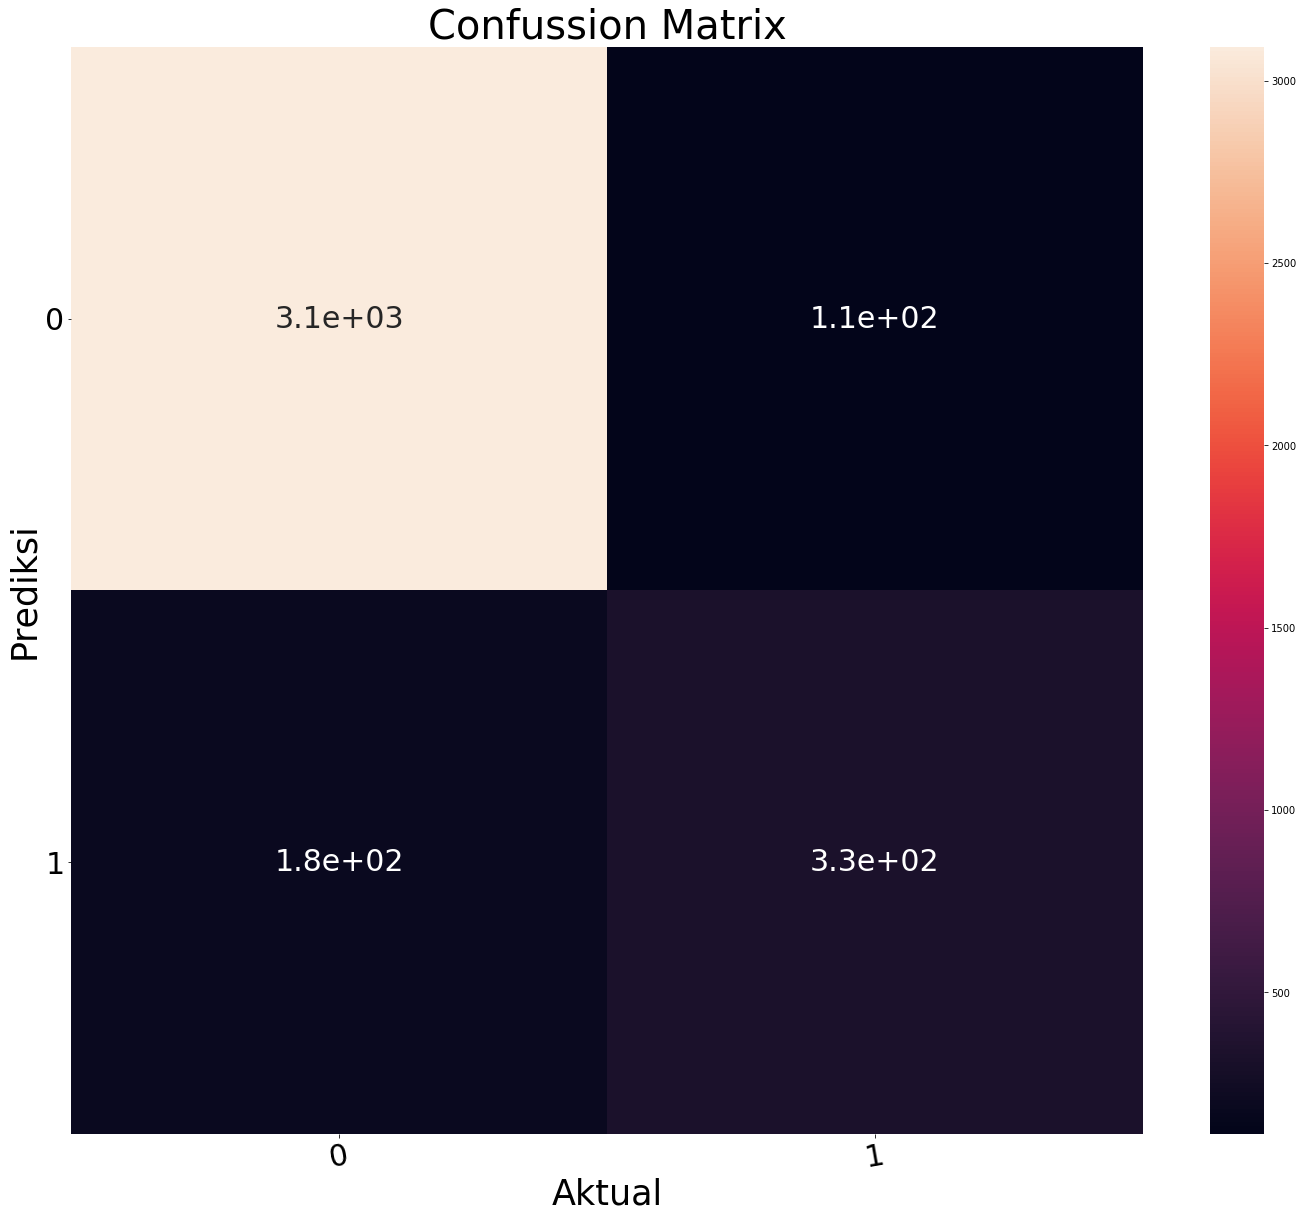

In [338]:

plt.figure(figsize=(24,20))
sns.heatmap(confusion_matrix(y_actu, y_pred), annot=True, annot_kws={"size":30})
plt.xlabel('Aktual', fontsize = 35) # x-axis label with fontsize 15
plt.ylabel('Prediksi', fontsize = 35) # y-axis label with fontsize 15
plt.xticks(fontsize=30,rotation=10)
plt.yticks(fontsize=30,rotation=0)
plt.title("Confussion Matrix",fontsize=40)
plt.show()


In [333]:
gabungan[["stop_stem_id"]]

stop_stem_id
0      inap rapi bersih suasana tenang layan ramah ba...
1      wifi kamar sedia heater kopiteh dispenser sedi...
2      lantai kamar mandi kotor bau sdh jdi sarang ny...
3                     wc jorok kasur bersih handuk ganti
4                                                  bocor
...                                                  ...
18565                      tolong kamar kulkas dibagusin
18566                                       buruk kecewa
18567  lampu redup bau pengap kamar mandi ga gantung ...
18568      kamar mawar kunci suasana hotel seram ac sepi
18569                                overall oke singgah

[18570 rows x 1 columns]

In [52]:
#4 Random Forest 
for n in [5,10,50,100,500]:
    model_RF = RandomForestClassifier(n_estimators = n, random_state = 1)
    model_RF.fit(X_train,y_train)
    print("N = ",n)
    print(classification_report(y_test, model_RF.predict(X_test)))
    print()

N =  5
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3204
           1       0.71      0.51      0.59       510

    accuracy                           0.90      3714
   macro avg       0.82      0.74      0.77      3714
weighted avg       0.90      0.90      0.90      3714


N =  10
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3204
           1       0.79      0.48      0.60       510

    accuracy                           0.91      3714
   macro avg       0.86      0.73      0.77      3714
weighted avg       0.90      0.91      0.90      3714


N =  50
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3204
           1       0.85      0.51      0.64       510

    accuracy                           0.92      3714
   macro avg       0.89      0.75      0.80      3714
weighted avg       0.92      0.92      0.91      

In [69]:
X_train.shape

(11142, 1455)

In [67]:
Xtf1.shape

(3714, 530)

In [80]:
hasil=model_SVM.predict(Xtf1)

In [81]:
test

review_id  \
0     7302180ac7160f04a405d8aa7bd6beb8   
1     3184c670e170f565c7522eb76a320ba1   
2     e33abf6bb5d5a9a77c339043b1725dc8   
3     061d388950340070a6ac03fabc9027b0   
4     e62d87c348674b6c06856964f3ab16b8   
...                                ...   
3709  4fac4c272d9194021f921138ebd5b389   
3710  4fabd4722dd4074841f9656f75105f09   
3711  44ff89997547d54cccb2a33776181240   
3712  c46cf84e3665a10199a539fee919edd6   
3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                            review_text  \
0     Kasur rusak, punggung saya sakit, kasurnya ga ...   
1                                                 gerah   
2     tempat ridur atas bawah.. ac nya pararel, tdk ...   
3      ac kurang dingin, tidak ada snack sperti di foto   
4     Lumayan untuk guest house dengan standart harg...   
...                                                 ...   
3709          Tolong kamar 214 kulkasnya dibagusin..!!!   
3710               buruk sekali, sangat mengecewakan.\n   
3711  Lampu redup. Bau pengap. Dalam kamar mandi ga ...   
3712  Kamar mawar tidak bisa dikunci dari luar, suas...   
3713                     Overall oke lah buat singgah..   

                                        stop_stem_ganda  
0     kasur rusak punggung sakit kasur ga padat leng...  
1                                                 gerah  
2     ridur ata ac pararel tdk air pana chanel tv yg...  
3                           ac dingin snack sperti foto  
4              lumayan guest hous standart harga segitu  
...                                                 ...  
3709                  tolong kamar 214 kulkas dibagusin  
3710                                       buruk kecewa  
3711  lampu redup bau pengap kamar mandi ga gantung ...  
3712      kamar mawar kunci suasana hotel seram ac sepi  
3713                                 overal oke singgah  

[3714 rows x 3 columns]

In [91]:
submission=pd.DataFrame({"review_id":test.review_id,"category":hasil})

In [92]:
submission.to_csv("submission.csv",index=False)

In [87]:
submission.loc[submission.category==1]

review_id  category
116   68f87efdb630bc9180534fab9a9bbc38         1
133   4ae509dcd5e61c727325d511a7c2da17         1
945   d2e25f20c68d1102c4f27c139dea909d         1
977   07f12bf9b0c7e1db53571550fcf7d0ef         1
1064  cfa953e44ca283913b8b64cb70288cc3         1
1319  71eb71a0fb6130c314e50012ae1e400d         1
1403  6fb3da4d5d8f893f989b0799acfa9d31         1
1459  2a49a616fe5db807b803981aeb92660e         1
1479  3c179f3643b7b5035c6302dac007c7cb         1
1575  faed92811aa58cfbaeeea3fec5b8b305         1
1707  40434c4b7f99ca7c4a9cad367d0ed0a2         1
2319  5f496ec1d6ea54d8601fcb2667d815ab         1
2425  2375a923419724ae98cf1d7fead411c3         1
2608  dec8bdca71832361675c622e24084efe         1
2738  cf44f3a6200202c6ee512de73a6fb6cf         1
2803  9e519f0099c17236e495c44dc9747cad         1
3070  d1d5504517e00e72c129d55107b18351         1
3090  d3346322985755896f3d5da01c12a3fc         1
3111  8e64fa66c1d842184ae41187c9a338c4         1
3512  9c1ed94eea0a3f7d7ee96617fe8ba510         1
3649  2fcac4497619516e6e95c3203240ab77         1
3702  9811099f077b7cdfe1a93237944ebbd0         1

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
for i in ['f1_macro', 'accuracy','recall','precision']:
    scores = cross_val_score(model, training, y, scoring=i, cv=cv, n_jobs=-1)
    print(i,'\n\n',scores)

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9227248249865374

In [68]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17642451],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [67]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
for n in [5,10,50,100,500,1000]:
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(X_train,y_train)
    print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3204
           1       0.71      0.51      0.59       510

    accuracy                           0.90      3714
   macro avg       0.82      0.74      0.77      3714
weighted avg       0.90      0.90      0.90      3714

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3204
           1       0.79      0.48      0.60       510

    accuracy                           0.91      3714
   macro avg       0.86      0.73      0.77      3714
weighted avg       0.90      0.91      0.90      3714

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3204
           1       0.85      0.51      0.64       510

    accuracy                           0.92      3714
   macro avg       0.89      0.75      0.80      3714
weighted avg       0.92      0.92      0.91      3714

              preci

KeyboardInterrupt: 

In [ ]:
best = train.loc[train['category']==1]
best['review_text'] = best['review_text'].str.lower()

In [ ]:
best

In [ ]:
x = best['review_text']
x = [re.sub('[^ \w]','',i) for i in x]
strr = [p for p in [re.split(' ',i) for i in x]]
strbaru = [i for n in strr for i in n]
#ini string yang kosong dihapus
strbaru = [i for i in strbaru if re.search('(\w)',i)]

In [39]:
len(strbaru)

27366

In [40]:
arraybest = []
for i in strbaru:
    if i not in arraybest:
        arraybest.append(i)

In [41]:
from wordcloud import WordCloud, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [47]:
len(arraybest)

4053

In [43]:
strgadepan = [x for x in strbaru if not re.search('(dan|atau|di|pada|yang|dari|nya|untuk|for|nya|daaan)',x)]
strgadepan

['rapi',
 'bersih',
 'suasana',
 'tenang',
 'ramah',
 'membantu',
 'lokasi',
 'cukup',
 'dekat',
 'ke',
 'beberapa',
 'obyek',
 'wisata',
 'kalau',
 'saya',
 'ke',
 'bandung',
 'lagi',
 'mungkin',
 'saya',
 'akan',
 'menginap',
 'lagi',
 'sini',
 'sangat',
 'baikkmr',
 'bersihmenu',
 'juga',
 'enak',
 'to',
 'kutang',
 'bagus',
 'hotel',
 'bersih',
 'renang',
 'bersihpelayanan',
 'hotel',
 'baikdeket',
 'sm',
 'indomaretdepan',
 'hotel',
 'ada',
 'makanan',
 'manadomurah',
 'enakremomended',
 'banget',
 'bersih',
 'banget',
 'lokasi',
 'strategis',
 'pusat',
 'kota',
 'namun',
 'pesan',
 '1',
 'double',
 'bed',
 'twin',
 'bad',
 'gempa',
 'lombok',
 'bikin',
 'takut',
 'menginap',
 'hotel',
 'bertingkat',
 'kamar',
 'agak',
 'lembab',
 'lokasi',
 'oke',
 'kami',
 'sekeluarga',
 'sangat',
 'kami',
 'datang',
 'sanpai',
 'cek',
 'out',
 'papan',
 'nama',
 'kurang',
 'terlihat',
 'kurang',
 'besar',
 'lokasi',
 'pinggir',
 'jln',
 'penjual',
 'makan',
 'pelayanan',
 'kebersihan',
 'wifi',

Error in callback <function flush_figures at 0x7f082e6f3710> (for post_execute):


KeyboardInterrupt: 

In [40]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming process
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)

print(output)
# ekonomi indonesia sedang dalam tumbuh yang bangga

print(stemmer.stem('Mereka meniru-nirukannya'))
# mereka tiru

print(stemmer.stem('woi JANCOKK kirik anjim delem delam papak'))

ekonomi indonesia sedang dalam tumbuh yang bangga
mereka tiru
woi jancokk kirik anjim delem dam papak


In [49]:

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

kata="saya sedang berada di hutan yang sangat dengan rimbanya sekali"
print(' '.join([i for i in kata.split() if i not in stopwords]))

hutan rimbanya


In [ ]:
1. benerin tanda baca , .   
2. stop words
3. stemming
4. dikumpulin jadi satu semua (tinggal tersisa kata yang unik)
5. dari masing2 kata2 unik, kita cari skor fuzzy wuzzy
6. modelling

In [44]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

kalimat = "[MOJOK.co] Manfaat jogging setiap pagi yang pertama adalah meredakan stres. Olahraga itu seperti kode bagi tubuh untuk memproduksi hormon endorfin, agen perangsang rasa bahagia. Dilakukan di pagi hari, ketika udara masih bersih, sejuk, jalanan lengang, gunung terlihat jelas di sebelah utara, manfaat jogging bisa kamu rasakan secara maksimal."
kalimat = kalimat.translate(str.maketrans('','',string.punctuation)).lower()

tokens = word_tokenize(kalimat)
listStopword =  set(stopwords.words('indonesian'))

removed = []
for t in tokens:
    if t not in listStopword:
        removed.append(t)

print(removed)
# Hasil
# ['mojokco', 'manfaat', 'jogging', 'pagi', 'meredakan', 'stres', 'olahraga', 'kode', 'tubuh', 'memproduksi', 'hormon', 'endorfin', 'agen', 'perangsang', 'bahagia', 'pagi', 'udara', 'bersih', 'sejuk', 'jalanan', 'lengang', 'gunung', 'sebelah', 'utara', 'manfaat', 'jogging', 'rasakan', 'maksimal']


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\USER/nltk_data'
    - 'D:\\Anaconda\\nltk_data'
    - 'D:\\Anaconda\\share\\nltk_data'
    - 'D:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\USER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [24]:
from googletrans import Translator


In [33]:

result = Translator.translate('weird',src='en', dest='id',text="as")


AttributeError: 'str' object has no attribute '_translate'

In [26]:
translator = Translator()
result = translator.translate('Mikä on nimesi', src='fi', dest='fr')

print(result.src)
print(result.dest)
print(result.text)

AttributeError: 'NoneType' object has no attribute 'group'

In [43]:
from googletrans import Translator
translator = Translator()
translator.translate('안녕하세요.')

AttributeError: 'NoneType' object has no attribute 'group'

In [39]:
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.co.kr',])
translator.translate('안녕하세요.')

AttributeError: 'NoneType' object has no attribute 'group'

In [41]:
from googletrans import Translator
translator = Translator()
translator.detect('이 문장은 한글로 쓰여졌습니다.')

AttributeError: 'NoneType' object has no attribute 'group'

In [58]:
from google_trans_new import google_translator  
  
detector = google_translator()  
detect_result = detector.detect("the water is appearing in the sea itu air namanya apapun yang mengganggumu pasti akan kucari ")
print(detect_result)

['id', 'indonesian']


In [59]:
train

review_id  \
0      0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1      7d8cb2e465c5602e51c1ba8710e8ff16   
2      1f4447c73e5e1aac462d05b0ecbd5a55   
3      b9aefbfb0debbfff43f8b268c82b43c0   
4      e2afef18bd695fae43d4d53b8c547bd4   
...                                 ...   
14851  5ed96732e4f1e1e69dfb8669cf507587   
14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category  
0      Penginapannya rapi, bersih, suasana tenang, pe...         1  
1      wifi tidak sampai kamar, tidak tersedia heater...         0  
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0  
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0  
4                                             bocor lagi         0  
...                                                  ...       ...  
14851                           kotor dan tidak ada wifi         0  
14852                                 Kamar tidak bersih         0  
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0  
14854                    Wifinya sangat kurang memadai..         0  
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0  

[14856 rows x 3 columns]

In [60]:
for item in train.review_text:
    detect_result = detector.detect(item)
    if detect_result[0]=="en":
        print(item)    

having great services and strategic locations near culinary spots.
the room was comfort, big, and the facilities was good. strategic place in the center of city
clean romm and new building . 
nice room, love it, good food and decdnt price at room service, good breakfast
no wifi
Although we only stayed 1 night but overall we were satisfied with the facilities and service at thi
dirty and channel tv is locally 

ok

Great place with affordable price
wifi n breakfast definitely need improvement
no shower


KeyboardInterrupt: 

In [69]:
arrayku=[item for item in train.review_text if detector.detect(item)!='id']
print('\n'.join(arrayku))

google_new_transError: 429 (Too Many Requests) from TTS API. Probable cause: Unknown

## Data Kedua

In [7]:
train2=pd.read_csv("train.csv")
train2.head()

review_id  \
0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1  7d8cb2e465c5602e51c1ba8710e8ff16   
2  1f4447c73e5e1aac462d05b0ecbd5a55   
3  b9aefbfb0debbfff43f8b268c82b43c0   
4  e2afef18bd695fae43d4d53b8c547bd4   

                                         review_text  category  
0  Penginapannya rapi, bersih, suasana tenang, pe...         1  
1  wifi tidak sampai kamar, tidak tersedia heater...         0  
2  Lantai kamar mandi kotor, bau, dan seperti sdh...         0  
3  Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0  
4                                         bocor lagi         0

In [8]:
test2=pd.read_csv("test.csv")
test2.head()

review_id  \
0  7302180ac7160f04a405d8aa7bd6beb8   
1  3184c670e170f565c7522eb76a320ba1   
2  e33abf6bb5d5a9a77c339043b1725dc8   
3  061d388950340070a6ac03fabc9027b0   
4  e62d87c348674b6c06856964f3ab16b8   

                                         review_text  
0  Kasur rusak, punggung saya sakit, kasurnya ga ...  
1                                              gerah  
2  tempat ridur atas bawah.. ac nya pararel, tdk ...  
3   ac kurang dingin, tidak ada snack sperti di foto  
4  Lumayan untuk guest house dengan standart harg...

In [9]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X

token=[]
for i in range(train2.shape[0]):
    token.append(token_satu_kata(train2["review_text"][i]))
train2["token"]=token

In [10]:
train2

review_id  \
0      0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1      7d8cb2e465c5602e51c1ba8710e8ff16   
2      1f4447c73e5e1aac462d05b0ecbd5a55   
3      b9aefbfb0debbfff43f8b268c82b43c0   
4      e2afef18bd695fae43d4d53b8c547bd4   
...                                 ...   
14851  5ed96732e4f1e1e69dfb8669cf507587   
14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
14851                           kotor dan tidak ada wifi         0   
14852                                 Kamar tidak bersih         0   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0   
14854                    Wifinya sangat kurang memadai..         0   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0   

                                                   token  
0      penginapannya rapi bersih suasana tenang pelay...  
1      wifi tidak sampai kamar tidak tersedia heater ...  
2      lantai kamar mandi kotor bau dan seperti sdh j...  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  
4                                             bocor lagi  
...                                                  ...  
14851                           kotor dan tidak ada wifi  
14852                                 kamar tidak bersih  
14853  kamarnya terlalu kecil beberapa cm antara kasu...  
14854                      wifinya sangat kurang memadai  
14855  pelayan sangat sangat buruk dulu pelayan nya r...  

[14856 rows x 4 columns]

In [11]:
list(train2.token.values)

['penginapannya rapi bersih suasana tenang pelayannya ramah dan banyak membantu lokasi cukup dekat ke beberapa obyek wisata kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini',
 'wifi tidak sampai kamar tidak tersedia heater untuk kopi teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai',
 'lantai kamar mandi kotor bau dan seperti sdh jdi sarang nyamuk dikamar mandinya pesan superior double yg dikasih twin mungkin karena murah saya maklumin tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg',
 'wc jorok kasur tidak dibersihkan handuk tidak diganti',
 'bocor lagi',
 'kebersihan pelayanan kerapihan',
 'saya hampir tidak bisa tidur krn bantal sangat bau apek',
 'pelayanannya sangat baik kmr yang bersih menu makanannya juga enak to sayang wifinya kutang bagus',
 'kamar banyak kecoa tlg lebih diperhatikan kebersihannya',
 'kamar mandi banjir',
 'lebih menjaga kebersihan khususnya tempat tidur untuk kenyamanan t

In [12]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(list(train2.token.values))

In [13]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [14]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

idf_weights
kamar          1.915584
tidak          2.235679
dan            2.256742
ada            2.379920
di             2.487423
...                 ...
keairy         9.913079
keamaan        9.913079
keamaanan      9.913079
keasinan       9.913079
¹tempatnya     9.913079

[13644 rows x 1 columns]

In [15]:
# count matrix 
count_vector=cv.transform(list(train2.token.values)) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [16]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

tfidf
obyek          0.327736
lagi           0.271724
wisata         0.258987
ke             0.256000
penginapannya  0.246989
...                 ...
gerbang        0.000000
gerbangnya     0.000000
gerbangpun     0.000000
gerbangx       0.000000
¹tempatnya     0.000000

[13644 rows x 1 columns]

In [17]:
tf_idf_vector

<14856x13644 sparse matrix of type '<class 'numpy.float64'>'
	with 217596 stored elements in Compressed Sparse Row format>

In [18]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib import pyplot as plt
import seaborn as sns
import eli5

In [22]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), 
                                   lowercase=True, max_features=150000)

In [23]:
X=list(train2.token.values)
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.25, random_state=1)

In [24]:
X_train_text = text_transformer.fit_transform(X_train)
X_test_text = text_transformer.transform(X_test)

In [25]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

In [26]:
logit.fit(X_train_text, train_val['label'])

NameError: name 'train_val' is not defined

In [38]:
logit.fit(X_train_text, train2['category'])

ValueError: Found input variables with inconsistent numbers of samples: [11142, 14856]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features=150000)
X_vec = vector.fit_transform(list(train2.token.values)).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf = tfidf.fit_transform(X_vec).toarray()

In [29]:
Xtf.shape

(14856, 13644)

In [30]:
y=train2["category"]

In [45]:
y.shape

(14856,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtf, y, test_size=0.25, random_state=1)

In [32]:
logit.fit(X_train, y_train)

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
print(classification_report(y_test, logit.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3204
           1       0.80      0.68      0.74       510

    accuracy                           0.93      3714
   macro avg       0.88      0.83      0.85      3714
weighted avg       0.93      0.93      0.93      3714



In [33]:
test2

review_id  \
0     7302180ac7160f04a405d8aa7bd6beb8   
1     3184c670e170f565c7522eb76a320ba1   
2     e33abf6bb5d5a9a77c339043b1725dc8   
3     061d388950340070a6ac03fabc9027b0   
4     e62d87c348674b6c06856964f3ab16b8   
...                                ...   
3709  4fac4c272d9194021f921138ebd5b389   
3710  4fabd4722dd4074841f9656f75105f09   
3711  44ff89997547d54cccb2a33776181240   
3712  c46cf84e3665a10199a539fee919edd6   
3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                            review_text  
0     Kasur rusak, punggung saya sakit, kasurnya ga ...  
1                                                 gerah  
2     tempat ridur atas bawah.. ac nya pararel, tdk ...  
3      ac kurang dingin, tidak ada snack sperti di foto  
4     Lumayan untuk guest house dengan standart harg...  
...                                                 ...  
3709          Tolong kamar 214 kulkasnya dibagusin..!!!  
3710               buruk sekali, sangat mengecewakan.\n  
3711  Lampu redup. Bau pengap. Dalam kamar mandi ga ...  
3712  Kamar mawar tidak bisa dikunci dari luar, suas...  
3713                     Overall oke lah buat singgah..  

[3714 rows x 2 columns]

In [55]:
token=[]
for i in range(test2.shape[0]):
    token.append(token_satu_kata(test2["review_text"][i]))
test2["token"]=token

In [56]:
vector = CountVectorizer(max_features=150000)
X_vec = vector.fit_transform(list(test2.token.values)).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf_test = tfidf.fit_transform(X_vec).toarray()

In [61]:
Xtf_test.shape

(3714, 6415)

In [60]:
Xtf.shape

(14856, 13644)

In [ ]:
Xtf_test

In [58]:
logit_test = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

In [62]:
logit_test.fit(Xtf,train2["category"])

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
hasil=logit_test.predict(Xtf_test)

ValueError: X has 6415 features per sample; expecting 13644

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features=6415)
X_vec = vector.fit_transform(list(train2.token.values)).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf_train = tfidf.fit_transform(X_vec).toarray()

In [65]:
Xtf_train.shape

(14856, 6415)

In [66]:
logit_test = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

In [67]:
logit_test.fit(Xtf_train,train2["category"])

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
hasil=logit_test.predict(Xtf_test)

In [79]:
len(hasil)

3714

In [73]:
list(test2.review_id.values)

array(['7302180ac7160f04a405d8aa7bd6beb8',
       '3184c670e170f565c7522eb76a320ba1',
       'e33abf6bb5d5a9a77c339043b1725dc8', ...,
       '44ff89997547d54cccb2a33776181240',
       'c46cf84e3665a10199a539fee919edd6',
       '82d1677f2aa50eb79fb4e6f496384ef2'], dtype=object)

In [80]:
submit=pd.DataFrame({"review_id":list(test2.review_id.values),"category":list(hasil)})
submit.to_csv("submission2.csv",index=False)

In [34]:
Xtf.shape

(14856, 13644)

## n=6415

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xtf, y, test_size=0.25, random_state=1)

In [37]:
vector = CountVectorizer(max_features=6415)
X_vec = vector.fit_transform(list(train2.token.values)).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf_train = tfidf.fit_transform(X_vec).toarray()

In [83]:
from sklearn.model_selection import train_test_split
y=train2["category"]
X_train, X_test, y_train, y_test = train_test_split(Xtf_train, y, test_size=0.25, random_state=1)

In [84]:
logit_train1 = LogisticRegression(random_state=1)

In [85]:
logit_train1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
print(classification_report(y_test, logit_train1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3204
           1       0.93      0.61      0.74       510

    accuracy                           0.94      3714
   macro avg       0.93      0.80      0.85      3714
weighted avg       0.94      0.94      0.93      3714



In [87]:
vector = CountVectorizer(max_features=6415)
X_vec = vector.fit_transform(list(test2.token.values)).toarray()

from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
Xtf_test = tfidf.fit_transform(X_vec).toarray()

In [89]:
logit_test1 = LogisticRegression(random_state=1)
logit_test1.fit(Xtf_train,train2["category"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
hasil=logit_test1.predict(Xtf_test)
submit1=pd.DataFrame({"review_id":list(test2.review_id.values),"category":list(hasil)})
submit1.to_csv("submission3.csv",index=False)

In [91]:
submit1

review_id  category
0     7302180ac7160f04a405d8aa7bd6beb8         0
1     3184c670e170f565c7522eb76a320ba1         0
2     e33abf6bb5d5a9a77c339043b1725dc8         0
3     061d388950340070a6ac03fabc9027b0         0
4     e62d87c348674b6c06856964f3ab16b8         0
...                                ...       ...
3709  4fac4c272d9194021f921138ebd5b389         0
3710  4fabd4722dd4074841f9656f75105f09         0
3711  44ff89997547d54cccb2a33776181240         0
3712  c46cf84e3665a10199a539fee919edd6         0
3713  82d1677f2aa50eb79fb4e6f496384ef2         0

[3714 rows x 2 columns]

In [93]:
submit

review_id  category
0     7302180ac7160f04a405d8aa7bd6beb8         0
1     3184c670e170f565c7522eb76a320ba1         0
2     e33abf6bb5d5a9a77c339043b1725dc8         0
3     061d388950340070a6ac03fabc9027b0         0
4     e62d87c348674b6c06856964f3ab16b8         1
...                                ...       ...
3709  4fac4c272d9194021f921138ebd5b389         0
3710  4fabd4722dd4074841f9656f75105f09         0
3711  44ff89997547d54cccb2a33776181240         0
3712  c46cf84e3665a10199a539fee919edd6         0
3713  82d1677f2aa50eb79fb4e6f496384ef2         0

[3714 rows x 2 columns]

## Logistic Regression atur max_feature n

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,make_scorer


In [53]:
def pipeline(n_feature):
    X_vec = CountVectorizer(max_features=n_feature).fit_transform(list(train2.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    
    y=train2["category"]
    X_train, X_test, y_train, y_test = train_test_split(Xtf_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    print(classification_report(y_test, logit.predict(X_test)))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, Xtf_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(i,'\n\n',scores.mean())

In [68]:
for i in [400,500,550,650]:
    print(i)
    pipeline(i)
    print("===============")
    print()

400
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.89      0.64      0.74       510

    accuracy                           0.94      3714
   macro avg       0.92      0.81      0.85      3714
weighted avg       0.94      0.94      0.94      3714

400 

 0.7445881420756899

500
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.90      0.65      0.76       510

    accuracy                           0.94      3714
   macro avg       0.92      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

500 

 0.7561302891123465

550
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.91      0.65      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.82      0.86      3714
weighted

In [57]:
train2

review_id  \
0      0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1      7d8cb2e465c5602e51c1ba8710e8ff16   
2      1f4447c73e5e1aac462d05b0ecbd5a55   
3      b9aefbfb0debbfff43f8b268c82b43c0   
4      e2afef18bd695fae43d4d53b8c547bd4   
...                                 ...   
14851  5ed96732e4f1e1e69dfb8669cf507587   
14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
14851                           kotor dan tidak ada wifi         0   
14852                                 Kamar tidak bersih         0   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0   
14854                    Wifinya sangat kurang memadai..         0   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0   

                                                   token  
0      penginapannya rapi bersih suasana tenang pelay...  
1      wifi tidak sampai kamar tidak tersedia heater ...  
2      lantai kamar mandi kotor bau dan seperti sdh j...  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  
4                                             bocor lagi  
...                                                  ...  
14851                           kotor dan tidak ada wifi  
14852                                 kamar tidak bersih  
14853  kamarnya terlalu kecil beberapa cm antara kasu...  
14854                      wifinya sangat kurang memadai  
14855  pelayan sangat sangat buruk dulu pelayan nya r...  

[14856 rows x 4 columns]

In [56]:
X_vec = CountVectorizer(max_features=650).fit_transform(list(train2.token.values)).toarray()
tfidf = TfidfTransformer()
Xtf_train = tfidf.fit_transform(X_vec).toarray()
y=train2["category"]
X=Xtf_train

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,make_scorer


In [58]:
logit = LogisticRegression(random_state=1)
logit.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
test2

review_id  \
0     7302180ac7160f04a405d8aa7bd6beb8   
1     3184c670e170f565c7522eb76a320ba1   
2     e33abf6bb5d5a9a77c339043b1725dc8   
3     061d388950340070a6ac03fabc9027b0   
4     e62d87c348674b6c06856964f3ab16b8   
...                                ...   
3709  4fac4c272d9194021f921138ebd5b389   
3710  4fabd4722dd4074841f9656f75105f09   
3711  44ff89997547d54cccb2a33776181240   
3712  c46cf84e3665a10199a539fee919edd6   
3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                            review_text  
0     Kasur rusak, punggung saya sakit, kasurnya ga ...  
1                                                 gerah  
2     tempat ridur atas bawah.. ac nya pararel, tdk ...  
3      ac kurang dingin, tidak ada snack sperti di foto  
4     Lumayan untuk guest house dengan standart harg...  
...                                                 ...  
3709          Tolong kamar 214 kulkasnya dibagusin..!!!  
3710               buruk sekali, sangat mengecewakan.\n  
3711  Lampu redup. Bau pengap. Dalam kamar mandi ga ...  
3712  Kamar mawar tidak bisa dikunci dari luar, suas...  
3713                     Overall oke lah buat singgah..  

[3714 rows x 2 columns]

In [61]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X

token=[]
for i in range(test2.shape[0]):
    token.append(token_satu_kata(test2["review_text"][i]))
test2["token"]=token

In [62]:
X_vec = CountVectorizer(max_features=650).fit_transform(list(test2.token.values)).toarray()
tfidf = TfidfTransformer()
Xtf_test = tfidf.fit_transform(X_vec).toarray()

In [63]:
hasil=logit.predict(Xtf_test)
submit1=pd.DataFrame({"review_id":list(test2.review_id.values),"category":list(hasil)})
submit1.to_csv("submission4.csv",index=False)

In [65]:
submit1.loc[submit1.category==1]

review_id  category
174   bb1000601d6fc02072bd0353dba0b024         1
208   4515c5a5d88c5d3df1e9c7838bd6c4ca         1
242   6a645fbea0f1d63151bb4be6ca4c355e         1
259   5d3e1702e585851522d9498e27d0fb38         1
260   d8b3244298048e25c450d9c59bc46958         1
...                                ...       ...
3578  cda5cf19fc2d72bfa5907a9984eaf138         1
3596  88d55fa427c1cbb5e23b7a276b1cf313         1
3600  e5d412da46775d7441a794b54a82a347         1
3624  81288ca285b88f508a6ff2b8997ec7da         1
3679  04bab1a111179a9fa362e482fdcc0b27         1

[92 rows x 2 columns]

In [77]:
train3=pd.read_csv("train.csv")
test3=pd.read_csv("test.csv")
test3["category"]=[2 for i in range(test3.shape[0])]

In [78]:
train3.head()

review_id  \
0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1  7d8cb2e465c5602e51c1ba8710e8ff16   
2  1f4447c73e5e1aac462d05b0ecbd5a55   
3  b9aefbfb0debbfff43f8b268c82b43c0   
4  e2afef18bd695fae43d4d53b8c547bd4   

                                         review_text  category  
0  Penginapannya rapi, bersih, suasana tenang, pe...         1  
1  wifi tidak sampai kamar, tidak tersedia heater...         0  
2  Lantai kamar mandi kotor, bau, dan seperti sdh...         0  
3  Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0  
4                                         bocor lagi         0

In [79]:
test3.head()

review_id  \
0  7302180ac7160f04a405d8aa7bd6beb8   
1  3184c670e170f565c7522eb76a320ba1   
2  e33abf6bb5d5a9a77c339043b1725dc8   
3  061d388950340070a6ac03fabc9027b0   
4  e62d87c348674b6c06856964f3ab16b8   

                                         review_text  category  
0  Kasur rusak, punggung saya sakit, kasurnya ga ...         2  
1                                              gerah         2  
2  tempat ridur atas bawah.. ac nya pararel, tdk ...         2  
3   ac kurang dingin, tidak ada snack sperti di foto         2  
4  Lumayan untuk guest house dengan standart harg...         2

In [119]:
gabungan=pd.concat([train3,test3],axis=0).reset_index()

In [120]:
gabungan.shape

(18570, 4)

In [121]:
gabungan.head()

index                         review_id  \
0      0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1      1  7d8cb2e465c5602e51c1ba8710e8ff16   
2      2  1f4447c73e5e1aac462d05b0ecbd5a55   
3      3  b9aefbfb0debbfff43f8b268c82b43c0   
4      4  e2afef18bd695fae43d4d53b8c547bd4   

                                         review_text  category  
0  Penginapannya rapi, bersih, suasana tenang, pe...         1  
1  wifi tidak sampai kamar, tidak tersedia heater...         0  
2  Lantai kamar mandi kotor, bau, dan seperti sdh...         0  
3  Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0  
4                                         bocor lagi         0

In [122]:
list(gabungan["review_text"].values)

['Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.',
 'wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai',
 'Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..',
 'Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti, ',
 'bocor lagi',
 'kebersihan, pelayanan, kerapihan',
 'saya hampir tidak bisa tidur krn bantal sangat bau apek',
 'Pelayanannya sangat baik,kmr yang bersih,menu makanannya juga enak to sayang wifinya kutang bagus..',
 'Kamar banyak kecoa, tlg lebih diperhatikan kebersihannya',
 'kamar mandi banjir',
 'Lebih menjaga kebersihan, khususnya tem

In [123]:
def token_satu_kata(X):
    X = re.sub('[^\w]',' ',X)
    X = re.sub('\s+',' ',X)
    X = re.sub('^b\s+','',X)
    X = re.sub('(\s)+$','',X)
    X = X.lower()
    return X

token=[]
for i in range(gabungan.shape[0]):
    token.append(token_satu_kata(gabungan["review_text"][i]))
gabungan["token"]=token

In [124]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565          Tolong kamar 214 kulkasnya dibagusin..!!!         2   
18566               buruk sekali, sangat mengecewakan.\n         2   
18567  Lampu redup. Bau pengap. Dalam kamar mandi ga ...         2   
18568  Kamar mawar tidak bisa dikunci dari luar, suas...         2   
18569                     Overall oke lah buat singgah..         2   

                                                   token  
0      penginapannya rapi bersih suasana tenang pelay...  
1      wifi tidak sampai kamar tidak tersedia heater ...  
2      lantai kamar mandi kotor bau dan seperti sdh j...  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  
4                                             bocor lagi  
...                                                  ...  
18565               tolong kamar 214 kulkasnya dibagusin  
18566                   buruk sekali sangat mengecewakan  
18567  lampu redup bau pengap dalam kamar mandi ga bi...  
18568  kamar mawar tidak bisa dikunci dari luar suasa...  
18569                       overall oke lah buat singgah  

[18570 rows x 5 columns]

In [111]:
gabungan["review_text"][0]

'Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.'

In [129]:
gabungan["index"][18569]

3713

In [133]:
train2.shape

(14856, 4)

In [140]:
gabungan["category"][14856]

2

In [145]:
gabungan[:14856]

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
14851  14851  5ed96732e4f1e1e69dfb8669cf507587   
14852  14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853  14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854  14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855  14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
14851                           kotor dan tidak ada wifi         0   
14852                                 Kamar tidak bersih         0   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0   
14854                    Wifinya sangat kurang memadai..         0   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0   

                                                   token  
0      penginapannya rapi bersih suasana tenang pelay...  
1      wifi tidak sampai kamar tidak tersedia heater ...  
2      lantai kamar mandi kotor bau dan seperti sdh j...  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  
4                                             bocor lagi  
...                                                  ...  
14851                           kotor dan tidak ada wifi  
14852                                 kamar tidak bersih  
14853  kamarnya terlalu kecil beberapa cm antara kasu...  
14854                      wifinya sangat kurang memadai  
14855  pelayan sangat sangat buruk dulu pelayan nya r...  

[14856 rows x 5 columns]

In [150]:
def pipeline(n_feature):
    X_vec = CountVectorizer(max_features=n_feature).fit_transform(list(gabungan.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    print(classification_report(y_test, logit.predict(X_test)))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(i,'\n\n',scores.mean())

In [151]:
for i in [400,500,550,650,1000]:
    print(i)
    pipeline(i)
    print("===============")
    print()

400
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.89      0.65      0.75       510

    accuracy                           0.94      3714
   macro avg       0.92      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

400 

 0.7494750092092346

500
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.90      0.65      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

500 

 0.754612401603719

550
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.90      0.66      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.83      0.87      3714
weighted 

In [152]:
def pipeline(n_feature):
    X_vec = CountVectorizer(max_features=n_feature).fit_transform(list(gabungan.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    print(classification_report(y_test, logit.predict(X_test)))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    print(i,'\n\n',scores.mean())

In [153]:
for i in [400,500,550,650,1000]:
    print(i)
    pipeline(i)
    print("===============")
    print()

400
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.89      0.65      0.75       510

    accuracy                           0.94      3714
   macro avg       0.92      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

400 

 0.858192296107999

500
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.90      0.65      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

500 

 0.8609963465349946

550
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.90      0.66      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.83      0.87      3714
weighted 

In [154]:
for i in [1000,2000,3000]:
    print(i)
    pipeline(i)
    print("===============")
    print()

1000
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.92      0.65      0.76       510

    accuracy                           0.94      3714
   macro avg       0.93      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

1000 

 0.8605102783500899

2000
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.93      0.64      0.76       510

    accuracy                           0.94      3714
   macro avg       0.94      0.82      0.86      3714
weighted avg       0.94      0.94      0.94      3714

2000 

 0.863193925662974

3000
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3204
           1       0.94      0.64      0.76       510

    accuracy                           0.94      3714
   macro avg       0.94      0.82      0.86      3714
weig

In [162]:
def pipeline(n_feature):
    X_vec = CountVectorizer(max_features=n_feature).fit_transform(list(gabungan.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    print(classification_report(y_test, logit.predict_proba(X_test)))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    print(i,'\n\n',scores.mean())

In [163]:
for i in [1000,2000,3000]:
    print(i)
    pipeline(i)
    print("===============")
    print()

1000


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [167]:
X_vec = CountVectorizer(max_features=2000).fit_transform(list(gabungan.token.values)).toarray()
tfidf = TfidfTransformer()
Xtf_train = tfidf.fit_transform(X_vec).toarray()
data_train=Xtf_train[:14856]
y=gabungan[:14856]["category"]

logit = LogisticRegression(random_state=1)
logit.fit(data_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
hasil=logit.predict(Xtf_train[14856:])
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil)})
submit1.to_csv("Data Asli BRI Hackaton.csv",index=False)

In [169]:
submit1.loc[submit1.category==1]

review_id  category
4     e62d87c348674b6c06856964f3ab16b8         1
11    1e3c8eac66575e51fc56f8af9801d53b         1
16    671fa8dfe78ff44d847edb97b52d63ff         1
23    a940cbb9d55e1ceea20c8e0ba6db9345         1
26    0d3fedbe31827ffabc3060cae4866a57         1
...                                ...       ...
3681  b4ce57d581bf47fe24c23eed1d63a0de         1
3687  aaf18edb96080b8c57562d0c3d9eac9e         1
3691  a9e5f07ccaea595199770daea5bb071e         1
3695  dabc6612561d57f63c810d5bb2029806         1
3713  82d1677f2aa50eb79fb4e6f496384ef2         1

[368 rows x 2 columns]

In [170]:
hasil=logit.predict_proba(Xtf_train[14856:])
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil)})
submit1.to_csv("Data Asli BRI Hackaton(2).csv",index=False)

In [171]:
hasil

array([[0.99500076, 0.00499924],
       [0.90688455, 0.09311545],
       [0.9828884 , 0.0171116 ],
       ...,
       [0.99517295, 0.00482705],
       [0.93161692, 0.06838308],
       [0.23046116, 0.76953884]])

In [172]:
hasil2=logit.predict_proba(Xtf_train[:14856])

In [176]:
hasilku=gabungan[:14856]

In [189]:
hasilku["prediksi"]=[array[1] for array in list(hasil2)]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
hasilku

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
14851  14851  5ed96732e4f1e1e69dfb8669cf507587   
14852  14852  b0692bdf4926ee0d58c2d9a0f28b0d62   
14853  14853  5217f5f284066f232d7b3c3bbd3cccd2   
14854  14854  31ca5a04ccc0dae4eaafc91c9822bede   
14855  14855  aadb614310e5ceb79b4c68d14f8dab8a   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
14851                           kotor dan tidak ada wifi         0   
14852                                 Kamar tidak bersih         0   
14853  kamarnya terlalu kecil beberapa cm antara kasu...         0   
14854                    Wifinya sangat kurang memadai..         0   
14855  Pelayan sangat sangat buruk. Dulu pelayan nya ...         0   

                                                   token  prediksi  
0      penginapannya rapi bersih suasana tenang pelay...  0.949467  
1      wifi tidak sampai kamar tidak tersedia heater ...  0.036082  
2      lantai kamar mandi kotor bau dan seperti sdh j...  0.025571  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  0.001965  
4                                             bocor lagi  0.035354  
...                                                  ...       ...  
14851                           kotor dan tidak ada wifi  0.003358  
14852                                 kamar tidak bersih  0.072203  
14853  kamarnya terlalu kecil beberapa cm antara kasu...  0.042739  
14854                      wifinya sangat kurang memadai  0.022227  
14855  pelayan sangat sangat buruk dulu pelayan nya r...  0.043900  

[14856 rows x 6 columns]

In [191]:
hasilku.to_csv("rekuesan taruna.csv")

In [188]:
[array[1] for array in list(hasil2)]

[0.9494666453345424,
 0.03608217322492987,
 0.02557114402446353,
 0.0019649852198926105,
 0.03535360898906256,
 0.08494893470694939,
 0.008129000157497344,
 0.9032753132723502,
 0.028044262121610358,
 0.038261672771270544,
 0.04353951472462381,
 0.02853474625897723,
 0.9676541566946295,
 0.6966497598047013,
 0.022504697189443194,
 0.08085049184417803,
 0.006968146076275598,
 0.053332017521500054,
 0.0018358806667202548,
 0.02865141379199168,
 0.023303829123357378,
 0.04940162033779397,
 0.1118312897519394,
 0.007576322145315508,
 0.05603170063077997,
 0.05751037282343985,
 0.12898873876606454,
 0.016792366680363748,
 0.3244801891688052,
 0.02683523475458506,
 0.1470578835575594,
 0.0056482844920450045,
 0.03107478973580773,
 0.08056004276475413,
 0.10640065007556831,
 0.01788543292210558,
 0.011651047351582915,
 0.2280184221284446,
 0.01817066769697148,
 0.15274045484133286,
 0.1140812806808818,
 0.014668715459103362,
 0.01982394504177272,
 0.11765388804671979,
 0.029202275087637942,
 

In [192]:
hasil2

array([[0.05053335, 0.94946665],
       [0.96391783, 0.03608217],
       [0.97442886, 0.02557114],
       ...,
       [0.95726139, 0.04273861],
       [0.97777294, 0.02222706],
       [0.95609967, 0.04390033]])

In [193]:
hasil2

array([[0.05053335, 0.94946665],
       [0.96391783, 0.03608217],
       [0.97442886, 0.02557114],
       ...,
       [0.95726139, 0.04273861],
       [0.97777294, 0.02222706],
       [0.95609967, 0.04390033]])

In [196]:
data_train.shape

(14856, 2000)

In [195]:
Xtf_train.shape

(18570, 2000)

In [ ]:
THRESHOLD = 0.45
preds = np.where(logit.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [197]:
hasil_akhir=np.where(logit.predict_proba(Xtf_train[14856:])[:,1] > 0.45, 1, 0)
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit1.to_csv("Semoga Menang Aaamiin.csv",index=False)

In [198]:
submit1

review_id  category
0     7302180ac7160f04a405d8aa7bd6beb8         0
1     3184c670e170f565c7522eb76a320ba1         0
2     e33abf6bb5d5a9a77c339043b1725dc8         0
3     061d388950340070a6ac03fabc9027b0         0
4     e62d87c348674b6c06856964f3ab16b8         1
...                                ...       ...
3709  4fac4c272d9194021f921138ebd5b389         0
3710  4fabd4722dd4074841f9656f75105f09         0
3711  44ff89997547d54cccb2a33776181240         0
3712  c46cf84e3665a10199a539fee919edd6         0
3713  82d1677f2aa50eb79fb4e6f496384ef2         1

[3714 rows x 2 columns]

In [200]:
submit1.loc[submit1.category==1]

review_id  category
4     e62d87c348674b6c06856964f3ab16b8         1
11    1e3c8eac66575e51fc56f8af9801d53b         1
16    671fa8dfe78ff44d847edb97b52d63ff         1
23    a940cbb9d55e1ceea20c8e0ba6db9345         1
26    0d3fedbe31827ffabc3060cae4866a57         1
...                                ...       ...
3687  aaf18edb96080b8c57562d0c3d9eac9e         1
3691  a9e5f07ccaea595199770daea5bb071e         1
3695  dabc6612561d57f63c810d5bb2029806         1
3696  0d50939b26b19eb4511266a2af0f9836         1
3713  82d1677f2aa50eb79fb4e6f496384ef2         1

[410 rows x 2 columns]

In [ ]:
hasil_akhir=np.where(logit.predict_proba(Xtf_train[14856:])[:,1] > 0.4, 1, 0)
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit1.to_csv("Semoga Menang Aaamiin(2).csv",index=False)

In [201]:
def pipeline(threshold):
    X_vec = CountVectorizer(max_features=2000).fit_transform(list(gabungan.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    pred=np.where(logit.predict_proba(X_test)[:,1] > threshold, 1, 0)
    print(classification_report(y_test, pred))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(i,'\n\n',scores.mean())

In [202]:
for thrs in [0.3,0.35,0.4,0.45]:
    print(thrs)
    pipeline(thrs)

0.3
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3204
           1       0.80      0.77      0.79       510

    accuracy                           0.94      3714
   macro avg       0.88      0.87      0.88      3714
weighted avg       0.94      0.94      0.94      3714

1000 

 0.7579431984799846
0.35
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3204
           1       0.85      0.74      0.79       510

    accuracy                           0.95      3714
   macro avg       0.90      0.86      0.88      3714
weighted avg       0.94      0.95      0.94      3714

1000 

 0.7579431984799846
0.4
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3204
           1       0.88      0.71      0.78       510

    accuracy                           0.95      3714
   macro avg       0.92      0.85      0.88      3714
weighte

In [204]:
hasil_akhir=np.where(logit.predict_proba(Xtf_train[14856:])[:,1] > 0.4, 1, 0)
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit1.to_csv("Semoga Menang Aaamiin(4).csv",index=False)

In [205]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565          Tolong kamar 214 kulkasnya dibagusin..!!!         2   
18566               buruk sekali, sangat mengecewakan.\n         2   
18567  Lampu redup. Bau pengap. Dalam kamar mandi ga ...         2   
18568  Kamar mawar tidak bisa dikunci dari luar, suas...         2   
18569                     Overall oke lah buat singgah..         2   

                                                   token  
0      penginapannya rapi bersih suasana tenang pelay...  
1      wifi tidak sampai kamar tidak tersedia heater ...  
2      lantai kamar mandi kotor bau dan seperti sdh j...  
3      wc jorok kasur tidak dibersihkan handuk tidak ...  
4                                             bocor lagi  
...                                                  ...  
18565               tolong kamar 214 kulkasnya dibagusin  
18566                   buruk sekali sangat mengecewakan  
18567  lampu redup bau pengap dalam kamar mandi ga bi...  
18568  kamar mawar tidak bisa dikunci dari luar suasa...  
18569                       overall oke lah buat singgah  

[18570 rows x 5 columns]

In [206]:
X=gabungan[:14856]["review_text"]

In [207]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

X = [stemmer.stem(item) for item in X]

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

X = [stopword.remove(item) for item in X]

In [211]:
X

['inap rapi bersih suasana tenang layan ramah bantu lokasi obyek wisata bandung inap',
 'wifi kamar sedia heater kopi teh dispenser sedia kursi kamar rokok duduk lantai',
 'lantai kamar mandi kotor bau sdh jdi sarang nyamuk kamar mandi pesan superior double yg kasih twin murah maklumin tpi jdi lbh lg',
 'wc jorok kasur bersih handuk ganti',
 'bocor',
 'bersih layan kerapihan',
 'tidur krn bantal bau apek',
 'layan kmr bersih menu makan to sayang wifinya kutang bagus',
 'kamar kecoa tlg perhati bersih',
 'kamar mandi banjir',
 'jaga bersih tidur nyaman tamu bebial-bial betiga anak tilam hibak pempijit sarang pempijit kepala ranjang untung pindah kamar',
 'layan ramah ribet administrasi rekomen nginap dsini',
 'hotel bersih bgt nyaman kolam renang bersih layan hotel deket sm indomaret hotel makan manado murah remomended banget pokok',
 'roomnya bersih banget lokasi strategis pusat kota nyaman pesan 1 double bed twin bad gempa lombok bikin takut inap hotel tingkat',
 'sinyal internet area

In [212]:
def pipeline(threshold):
    X_vec = CountVectorizer(max_features=1000).fit_transform(X).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    pred=np.where(logit.predict_proba(X_test)[:,1] > threshold, 1, 0)
    print(classification_report(y_test, pred))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(scores.mean())

In [213]:
for i in [0.35,0.40,0.45,0.5]:
    print(i)
    pipeline(i)

0.35
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3204
           1       0.73      0.68      0.71       510

    accuracy                           0.92      3714
   macro avg       0.84      0.82      0.83      3714
weighted avg       0.92      0.92      0.92      3714

0.6760481510076912
0.4
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3204
           1       0.77      0.64      0.70       510

    accuracy                           0.92      3714
   macro avg       0.86      0.80      0.83      3714
weighted avg       0.92      0.92      0.92      3714

0.6760481510076912
0.45
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3204
           1       0.80      0.59      0.68       510

    accuracy                           0.92      3714
   macro avg       0.87      0.79      0.82      3714
weighted avg       0.9

In [299]:
def token_satu_kata(X):
    X = [re.sub('\W',' ',x) for x in X]
    x = [x.lower() for x in X]
    X = [re.sub('(bgt|bgd)','banget',i) for i in X]
    X = [re.sub('(yng|yg)','yang',i) for i in X]
    X = [re.sub('(jdo|jdi|jd)','jadi',i) for i in X]
    X = [re.sub('(tp)','tapi',i) for i in X]
    X = [re.sub('(kmar|kmr)','kamar',i) for i in X]
    X = [re.sub('(mndi)','mandi',i) for i in X]
    X = [re.sub('(tgl)','tanggal',i) for i in X]
    X = [re.sub('(sya|sy)','saya',i) for i in X]
    X = [re.sub('(sdah|sdh)','sudah',i) for i in X]
    X = [re.sub('(sgt)','sangat',i) for i in X]
    X = [re.sub('[0-9]+',' ',x) for x in X]
    X = [re.sub('\s+[a-zA-Z]\s+',' ',i) for i in X]
    X = [re.sub('\s+',' ',x) for x in X]
    return (''.join(X)).lower()
def stopward_stem_en(X):
    stop_words = list(set(stopwords.words('english')))
    #Stopword Removal
    X=' '.join([i for i in X.split() if i not in stop_words])
    #Stemming of data
    X=' '.join([ps.stem(i) for i in X.split()])
    return X
def stopward_stem_sastrawi(X):
    # stopward process
    stopwords2 = factory.get_stop_words()
    X=' '.join([i for i in X.split() if i not in stopwords2])
    # stemming process
    X = stemmer.stem(X)
    return X
def processing(X):
    X=token_satu_kata(X)
    X=stopward_stem_en(X)
    X=stopward_stem_sastrawi(X)
    return X
stop_stem_id=[]
stop_stem_en=[]
stop_stem_ganda=[]
token=[]
for i in range(gabungan.shape[0]):
    X=token_satu_kata(gabungan["review_text"][i])
    token.append(X)
    stop_stem_id.append(stopward_stem_sastrawi(X))
    stop_stem_en.append(stopward_stem_en(X))
    stop_stem_ganda.append(processing(gabungan["review_text"][i]))
gabungan["stop_stem_id"]=stop_stem_id
gabungan["stop_stem_en"]=stop_stem_en
gabungan["stop_stem_ganda"]=stop_stem_ganda
gabungan["token"]=token


In [252]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565          Tolong kamar 214 kulkasnya dibagusin..!!!         2   
18566               buruk sekali, sangat mengecewakan.\n         2   
18567  Lampu redup. Bau pengap. Dalam kamar mandi ga ...         2   
18568  Kamar mawar tidak bisa dikunci dari luar, suas...         2   
18569                     Overall oke lah buat singgah..         2   

                                                   token  \
0      Penginapannya rapi  bersih  suasana tenang  pe...   
1      wifi tidak sampai kamar  tidak tersedia heater...   
2      Lantai kamar mandi kotor  bau  dan seperti sdh...   
3      Wc jorok   Kasur tidak dibersihkan   handuk ti...   
4                                             bocor lagi   
...                                                  ...   
18565          Tolong kamar     kulkasnya dibagusin        
18566                buruk sekali  sangat mengecewakan     
18567  Lampu redup  Bau pengap  Dalam kamar mandi ga ...   
18568  Kamar mawar tidak bisa dikunci dari luar  suas...   
18569                     Overall oke lah buat singgah     

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                      tolong kamar kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap dalam kamar mandi ga ga...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      Wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565                   tolong kamar kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopi teh dispens sedia...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [218]:
list(gabungan["stop_stem_ganda"].values)

['inap rapi bersih suasana tenang layan ramah bantu lokasi obyek wisata bandung inap',
 'wifi kamar sedia heater kopi teh dispens sedia kursi kamar rokok haru duduk lantai',
 'lantai kamar mandi kotor bau sdh jdi sarang nyamuk kamar mandi pesan superior doubl yg kasih twin murah maklumin tpi depan jdi baik lbh lg',
 'wc jorok kasur bersih handuk ganti',
 'bocor',
 'bersih layan kerapihan',
 'tidur krn bantal bau apek',
 'layan kmr bersih menu makan sayang wifinya kutang bagu',
 'kamar kecoa tlg perhati bersih',
 'kamar mandi banjir',
 'jaga bersih tidur nyaman tamu bebial bial betiga anak tilam hibak pempijit sarang pempijit kepala ranjang untung pindah kamar',
 'layan ramah ribet administrasi rekomen nginap dsini',
 'hotel bersih bgt nyaman kolam renang bersih layan hotel deket sm indomaret hotel makan manado murah remomend banget pokok',
 'roomnya bersih banget lokasi strategi pusat kota nyaman pesan 1 doubl bed dapat twin bad gempa lombok bikin takut inap hotel tingkat',
 'sinyal in

In [319]:
def pipeline(thrs):
    X_vec = CountVectorizer(max_features=600).fit_transform(list(gabungan["stop_stem_id"].values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    pred=np.where(logit.predict_proba(X_test)[:,1] > thrs, 1, 0)
    print(classification_report(y_test, pred))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(scores.mean())

In [321]:
for i in [0]:
    print(i)
    pipeline(i)

0.3
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3204
           1       0.66      0.70      0.68       510

    accuracy                           0.91      3714
   macro avg       0.81      0.82      0.81      3714
weighted avg       0.91      0.91      0.91      3714

0.6709700530510281
0.4
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3204
           1       0.75      0.64      0.69       510

    accuracy                           0.92      3714
   macro avg       0.84      0.80      0.82      3714
weighted avg       0.92      0.92      0.92      3714

0.6709700530510281
0.5
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3204
           1       0.81      0.56      0.66       510

    accuracy                           0.92      3714
   macro avg       0.87      0.77      0.81      3714
weighted avg       0.92 

In [222]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565          Tolong kamar 214 kulkasnya dibagusin..!!!         2   
18566               buruk sekali, sangat mengecewakan.\n         2   
18567  Lampu redup. Bau pengap. Dalam kamar mandi ga ...         2   
18568  Kamar mawar tidak bisa dikunci dari luar, suas...         2   
18569                     Overall oke lah buat singgah..         2   

                                                   token  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565               tolong kamar 214 kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                       overall oke lah buat singgah   

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                  tolong kamar 214 kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap kamar mandi ga gantung ...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565               tolong kamar 214 kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopi teh dispens sedia...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [229]:
for i in gabungan.loc[gabungan.category==1][["review_text"]].review_text:
    print(i)
    print()

Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.

Pelayanannya sangat baik,kmr yang bersih,menu makanannya juga enak to sayang wifinya kutang bagus..

Hotel bersih bgt...nyaman...kolam renang bersih...pelayanan hotel baik...deket sm indomaret...depan hotel ada makanan manado...murah dan enak...remomended banget pokoknya....

Roomnya bersih banget, lokasi strategis pusat kota, nyaman, namun pesan yang 1 double bed dapatnya twin bad, gempa lombok bikin takut menginap di hotel bertingkat.. 

Kamar agak lembab, lokasi oke.

Disini kami sekeluarga sangat diperhatikan dari kami datang sanpai cek out.

- papan nama kurang terlihat, kurang besar .. - lokasi pinggir jln, banyak penjual makan .. - pelayanan, kebersihan, wifi ok, sesuai std airy - hanya AC kurang dingin

Kamarnya kurang kedap suara, jadi suara dari luar mudah terdengar.

Tempat dan kama

Receptionis kurang ramah, hotelnya bangunan jadul jadi kalau sendiri agak horor, kamar mandi banyak karat, untung saya cuma transit sebentar karena flight pertama pagi, plusnya ada antar jemput bandara free

Penginapannya tidak terlalu sulit untuk diakses dan lokasinya nyaman. Kami menginap hanya untuk istirahat saat malam saja. Memang benar AC-nya model lama dan berisik. Ada kolam berenang untuk anak-anak. Makanannya kurang pas di mulut. Pelayannya ramah dan responsif.

kamar yang bersih dan rapi. hanya mengapa tidak bisa merokok di kamar. tiap hari dapat snack dan pou

Wifi gk sampe di dalam kamar 307, semoga cepat diatasi.

Minus BF, saya menginap 3 Malam di hari ke 2 makanan tidak enak blas.. cuma Ampela Ati tempe dan perkedel... suasana bagus dan lokasi dikota.. sayang sedikit tempat makan yang murah karena daerah sana banyak resto... jadi kantong agak jebol

Lokasi strategis  ..low budget .. Trmsk bagus lah utk ukuran di wilayah malioboro..deket mau kmn2 ..

Betah bgt pkoknya,,,,

In [230]:
for i in gabungan.loc[gabungan.category==1][["stop_stem_ganda"]].stop_stem_ganda:
    print(i)
    print()

inap rapi bersih suasana tenang layan ramah bantu lokasi obyek wisata bandung inap

layan kmr bersih menu makan sayang wifinya kutang bagu

hotel bersih bgt nyaman kolam renang bersih layan hotel deket sm indomaret hotel makan manado murah remomend banget pokok

roomnya bersih banget lokasi strategi pusat kota nyaman pesan 1 doubl bed dapat twin bad gempa lombok bikin takut inap hotel tingkat

kamar lembab lokasi oke

keluarga perhati sanpai cek

papan nama lokasi pinggir jln jual makan layan bersih wifi ok sesuai std air ac dingin

kamar kedap suara suara mudah dengar

kamar bersih harga jangkau

suka tinggal twin star hotel solo rumah layan staf ramah

lokasi hotel pusat ramai pasar tradision pangan kha bantu menu sarap hotel variasi muas recommend hotel libur jalan jalan samar

great servic strateg locat near culinari spot

murah bersih furnitur ranjang empuk air hangat kamar mandi bersih parkir lua pintu gerbang haru tutup

room comfort big facil good strateg place center cit

temp

istimewa

rekomed la hotel sayang kamar sedia mana air aja gela bubuk kopi teh

pua bgt nginap kamar nyaman bersih toilet bersih air pana wifi kenceng layan ramah kalo depok nginap lg terima kasih air room

kondisi kamar sih standard dg harga makan yg murah riah standard

kamar keren rapi bersih mantap

muas bersihz nyaman

kamar nyaman bersih layan oke banget hitung waktu cek nunggu banget ditingg makan bakso cs minta maaf senyum

tempat nyaman strategi harga jangkau

bersih sih nyamuk

kereeen bersih cuman pasword wifi makasih pokok kasih nilai 7

layan senang mall pekanbaru pusat

nyaman harga jangkau saran aja lantai sere sapu bersih

bersih senang nyari makan hotel lingkung uma

pusat belanja murah

comfort recommend budget travel

pua air korumba next inap

nyaman bersih parkir lua

kamar yg pes sesuai pesan kamar lembap bau lebih lumayan memuask

nice room aircon freezi cannot adjust

lokasi strategi kamar bersih air kamar mandi nyala 24 jam nonstop lapar order deliveri

bagu ka

In [235]:
hasil_akhir=np.where(logit.predict_proba(Xtf_train[14856:])[:,1] > 0.36, 1, 0)
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit1.to_csv("Semoga Menang Aaamiin(5).csv",index=False)

In [256]:
def pipeline(threshold):
    X_vec = CountVectorizer(max_features=1000).fit_transform(list(gabungan["token"].values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    pred=np.where(logit.predict_proba(X_test)[:,1] > threshold, 1, 0)
    print(classification_report(y_test, pred))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(scores.mean())

In [258]:
for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    print(i)
    pipeline(i)

0.2
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3204
           1       0.67      0.83      0.74       510

    accuracy                           0.92      3714
   macro avg       0.82      0.88      0.85      3714
weighted avg       0.93      0.92      0.92      3714

0.7536824998989118
0.3
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3204
           1       0.79      0.78      0.78       510

    accuracy                           0.94      3714
   macro avg       0.88      0.87      0.87      3714
weighted avg       0.94      0.94      0.94      3714

0.7536824998989118
0.4
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3204
           1       0.86      0.70      0.77       510

    accuracy                           0.94      3714
   macro avg       0.91      0.84      0.87      3714
weighted avg       0.94 

In [255]:
hasil_akhir=np.where(logit.predict_proba(Xtf_train[14856:])[:,1] > 0.3, 1, 0)
submit1=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit1.to_csv("coba-coba pertama boss kyuuuhhhh.csv",index=False)

In [239]:
import re

In [ ]:
X = train['review_text']
X = [re.sub('\W',' ',x) for x in X]
x = [x.lower() for x in X]
X = [re.sub('(bgt|bgd)','banget',i) for i in X]
X = [re.sub('(yng|yg)','yang',i) for i in X]
X = [re.sub('(jdo|jdi|jd)','jadi',i) for i in X]
X = [re.sub('(tp)','tapi',i) for i in X]
X = [re.sub('(kmar|kmr)','kamar',i) for i in X]
X = [re.sub('(mndi)','mandi',i) for i in X]
X = [re.sub('(tgl)','tanggal',i) for i in X]
X = [re.sub('(sya|sy)','saya',i) for i in X]
X = [re.sub('(sdah|sdh)','sudah',i) for i in X]
X = [re.sub('(sgt)','sangat',i) for i in X]
X = [re.sub('[0-9]+',' ',x) for x in X]
X = [re.sub('\s+[a-zA-Z]\s+',' ',i) for i in X]
X = [re.sub('\s+',' ',x) for x in X]

In [259]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [260]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      Penginapannya rapi, bersih, suasana tenang, pe...         1   
1      wifi tidak sampai kamar, tidak tersedia heater...         0   
2      Lantai kamar mandi kotor, bau, dan seperti sdh...         0   
3      Wc jorok.. Kasur tidak dibersihkan,, handuk ti...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565          Tolong kamar 214 kulkasnya dibagusin..!!!         2   
18566               buruk sekali, sangat mengecewakan.\n         2   
18567  Lampu redup. Bau pengap. Dalam kamar mandi ga ...         2   
18568  Kamar mawar tidak bisa dikunci dari luar, suas...         2   
18569                     Overall oke lah buat singgah..         2   

                                                   token  \
0      Penginapannya rapi  bersih  suasana tenang  pe...   
1      wifi tidak sampai kamar  tidak tersedia heater...   
2      Lantai kamar mandi kotor  bau  dan seperti sdh...   
3      Wc jorok   Kasur tidak dibersihkan   handuk ti...   
4                                             bocor lagi   
...                                                  ...   
18565          Tolong kamar     kulkasnya dibagusin        
18566                buruk sekali  sangat mengecewakan     
18567  Lampu redup  Bau pengap  Dalam kamar mandi ga ...   
18568  Kamar mawar tidak bisa dikunci dari luar  suas...   
18569                     Overall oke lah buat singgah     

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                      tolong kamar kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap dalam kamar mandi ga ga...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      Wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565                   tolong kamar kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopi teh dispens sedia...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [ ]:
from sklearn.metrics import f1_score
def pipeline(n):
    X_vec = CountVectorizer(max_features=n).fit_transform(list(gabungan.token.values)).toarray()
    tfidf = TfidfTransformer()
    Xtf_train = tfidf.fit_transform(X_vec).toarray()
    data_train=Xtf_train[:14856]
    y=gabungan[:14856]["category"]
    X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.25, random_state=1)
    
    logit = LogisticRegression(random_state=1)
    logit.fit(X_train,y_train)
    pred=logit.predict(X_test)
    #pred=np.where(logit.predict_proba(X_test)[:,1] > threshold, 1, 0)
    print(classification_report(y_test, pred))
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(logit, data_train, y, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1)
    print(scores.mean())

In [261]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [262]:
data=gabungan

In [264]:
data['review_text'] = data['review_text'].apply(lambda x: x.lower())
data['review_text'] = data['review_text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['category'] == 1].size)
print(data[ data['category'] == 0].size)
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['review_text'].values)
X = tokenizer.texts_to_sequences(data['review_text'].values)
X = pad_sequences(X)

16136
102712


In [271]:
X1=X[:14856]

In [272]:
X1

array([[   0,    0,    0, ...,   53,    5,  347],
       [   0,    0,    0, ..., 1033,    5,   72],
       [   0,    0,    0, ...,  546,   31,  223],
       ...,
       [   0,    0,    0, ...,   99,    3,  360],
       [   0,    0,    0, ...,   16,    6,  693],
       [   0,    0,    0, ...,   29,  172,  268]])

In [273]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 96, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 96, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [274]:
Y = pd.get_dummies(data[:14856]['category']).values
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9953, 96) (9953, 2)
(4903, 96) (4903, 2)


In [275]:
X_train

array([[  0,   0,   0, ...,  82,  12,  53],
       [  0,   0,   0, ..., 392,  72, 105],
       [  0,   0,   0, ...,  54, 218,  18],
       ...,
       [  0,   0,   0, ..., 114,  68, 138],
       [  0,   0,   0, ..., 362,  22,  29],
       [  0,   0,   0, ...,   0, 190,  62]])

In [276]:
y_train

2913     0
6305     0
1885     0
11898    0
10390    0
        ..
905      0
5192     0
12172    0
235      1
13349    1
Name: category, Length: 11142, dtype: int64

In [277]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
312/312 - 76s - loss: 0.2681 - accuracy: 0.9050
Epoch 2/7
312/312 - 76s - loss: 0.1547 - accuracy: 0.9478
Epoch 3/7
312/312 - 73s - loss: 0.1327 - accuracy: 0.9574
Epoch 4/7
312/312 - 75s - loss: 0.1119 - accuracy: 0.9643
Epoch 5/7
312/312 - 85s - loss: 0.0976 - accuracy: 0.9688
Epoch 6/7
312/312 - 80s - loss: 0.0802 - accuracy: 0.9740
Epoch 7/7
312/312 - 86s - loss: 0.0678 - accuracy: 0.9778


In [278]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

107/107 - 3s - loss: 0.2192 - accuracy: 0.9392
score: 0.22
acc: 0.94


In [280]:
print(3)

3


In [281]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [282]:
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 1585  555 1945  276 1346 1346  515  555 1945]]
1/1 - 1s
positive


In [283]:
model.fit(X1, Y, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
465/465 - 115s - loss: 0.1073 - accuracy: 0.9664
Epoch 2/7
465/465 - 126s - loss: 0.0872 - accuracy: 0.9731
Epoch 3/7
465/465 - 145s - loss: 0.0713 - accuracy: 0.9760
Epoch 4/7
465/465 - 133s - loss: 0.0633 - accuracy: 0.9783
Epoch 5/7
465/465 - 123s - loss: 0.0556 - accuracy: 0.9814
Epoch 6/7
465/465 - 123s - loss: 0.0480 - accuracy: 0.9829
Epoch 7/7
465/465 - 131s - loss: 0.0404 - accuracy: 0.9852


In [294]:
hasil_akhir=np.where(logit.predict_proba(X[14856:])[:,1] > 0.4, 1, 0)
submit2=pd.DataFrame({"review_id":list(gabungan[14856:].review_id.values),"category":list(hasil_akhir)})
submit2.to_csv("untuk terakhir kalinya cuyy.csv",index=False)

ValueError: X has 96 features per sample; expecting 2000

In [285]:
submit1

review_id                  category
0     7302180ac7160f04a405d8aa7bd6beb8  [0.9314349, 0.068565145]
1     3184c670e170f565c7522eb76a320ba1  [0.9314349, 0.068565145]
2     e33abf6bb5d5a9a77c339043b1725dc8  [0.9314349, 0.068565145]
3     061d388950340070a6ac03fabc9027b0  [0.9314349, 0.068565145]
4     e62d87c348674b6c06856964f3ab16b8  [0.9314349, 0.068565145]
...                                ...                       ...
3709  4fac4c272d9194021f921138ebd5b389  [0.9314349, 0.068565145]
3710  4fabd4722dd4074841f9656f75105f09  [0.9314349, 0.068565145]
3711  44ff89997547d54cccb2a33776181240  [0.9314349, 0.068565145]
3712  c46cf84e3665a10199a539fee919edd6  [0.9314349, 0.068565145]
3713  82d1677f2aa50eb79fb4e6f496384ef2  [0.9314349, 0.068565145]

[3714 rows x 2 columns]

submit2

In [287]:
submit2

review_id                    category
0     7302180ac7160f04a405d8aa7bd6beb8  [0.9999627, 3.7361846e-05]
1     3184c670e170f565c7522eb76a320ba1   [0.9999056, 9.445109e-05]
2     e33abf6bb5d5a9a77c339043b1725dc8    [0.998173, 0.0018269818]
3     061d388950340070a6ac03fabc9027b0  [0.99994636, 5.367109e-05]
4     e62d87c348674b6c06856964f3ab16b8    [0.016048305, 0.9839516]
...                                ...                         ...
3709  4fac4c272d9194021f921138ebd5b389   [0.9974712, 0.0025287815]
3710  4fabd4722dd4074841f9656f75105f09  [0.9995851, 0.00041494478]
3711  44ff89997547d54cccb2a33776181240  [0.99790406, 0.0020959678]
3712  c46cf84e3665a10199a539fee919edd6  [0.9998845, 0.00011544577]
3713  82d1677f2aa50eb79fb4e6f496384ef2     [0.05996074, 0.9400393]

[3714 rows x 2 columns]

In [288]:
for i in range(submit2.shape[0]):
    submit2["category"][i]=round(submit2["category"][i][1])

In [289]:
submit2

review_id category
0     7302180ac7160f04a405d8aa7bd6beb8        0
1     3184c670e170f565c7522eb76a320ba1        0
2     e33abf6bb5d5a9a77c339043b1725dc8        0
3     061d388950340070a6ac03fabc9027b0        0
4     e62d87c348674b6c06856964f3ab16b8        1
...                                ...      ...
3709  4fac4c272d9194021f921138ebd5b389        0
3710  4fabd4722dd4074841f9656f75105f09        0
3711  44ff89997547d54cccb2a33776181240        0
3712  c46cf84e3665a10199a539fee919edd6        0
3713  82d1677f2aa50eb79fb4e6f496384ef2        1

[3714 rows x 2 columns]

In [290]:
submit2.loc[submit2.category==1]

review_id category
4     e62d87c348674b6c06856964f3ab16b8        1
11    1e3c8eac66575e51fc56f8af9801d53b        1
16    671fa8dfe78ff44d847edb97b52d63ff        1
21    a4066d74015d0239b233836895a1a7ec        1
23    a940cbb9d55e1ceea20c8e0ba6db9345        1
...                                ...      ...
3681  b4ce57d581bf47fe24c23eed1d63a0de        1
3691  a9e5f07ccaea595199770daea5bb071e        1
3694  680998799f929d2c0fe260ca9cc6e7a3        1
3695  dabc6612561d57f63c810d5bb2029806        1
3713  82d1677f2aa50eb79fb4e6f496384ef2        1

[521 rows x 2 columns]

In [291]:
submit2.to_csv("terakhir kalinya nih tertidur tenang.csv",index=False)

In [295]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      penginapannya rapi bersih suasana tenang pelay...         1   
1      wifi tidak sampai kamar tidak tersedia heater ...         0   
2      lantai kamar mandi kotor bau dan seperti sdh j...         0   
3      wc jorok kasur tidak dibersihkan handuk tidak ...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565               tolong kamar 214 kulkasnya dibagusin         2   
18566                 buruk sekali sangat mengecewakan\n         2   
18567  lampu redup bau pengap dalam kamar mandi ga bi...         2   
18568  kamar mawar tidak bisa dikunci dari luar suasa...         2   
18569                       overall oke lah buat singgah         2   

                                                   token  \
0      Penginapannya rapi  bersih  suasana tenang  pe...   
1      wifi tidak sampai kamar  tidak tersedia heater...   
2      Lantai kamar mandi kotor  bau  dan seperti sdh...   
3      Wc jorok   Kasur tidak dibersihkan   handuk ti...   
4                                             bocor lagi   
...                                                  ...   
18565          Tolong kamar     kulkasnya dibagusin        
18566                buruk sekali  sangat mengecewakan     
18567  Lampu redup  Bau pengap  Dalam kamar mandi ga ...   
18568  Kamar mawar tidak bisa dikunci dari luar  suas...   
18569                     Overall oke lah buat singgah     

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopi teh dispenser sed...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                      tolong kamar kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap dalam kamar mandi ga ga...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      Wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565                   tolong kamar kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopi teh dispens sedia...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [296]:
gabungan[["review_text"]]

review_text
0      penginapannya rapi bersih suasana tenang pelay...
1      wifi tidak sampai kamar tidak tersedia heater ...
2      lantai kamar mandi kotor bau dan seperti sdh j...
3      wc jorok kasur tidak dibersihkan handuk tidak ...
4                                             bocor lagi
...                                                  ...
18565               tolong kamar 214 kulkasnya dibagusin
18566                 buruk sekali sangat mengecewakan\n
18567  lampu redup bau pengap dalam kamar mandi ga bi...
18568  kamar mawar tidak bisa dikunci dari luar suasa...
18569                       overall oke lah buat singgah

[18570 rows x 1 columns]

In [297]:
gabungan[["stop_stem_id"]]

stop_stem_id
0      inap rapi bersih suasana tenang layan ramah ba...
1      wifi kamar sedia heater kopi teh dispenser sed...
2      lantai kamar mandi kotor bau sdh jdi sarang ny...
3                     wc jorok kasur bersih handuk ganti
4                                                  bocor
...                                                  ...
18565                      tolong kamar kulkas dibagusin
18566                                       buruk kecewa
18567  lampu redup bau pengap dalam kamar mandi ga ga...
18568      kamar mawar kunci suasana hotel seram ac sepi
18569                                overall oke singgah

[18570 rows x 1 columns]

In [300]:
gabungan

index                         review_id  \
0          0  0fc651bfdd38a3b4ba19ef9d0d1e92e3   
1          1  7d8cb2e465c5602e51c1ba8710e8ff16   
2          2  1f4447c73e5e1aac462d05b0ecbd5a55   
3          3  b9aefbfb0debbfff43f8b268c82b43c0   
4          4  e2afef18bd695fae43d4d53b8c547bd4   
...      ...                               ...   
18565   3709  4fac4c272d9194021f921138ebd5b389   
18566   3710  4fabd4722dd4074841f9656f75105f09   
18567   3711  44ff89997547d54cccb2a33776181240   
18568   3712  c46cf84e3665a10199a539fee919edd6   
18569   3713  82d1677f2aa50eb79fb4e6f496384ef2   

                                             review_text  category  \
0      penginapannya rapi bersih suasana tenang pelay...         1   
1      wifi tidak sampai kamar tidak tersedia heater ...         0   
2      lantai kamar mandi kotor bau dan seperti sdh j...         0   
3      wc jorok kasur tidak dibersihkan handuk tidak ...         0   
4                                             bocor lagi         0   
...                                                  ...       ...   
18565               tolong kamar 214 kulkasnya dibagusin         2   
18566                 buruk sekali sangat mengecewakan\n         2   
18567  lampu redup bau pengap dalam kamar mandi ga bi...         2   
18568  kamar mawar tidak bisa dikunci dari luar suasa...         2   
18569                       overall oke lah buat singgah         2   

                                                   token  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565               tolong kamar     kulkasnya dibagusin   
18566                  buruk sekali sangat mengecewakan    
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                       overall oke lah buat singgah   

                                            stop_stem_id  \
0      inap rapi bersih suasana tenang layan ramah ba...   
1      wifi kamar sedia heater kopiteh dispenser sedi...   
2      lantai kamar mandi kotor bau sdh jdi sarang ny...   
3                     wc jorok kasur bersih handuk ganti   
4                                                  bocor   
...                                                  ...   
18565                      tolong kamar kulkas dibagusin   
18566                                       buruk kecewa   
18567  lampu redup bau pengap kamar mandi ga gantung ...   
18568      kamar mawar kunci suasana hotel seram ac sepi   
18569                                overall oke singgah   

                                            stop_stem_en  \
0      penginapannya rapi bersih suasana tenang pelay...   
1      wifi tidak sampai kamar tidak tersedia heater ...   
2      lantai kamar mandi kotor bau dan seperti sdh j...   
3      wc jorok kasur tidak dibersihkan handuk tidak ...   
4                                             bocor lagi   
...                                                  ...   
18565                   tolong kamar kulkasnya dibagusin   
18566                   buruk sekali sangat mengecewakan   
18567  lampu redup bau pengap dalam kamar mandi ga bi...   
18568  kamar mawar tidak bisa dikunci dari luar suasa...   
18569                        overal oke lah buat singgah   

                                         stop_stem_ganda  
0      inap rapi bersih suasana tenang layan ramah ba...  
1      wifi kamar sedia heater kopiteh dispens sedia ...  
2      lantai kamar mandi kotor bau sdh jdi sarang ny...  
3                     wc jorok kasur bersih handuk ganti  
4                                                  bocor  
...                                             

In [301]:
gabungan[["token"]]

token
0      penginapannya rapi bersih suasana tenang pelay...
1      wifi tidak sampai kamar tidak tersedia heater ...
2      lantai kamar mandi kotor bau dan seperti sdh j...
3      wc jorok kasur tidak dibersihkan handuk tidak ...
4                                             bocor lagi
...                                                  ...
18565               tolong kamar     kulkasnya dibagusin
18566                  buruk sekali sangat mengecewakan 
18567  lampu redup bau pengap dalam kamar mandi ga bi...
18568  kamar mawar tidak bisa dikunci dari luar suasa...
18569                       overall oke lah buat singgah

[18570 rows x 1 columns]

In [302]:
from wordcloud import WordCloud, STOPWORDS 

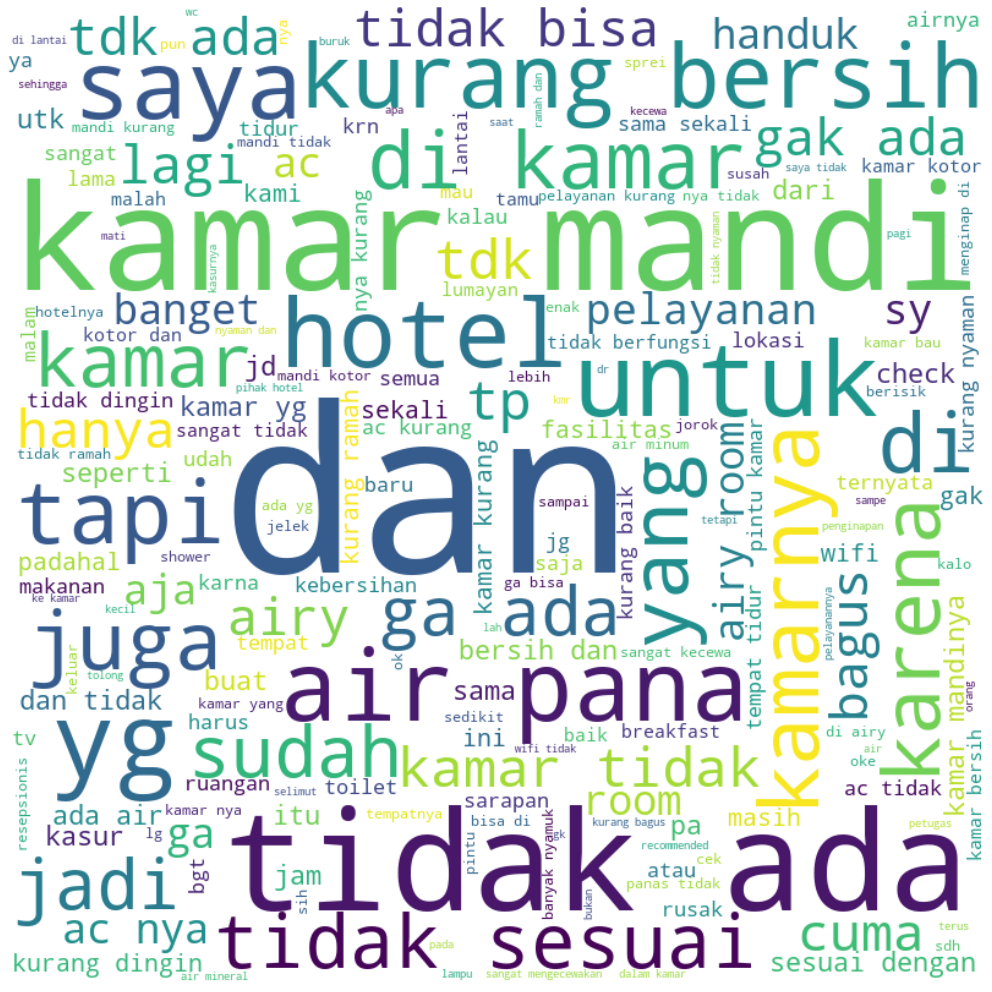

In [309]:
text = ' '.join([gabungan["token"][i] for i in range(gabungan.shape[0])])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize=(18,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

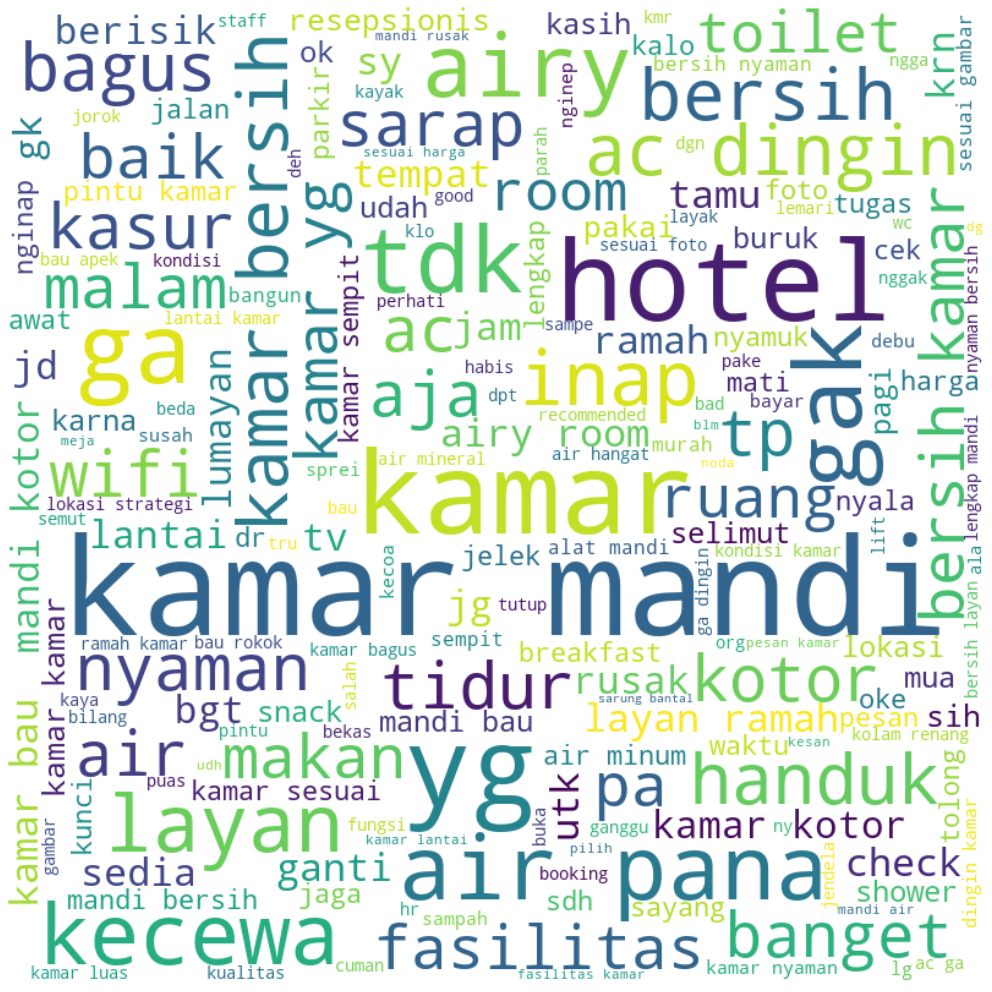

In [310]:
text = ' '.join([gabungan["stop_stem_id"][i] for i in range(gabungan.shape[0])])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(text)

# Display the generated image:
plt.figure(figsize=(18,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [306]:
sum(["ads","dsa"])

TypeError: unsupported operand type(s) for +: 'int' and 'str'